# Analysis of Video Game Data: Identifying Industry Trends and Player Preferences

---

<img src="https://resources.experfy.com/wp-content/uploads/2015/08/Featue-1425x500-1.png" alt="banner" width="700" style="display: block; margin: 0 auto;">


## PROYECT INFORMATION

### Project Objectives 
1. Examine Game Ratings and Trends: Conduct a comprehensive analysis of metascores and user ratings across various genres, platforms, and publishers to determine the critical factors influencing game reception.

2. Investigate Genre and Publisher Performance: Assess the historical performance of different game genres and publishers to identify consumer preferences, market trends, and potential industry shifts.

3. Evaluate the Evolution of Game Ratings Over Time: Analyze longitudinal changes in game ratings, establishing correlations between critical reception, technological advancements, and player expectations.

### Proyect Summary

The video game industry is a dynamic and rapidly evolving sector influenced by shifting consumer preferences, technological progress, and game design advancements. This study seeks to analyze an extensive dataset of video games, encompassing metascores, user ratings, genres, publishers, and release dates. The primary objective is to extract meaningful insights and patterns that shed light on the determinants of game success and reception.

**Methodology**

The dataset analyzed consists of 13,429 video games, incorporating crucial attributes such as metascores, user reviews, publisher names, genres, and platform distributions. The study employs data visualization techniques and statistical methodologies to uncover trends, correlations, and anomalies.

Key analytical approaches include:

  - Metascore Distribution Analysis: Examining the statistical distribution of game ratings to identify recurring patterns.

  - Genre-Based Performance Assessment: Evaluating the relationship between game genres and their reception among critics and players.

  - Publisher Impact Study: Determining which publishers consistently release high-rated games and assessing their influence on the market.

  - Temporal Analysis: Investigating the progression of game scores over time to detect shifts in industry standards and player expectations.

Key Findings

  - Genre Influence on Ratings: Certain genres, such as RPGs and FPS titles, consistently achieve higher metascores compared to niche genres like party or sports games.

  - Dominant Publishers: Major industry players, including Electronic Arts, Larian Studios, and Namco, frequently release highly rated games, while smaller publishers exhibit greater variability in their ratings.

  - Temporal Shifts in Ratings: The analysis suggests that while some genres maintain stable metascores over time, others, such as real-time strategy games, have experienced a decline in critical reception.
  
  - Critic vs. User Discrepancies: While metascores often align with user ratings, notable discrepancies exist for certain games, indicating differences in critical and player perspectives.

**Conclusion**

This research provides valuable insights into the structural dynamics of the video game industry. The findings offer practical implications for developers, publishers, and marketers aiming to optimize game development strategies and align with player expectations. Future research could expand on these analyses by incorporating additional dimensions, such as game sales data, monetization models, and player retention metrics.

## Dataset Detail
---

This dataset contains structured information scraped from Metacritic, offering a detailed overview of video games across various platforms. It includes game titles, release dates, critic and user scores, genres, developers, and publishers, providing a comprehensive foundation for industry analysis.

- **Data Type**: Video game metadata, critic/user scores, and review summaries

- **Number of Instances**: 13,429

- **Number of Features**: 308

- **Source**: Metacritic & [Kaggle](https://www.kaggle.com/datasets/zaireali/metacritic-games-scrape/data)

- **Format**: CSV (structured for Pandas, SQL, and machine learning models)

- **Observations** Video game trends, review patterns, and score disparities

- **Licence** CC BY-SA 4.0

In [83]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from tabulate import tabulate
import warnings
warnings.simplefilter(action='ignore', category=Warning)
plt.rcParams['savefig.dpi'] = 1000
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
## IMPORT DATA
path = 'dataset.csv'
df = pd.read_csv(path)
df.head(n=10)

title                 genres/0 metascore  \
0                    Tekken 3              3D Fighting        96   
1               Mass Effect 2              Western RPG        96   
2             Baldur's Gate 3              Western RPG        96   
3              The Orange Box              Compilation        96   
4  Uncharted 2: Among Thieves  Linear Action Adventure        96   
5      Resident Evil 4 (2005)                 Survival        96   
6                    BioShock                      FPS        96   
7                     NFL 2K1             Football Sim        97   
8                 Half-Life 2                      FPS        96   
9         Super Mario Odyssey            3D Platformer        97   

          publisherName                                       publisherUrl  \
0                 Namco          https://www.metacritic.com/company/namco/   
1       Electronic Arts  https://www.metacritic.com/company/electronic-...   
2  Larian Studios Games  https://www.metacritic.com/company/larian-stud...   
3              EA Games       https://www.metacritic.com/company/ea-games/   
4                  SCEA           https://www.metacritic.com/company/scea/   
5                Capcom         https://www.metacritic.com/company/capcom/   
6              2K Games       https://www.metacritic.com/company/2k-games/   
7                  Sega           https://www.metacritic.com/company/sega/   
8              VU Games       https://www.metacritic.com/company/vu-games/   
9              Nintendo       https://www.metacritic.com/company/nintendo/   

  releaseDate          section  \
0  1998-04-29      PlayStation   
1  2010-01-26         Xbox 360   
2  2023-08-03               PC   
3  2007-10-10         Xbox 360   
4  2009-10-13    PlayStation 3   
5  2005-01-11         GameCube   
6  2007-08-21         Xbox 360   
7  2000-09-07        Dreamcast   
8  2004-11-16               PC   
9  2017-10-27  Nintendo Switch   

                                             summary  type  \
0  An ancient evil force has reawakened, attackin...  game   
1  The Mass Effect trilogy is a science fiction a...  game   
2  An ancient evil has returned to Baldur's Gate,...  game   
3  Games included in The Orange Box compilation: ...  game   
4  Fortune hunter Nathan Drake returns in Unchart...  game   
5  In Resident Evil 4 players are reacquainted wi...  game   
6  Going beyond "run and gun corridors," "monster...  game   
7  In the end, NFL 2K1 is a deeper, more refined ...  game   
8  [Metacritic's 2004 PC Game of the Year]  By ta...  game   
9  New Evolution of Mario Sandbox-Style Gameplay....  game   

                                                 url  ...  \
0           https://www.metacritic.com/game/tekken-3  ...   
1      https://www.metacritic.com/game/mass-effect-2  ...   
2     https://www.metacritic.com/game/baldurs-gate-3  ...   
3     https://www.metacritic.com/game/the-orange-box  ...   
4  https://www.metacritic.com/game/uncharted-2-am...  ...   
5  https://www.metacritic.com/game/resident-evil-...  ...   
6           https://www.metacritic.com/game/bioshock  ...   
7            https://www.metacritic.com/game/nfl-2k1  ...   
8        https://www.metacritic.com/game/half-life-2  ...   
9  https://www.metacritic.com/game/super-mario-od...  ...   

  xboxSeriesXUserReviews/score  \
0                          NaN   
1                          NaN   
2                         99.0   
3                          NaN   
4                          NaN   
5                          NaN   
6                          NaN   
7                          NaN   
8                          NaN   
9                          NaN   

                          xboxSeriesXUserReviews/url  xboxUserReviews/name  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2  https://www.metacritic.com/game/baldurs-gate-3...                   NaN   

In [3]:
## DATA SCTRUCTURE
total_rows = df.shape[0]
total_columns = df.shape[1]

dtypes_summary = df.dtypes.reset_index()
dtypes_summary.columns = ['Column', 'Data Type']

print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print("#" * 20)
print("Data types:")
print(tabulate(dtypes_summary, 
               headers='keys', 
               tablefmt='grid'))
print("#" * 20)

type_counts = df.dtypes.value_counts().reset_index()
type_counts.columns = ['Data Type', 'Count']
print("Summary of data types:")
print(tabulate(type_counts, 
               headers='keys',
               tablefmt='grid'))

Total rows: 13429
Total columns: 308
####################
Data types:
+-----+--------------------------------------------+-------------+
|     | Column                                     | Data Type   |
+=====+============================================+=============+
|   0 | title                                      | object      |
+-----+--------------------------------------------+-------------+
|   1 | genres/0                                   | object      |
+-----+--------------------------------------------+-------------+
|   2 | metascore                                  | object      |
+-----+--------------------------------------------+-------------+
|   3 | publisherName                              | object      |
+-----+--------------------------------------------+-------------+
|   4 | publisherUrl                               | object      |
+-----+--------------------------------------------+-------------+
|   5 | releaseDate                                | object

In [ ]:
## NULL VALUES
df.isnull().sum()

In [4]:
## DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13429 entries, 0 to 13428
Columns: 308 entries, title to xboxUserReviews/url
dtypes: float64(214), object(94)
memory usage: 31.6+ MB


In [5]:
## EXPLORING CONTENT
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')
df.section.unique()

array(['PlayStation', 'Xbox 360', 'PC', 'PlayStation 3', 'GameCube',
       'Dreamcast', 'Nintendo Switch', 'Xbox', 'Nintendo 64',
       'PlayStation 4', 'PlayStation 2', 'Wii', 'Game Boy Advance',
       'PlayStation 5', '3DS', 'DS', 'PlayStation Vita', 'Wii U',
       'Xbox One', 'Xbox Series X', 'PSP', 'Meta Quest'], dtype=object)

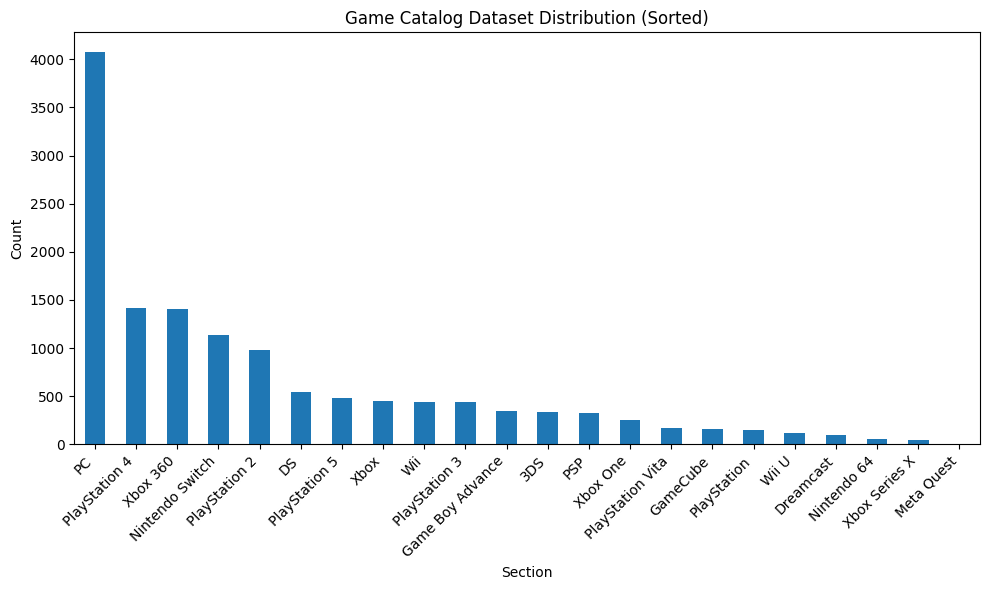

In [6]:
## GAME CATALOG CONFIGURATION
section_counts = df['section'].value_counts()
section_counts_sorted = section_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
section_counts_sorted.plot(kind='bar')
plt.title('Game Catalog Dataset Distribution (Sorted)')
plt.xlabel('Section')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- This chart presents the distribution of games across various platforms, highlighting disparities in game availability and coverage on Metacritic. The data reveals a strong concentration of titles on dominant platforms such as PC, PlayStation, and Xbox, which aligns with their market influence and extensive game libraries. These platforms have consistently attracted a broad range of developers and publishers, resulting in higher representation in the dataset.
- Conversely, older or less commercially dominant platforms, such as Dreamcast, PSP, and GameCube, show significantly lower game counts. This could indicate a combination of factors, including fewer total releases, reduced documentation, or archival biases in Metacritic’s dataset. The skewed distribution underscores the shifting landscape of the gaming industry, where contemporary platforms receive sustained developer support and a continuous influx of new titles.

## DATA VISUALIZATION

### ANALYSIS FUNCTIONS

In [7]:
def top_30_genres(df,title):
    data = df['genres/0'].value_counts().nlargest(30)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data.values)
    plt.title("Top 30 Genres in {fname} Games (Count) ".format(fname = str(title)))
    plt.xlabel('Genre')
    plt.ylabel('Number of Games')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

def top_30_publishers(df,title):
    data = df['publisherName'].value_counts().nlargest(30)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data.values)
    plt.title("Top 30 Publishers in {fname} Games (Count)".format(fname = str(title)))
    plt.xlabel('Publisher')
    plt.ylabel('Number of Games')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

def metascore_analysis_global(df, title):
    # Some data in metascore columnas has the value of 'tbd' = 'To Be Defined',
    # Coerce will handle this values as NaN to change the column type to numeric
    df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(df['metascore'].dropna(), bins=20)
    plt.title('Metascore Distribution in {fname} Games'.format(fname = str(title)))
    plt.xlabel('Metascore')
    plt.ylabel('Frequency')
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df['metascore'].dropna(), orient="h")
    plt.xlabel('Metascore')
    plt.tight_layout()
    plt.show()

def metascore_analysis_genre(df, title):
    data = df[df['genres/0'].isin(df['genres/0'].value_counts().nlargest(30).index)]
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='genres/0', y='metascore', data=data)
    plt.title('Metascore Distribution for Top 30 Genres ({fname})'.format(fname = str(title)))
    plt.xlabel('Genre')
    plt.ylabel('Metascore')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def top_30_metascore_genre_avg(df,title):
    score_by_genre_mean = df.groupby('genres/0')['metascore'].agg(['mean','std','count']).nlargest(30, columns='mean') ## SORTING BY AVG
    means = score_by_genre_mean['mean']
    stds = score_by_genre_mean['std'].fillna(0)
    genres = score_by_genre_mean.index
    plt.figure(figsize=(12, 6))
    x_pos = np.arange(len(genres))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5, label='AVG', ecolor='black')
    plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, label='SD', ecolor='black')
    for bar, mean, count in zip(bars, means, score_by_genre_mean['count']):
        yval = bar.get_height()
        text_label = f'{round(mean, 1)} (Count: {count})'
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, text_label, ha='center', va='center', color='black', rotation=90)
    plt.xticks(x_pos, genres, rotation=90)
    plt.title('Top 30 Metascore by Genre in {fname} Games (Sort by Average)'.format(fname = str(title)))
    plt.xlabel('Genre')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.legend()
    plt.show()

def top_30_metascore_genre_avg_count(df,title):
    score_by_genre_count = df.groupby('genres/0')['metascore'].agg(['mean','std','count']).nlargest(30, columns='count') ## SORTING BY COUNT
    means = score_by_genre_count['mean']
    stds = score_by_genre_count['std'].fillna(0)
    genres = score_by_genre_count.index
    plt.figure(figsize=(16, 6))
    x_pos = np.arange(len(genres))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5, label='AVG', ecolor='black')
    plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, label='SD', ecolor='black')
    for bar, mean, count in zip(bars, means, score_by_genre_count['count']):
        yval = bar.get_height()
        text_label = f'{round(mean, 1)} (Count: {count})'
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, text_label, ha='center', va='center', color='black', rotation=90)
    plt.xticks(x_pos, genres, rotation=90)
    plt.title('Top 30 Average Metascore by Genre in {fname} Games (Sort by Count)'.format(fname = str(title)))
    plt.xlabel('Genre')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.legend()
    plt.show()

def top_30_metascore_publiser_avg(df,title):
    score_by_publisher_mean = df.groupby('publisherName')['metascore'].agg(['mean','std','count']).nlargest(30, columns='mean') ## SORTING BY AVG
    means = score_by_publisher_mean['mean']
    stds = score_by_publisher_mean['std'].fillna(0)
    publisher = score_by_publisher_mean.index
    plt.figure(figsize=(16, 6))
    x_pos = np.arange(len(publisher))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5, label='AVG', ecolor='black')
    plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, label='SD', ecolor='black')
    for bar, mean, count in zip(bars, means, score_by_publisher_mean['count']):
        yval = bar.get_height()
        text_label = f'{round(mean, 1)} (Count: {count})'
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, text_label, ha='center', va='center', color='black', rotation=90)
    plt.xticks(x_pos, publisher, rotation=90)
    plt.title('Top 30 Average Metascore by Publisher in {fname} Games (Sort by Average)'.format(fname = str(title)))
    plt.xlabel('Publisher')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.legend()
    plt.show()

def top_30_metascore_publiser_avg_count(df,title):
    score_by_publisher_count = df.groupby('publisherName')['metascore'].agg(['mean','std','count']).nlargest(30, columns='count')
    means = score_by_publisher_count['mean']
    stds = score_by_publisher_count['std'].fillna(0)
    publisher = score_by_publisher_count.index
    plt.figure(figsize=(16, 6))
    x_pos = np.arange(len(publisher))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5, label='AVG', ecolor='black')
    plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, label='SD', ecolor='black')
    for bar, mean, count in zip(bars, means, score_by_publisher_count['count']):
        yval = bar.get_height()
        text_label = f'{round(mean, 1)} (Count: {count})'
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, text_label, ha='center', va='center', color='black', rotation=90)
    plt.xticks(x_pos, publisher, rotation=90)
    plt.title('Average Metascore of Top 30 Publishers in {fname} Games (Sort by Count)'.format(fname = str(title)))
    plt.xlabel('Publisher')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.legend()
    plt.show()

def time_series_metascore_evolution(df,title,close=False):
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
    df['releaseYear'] = df['releaseDate'].dt.year
    metascore_by_year = df.groupby('releaseYear')['metascore'].agg(['mean', 'std', 'median']).fillna(0)
    years = metascore_by_year.index
    mean_scores = metascore_by_year['mean']
    median_scores = metascore_by_year['median']
    std_scores = metascore_by_year['std']
    upper_bound = mean_scores + std_scores
    lower_bound = mean_scores - std_scores
    plt.figure(figsize=(16, 8), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.plot(years, mean_scores, label='Mean Metascore', color='skyblue')
    plt.plot(years, median_scores, label='Median Metascore', color='orange')
    plt.fill_between(years, lower_bound, upper_bound, color='skyblue', alpha=0.2, label='Std Dev')
    plt.title('Metascore Over Time with Standard Deviation Bands in {fname} Games'.format(fname = str(title)))
    plt.xlabel('Year')
    plt.ylabel('Metascore')
    plt.legend()
    plt.grid(False)
    plt.ylim(bottom=50) if close == True else plt.ylim(bottom=0)
    plt.xticks(years, rotation = 65)
    plt.tight_layout()
    plt.show()

def time_series_metascore_evolution_genre(df,genres,title,close=False):
    genres_to_plot = list(genres)
    filtered_data = df[df['genres/0'].isin(genres_to_plot)]
    metascore_by_year_genre = filtered_data.groupby(['releaseYear', 'genres/0'])['metascore'].mean().unstack()
    plt.figure(figsize=(16, 8), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')
    colors = ['skyblue', 'orange', 'lightgreen']
    for i, genre in enumerate(genres_to_plot):
        if genre in metascore_by_year_genre.columns:
            plt.plot(metascore_by_year_genre.index, metascore_by_year_genre[genre], label=genre, color=colors[i])
    plt.title('Top 3 Genre Average Metascore Evolution Over Time in {fname} Games'.format(fname = str(title)), fontweight='bold')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Average Metascore', fontweight='bold')
    plt.legend()
    plt.grid(False)
    plt.ylim(bottom=50) if close == True else plt.ylim(bottom=0)
    plt.xticks(metascore_by_year_genre.index, rotation=65)
    plt.tight_layout()
    plt.show()

def tfidf_analysis_genre(df):
    class TfidfByGenreTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, text_column='summary', ngram_range=(1, 3), max_features=1000):
            self.text_column = text_column
            self.ngram_range = ngram_range
            self.max_features = max_features
            self.tfidf_vectorizer = None
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            tfidf_vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, stop_words='english', max_features=self.max_features)
            genre_results = {}
            for genre in X['genres/0'].unique():
                genre_data = X[X['genres/0'] == genre].copy()
                if genre_data.empty:
                    continue
                text_data_for_genre = genre_data[self.text_column]
                tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_for_genre)
                tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
                tfidf_scores = tfidf_df.mean().sort_values(ascending=False)
                genre_results[genre] = tfidf_scores
            return genre_results
    text_data = df.copy(deep=True)
    def preprocess_text(df, text_column):
        df[text_column] = df[text_column].fillna('')
        return df
    pipeline = Pipeline([
        ('preprocess', FunctionTransformer(preprocess_text, kw_args={'text_column': 'summary'})),
        ('tfidf_by_genre', TfidfByGenreTransformer())
    ])
    return pipeline.fit_transform(text_data)

def tfidf_analysis_time(df):
    class TfidfByYearTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, text_column='summary', ngram_range=(1, 3), max_features=1000):
            self.text_column = text_column
            self.ngram_range = ngram_range
            self.max_features = max_features
            self.tfidf_vectorizer = None
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            tfidf_vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, stop_words='english', max_features=self.max_features)
            year_results = {}
            for year in X['releaseYear'].dropna().unique():
                year_data = X[X['releaseYear'] == year].copy()
                if year_data.empty:
                    continue
                text_data_for_year = year_data[self.text_column]
                tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_for_year)
                tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
                tfidf_scores = tfidf_df.mean().sort_values(ascending=False)
                year_results[year] = tfidf_scores
            return year_results
    text_data = df.copy(deep=True)
    def preprocess_text(df, text_column):
        df[text_column] = df[text_column].fillna('')
        return df
    pipeline = Pipeline([
        ('preprocess', FunctionTransformer(preprocess_text, kw_args={'text_column': 'summary'})),
        ('tfidf_by_year', TfidfByYearTransformer())
    ])
    return pipeline.fit_transform(text_data)

def tfidf_analysis_publisher(df):
    # WARNING: There are approximately 1200 unique publishers. Printing all results will generate a large output.
    class TfidfByPublisherTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, text_column='summary', ngram_range=(1, 3), max_features=1000):
            self.text_column = text_column
            self.ngram_range = ngram_range
            self.max_features = max_features
            self.tfidf_vectorizer = None
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            tfidf_vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, stop_words='english', max_features=self.max_features)
            publisher_results = {}
            for publisher in X['publisherName'].dropna().unique():
                publisher_data = X[X['publisherName'] == publisher].copy()
                if publisher_data.empty:
                    continue
                text_data_for_publisher = publisher_data[self.text_column].fillna('')
                # Filter out empty strings or strings with only spaces
                text_data_for_publisher = text_data_for_publisher[text_data_for_publisher.str.strip() != '']
                # Replace the empty documents with the placeholder
                if text_data_for_publisher.empty:
                    text_data_for_publisher = pd.Series(['no_summary'])

                tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_for_publisher)
                tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
                tfidf_scores = tfidf_df.mean().sort_values(ascending=False)
                publisher_results[publisher] = tfidf_scores
            return publisher_results
    text_data = df.copy(deep=True)
    def preprocess_text(df, text_column):
        df[text_column] = df[text_column].fillna('')
        return df
    pipeline = Pipeline([
        ('preprocess', FunctionTransformer(preprocess_text, kw_args={'text_column': 'summary'})),
        ('tfidf_by_publisher', TfidfByPublisherTransformer())
    ])
    return pipeline.fit_transform(text_data)

def metascore_vs_user_score_pc(df):
    top_30_genres = df['genres/0'].value_counts().nlargest(30).index
    filtered_pc_data = df[df['genres/0'].isin(top_30_genres)].copy()
    filtered_pc_data['pcUserReviews/normalizedScore'] = pd.to_numeric(filtered_pc_data['pcUserReviews/normalizedScore'], errors='coerce')
    score_by_genre = filtered_pc_data.groupby('genres/0').agg(
        mean_metascore = pd.NamedAgg(column='metascore', aggfunc='mean'),
        std_metascore = pd.NamedAgg(column='metascore', aggfunc='std'),
        mean_user_score = pd.NamedAgg(column='pcUserReviews/normalizedScore', aggfunc='mean'),
        std_user_score = pd.NamedAgg(column='pcUserReviews/normalizedScore', aggfunc='std')
    )
    score_by_genre = score_by_genre.fillna(0)
    means_metascore = score_by_genre['mean_metascore']
    stds_metascore = score_by_genre['std_metascore']
    means_user_score = score_by_genre['mean_user_score']
    stds_user_score = score_by_genre['std_user_score']
    genres = score_by_genre.index
    x_pos = np.arange(len(genres))
    bar_width = 0.35
    fig, ax = plt.subplots(figsize=(20, 9))
    bars_metascore = ax.bar(x_pos - bar_width/2, means_metascore, bar_width, yerr=stds_metascore, capsize=5, label='Metascore AVG', ecolor='black')
    bars_user_score = ax.bar(x_pos + bar_width/2, means_user_score, bar_width, yerr=stds_user_score, capsize=5, label='User Score AVG', ecolor='black')
    for bar_meta, bar_user, mean_meta, std_meta, mean_user, std_user in zip(bars_metascore, bars_user_score, means_metascore, stds_metascore, means_user_score, stds_user_score):
        yval_meta = bar_meta.get_height()
        yval_user = bar_user.get_height()
        text_label_meta = f'{round(mean_meta, 3)} (±{round(std_meta,3)})'
        text_label_user = f'{round(mean_user, 3)} (±{round(std_user,3)})'
        ax.text(bar_meta.get_x() + bar_width/2, yval_meta / 2, text_label_meta, ha='center', va='center', color='black', rotation=90, fontsize = 8)
        ax.text(bar_user.get_x() + bar_width/2, yval_user / 2, text_label_user, ha='center', va='center', color='black', rotation=90, fontsize = 8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(genres, rotation=90)
    ax.set_title('Metascore vs User Score by Genre in PC Games (Top 30 by Count)')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Score')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def in_distribution(df,title):
    ## USE ONLY FOR CONSOLES
    plt.figure(figsize=(10, 6))
    df['section'].value_counts().plot(kind='bar')
    plt.title('{fname} Data Distribution Counts (Sorted)'.format(fname = str(title)))
    plt.xlabel('Section')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def metascore_in_distribution(df,title):
    ## USE ONLY FOR CONSOLES
    avg_score_type = df.groupby('section')['metascore'].agg(['mean','std','count']).sort_values(by='mean', ascending=False)
    means = avg_score_type['mean']
    stds = avg_score_type['std'].fillna(0)
    types = avg_score_type.index
    plt.figure(figsize=(16, 6))
    x_pos = np.arange(len(types))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5, label='AVG', ecolor='black')
    plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, label='SD', ecolor='black')
    for bar, mean, count in zip(bars, means, avg_score_type['count']):
        yval = bar.get_height()
        text_label = f'{round(mean, 1)} (Count: {count})'
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, text_label, ha='center', va='center', color='black', rotation=90)
    plt.xticks(x_pos, types, rotation=90)
    plt.title('Average Metascore of {fname} Games by Console Type'.format(fname = str(title)))
    plt.xlabel('Console')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.legend()
    plt.show()

### PC GAMES

---
- PC gaming has long served as a fertile ground for innovation, creativity, and community. Its history dates back to the early days of personal computing, when pioneering systems like the Apple II, Commodore 64, and IBM PC compatibles introduced a new form of interactive entertainment. During the 1980s and 1990s, as hardware capabilities expanded, genres such as adventure, strategy, and first-person shooters emerged and thrived, with landmark titles like Doom, Half-Life, and Age of Empires setting new standards for gameplay and graphics. These games not only pushed the technological limits of their time but also helped establish the foundation for digital distribution, modding communities, and competitive gaming, all of which continue to influence the modern gaming landscape.
- Today, PC gaming remains a dynamic and influential cultural phenomenon, celebrated for its versatility, high-fidelity graphics, and extensive game libraries. The platform’s inherent flexibility has fostered a culture of customization, where enthusiasts build and upgrade their systems to achieve the ultimate gaming experience. Digital storefronts such as Steam have revolutionized how games are distributed, while community events like LAN parties and e-sports tournaments underscore the social and competitive spirit of PC gaming. This unique blend of technical innovation and community engagement continues to define the genre, ensuring that PC gaming not only endures but also evolves in step with advances in technology and shifts in cultural trends.

<img src="https://t3.ftcdn.net/jpg/05/33/85/94/360_F_533859429_nnMYEcCGFQLpWONyVmED8w01rRgRIM6t.jpg" alt="banner" width="700" style="display: block; margin: 0 auto;">

- Beyond the technological achievements, the cultural and social dynamics of PC gaming have fostered a unique and passionate community. From grassroots LAN parties and online multiplayer battles to the global phenomenon of esports, PC gamers have built vibrant networks that thrive on collaboration, competition, and creativity. Dedicated forums, subreddits, and streaming platforms serve as hubs where enthusiasts exchange strategies, showcase their custom-built rigs, and celebrate the latest breakthroughs in gaming hardware and software. This interconnected environment has given rise to influential trends and humorous memes—often highlighting the pride and exclusivity within the community—that underscore the collective identity of PC gamers.

- In addition to driving social and cultural innovation, the legacy of PC gaming is evident in its enduring impact on related sectors such as digital distribution, virtual reality, and streaming media. The platform’s inherent versatility has paved the way for groundbreaking developments, from modding communities that extend game lifespans to online marketplaces that offer vast libraries of titles accessible worldwide. Major gaming conventions and international tournaments not only spotlight the creative and competitive spirit of PC gaming but also help bridge the gap between casual enthusiasts and professional competitors. As the industry continues to evolve, PC gaming remains a testament to the power of technological ingenuity and community-driven progress, solidifying its role as a cornerstone of modern digital culture.
---

In [8]:
## FILTERING PC DATA
pc_data = df[df['section'] == 'PC']
first_11_columns = pc_data.columns[:11].tolist()
pc_columns = [col for col in pc_data.columns if 'pc' in col.lower()]
final_columns = first_11_columns + [col for col in pc_columns if col not in first_11_columns]
pc_data = pc_data[final_columns]

In [9]:
pc_data.head(5)

title     genres/0  metascore  \
2                    Baldur's Gate 3  Western RPG       96.0   
8                        Half-Life 2          FPS       96.0   
36  Baldur's Gate II: Shadows of Amn  Western RPG       95.0   
44                         Half-Life          FPS       96.0   
51                 BioShock Infinite          FPS       94.0   

           publisherName                                       publisherUrl  \
2   Larian Studios Games  https://www.metacritic.com/company/larian-stud...   
8               VU Games       https://www.metacritic.com/company/vu-games/   
36             Interplay      https://www.metacritic.com/company/interplay/   
44  Sierra Entertainment  https://www.metacritic.com/company/sierra-ente...   
51              2K Games       https://www.metacritic.com/company/2k-games/   

   releaseDate section                                            summary  \
2   2023-08-03      PC  An ancient evil has returned to Baldur's Gate,...   
8   2004-11-16      PC  [Metacritic's 2004 PC Game of the Year]  By ta...   
36  2000-09-24      PC  An epic continuation of the story that began i...   
44  1998-11-19      PC  Half-Life combines great storytelling in the t...   
51  2013-03-25      PC  Once conceived as a floating symbol of America...   

    type                                                url userscore  \
2   game     https://www.metacritic.com/game/baldurs-gate-3       9.2   
8   game        https://www.metacritic.com/game/half-life-2       9.1   
36  game  https://www.metacritic.com/game/baldurs-gate-i...       9.1   
44  game          https://www.metacritic.com/game/half-life       8.9   
51  game  https://www.metacritic.com/game/bioshock-infinite       8.6   

   pcUserReviews/name  pcUserReviews/negativeCount  \
2                  PC                          0.0   
8                  PC                          0.0   
36                 PC                          0.0   
44                 PC                          0.0   
51                 PC                          0.0   

    pcUserReviews/neutralCount  pcUserReviews/normalizedScore  \
2                          1.0                        96.0672   
8                          0.0                        96.4340   
36                         0.0                        95.4000   
44                         0.0                        95.8095   
51                         0.0                        93.8713   

    pcUserReviews/positiveCount  pcUserReviews/reviewCount  \
2                         111.0                      119.0   
8                          81.0                       81.0   
36                         30.0                       30.0   
44                         24.0                       24.0   
51                         68.0                       68.0   

    pcUserReviews/score                                  pcUserReviews/url  
2                  96.0  https://www.metacritic.com/game/baldurs-gate-3...  
8                  96.0  https://www.metacritic.com/game/half-life-2/cr...  
36                 95.0  https://www.metacritic.com/game/baldurs-gate-i...  
44                 96.0  https://www.metacritic.com/game/half-life/crit...  
51                 94.0  https://www.metacritic.com/game/bioshock-infin...

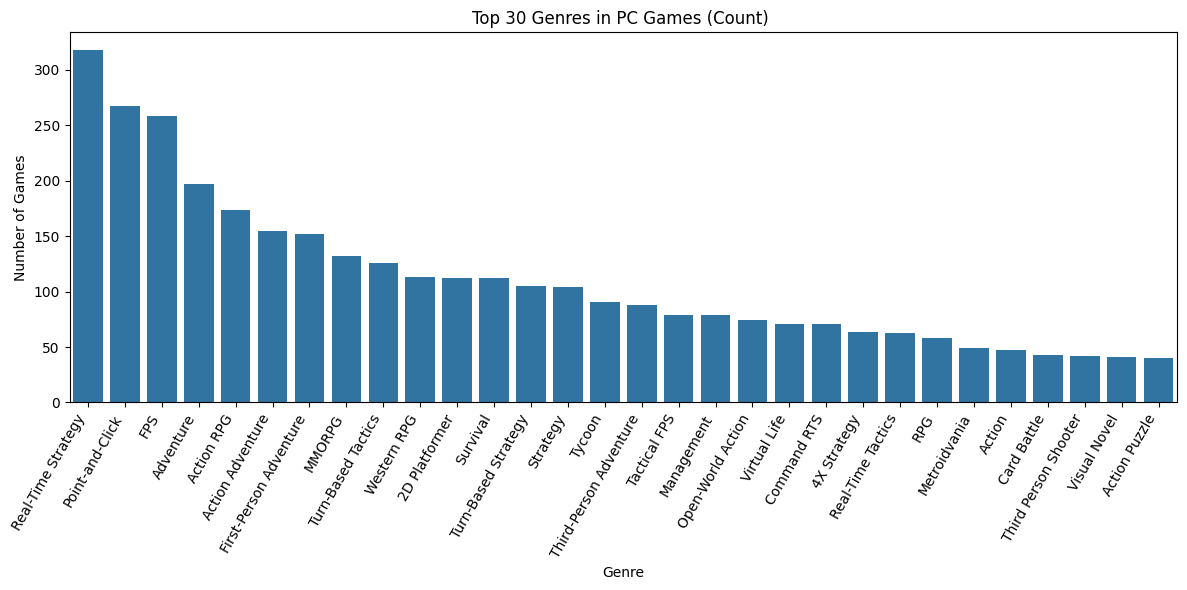

In [10]:
top_30_genres(pc_data,
              'PC')

- The Top 30 Genres in PC Games (Count) chart illustrates the distribution of game genres within the PC gaming landscape, revealing clear trends in player demand and market focus. The dominance of genres such as Real-Time Strategy, Point-and-Click and FPS is indicative of the platform’s strengths, which include superior hardware scalability, precision-based controls, and a dedicated player base that gravitates toward deep, mechanically rich experiences. RPGs, for instance, thrive on PC due to the platform’s ability to support expansive worlds, modding communities, and high-performance graphics, while FPS games benefit from the responsiveness of mouse-and-keyboard controls and the prominence of online multiplayer ecosystems.  
- Additionally, the significant presence of strategy games aligns with PC’s historical role as the preferred platform for real-time strategy (RTS) and turn-based tactical experiences, which require extensive computational power and complex user interfaces that are less feasible on consoles. Lower-ranked genres in the chart, such as party or sports games, suggest either a smaller development focus on PC or a stronger association of those genres with console ecosystems. This distribution highlights both the sustained demand for certain game types and the market’s evolving priorities, making it a valuable reference for understanding player preferences, publisher strategies, and potential growth opportunities in PC gaming.

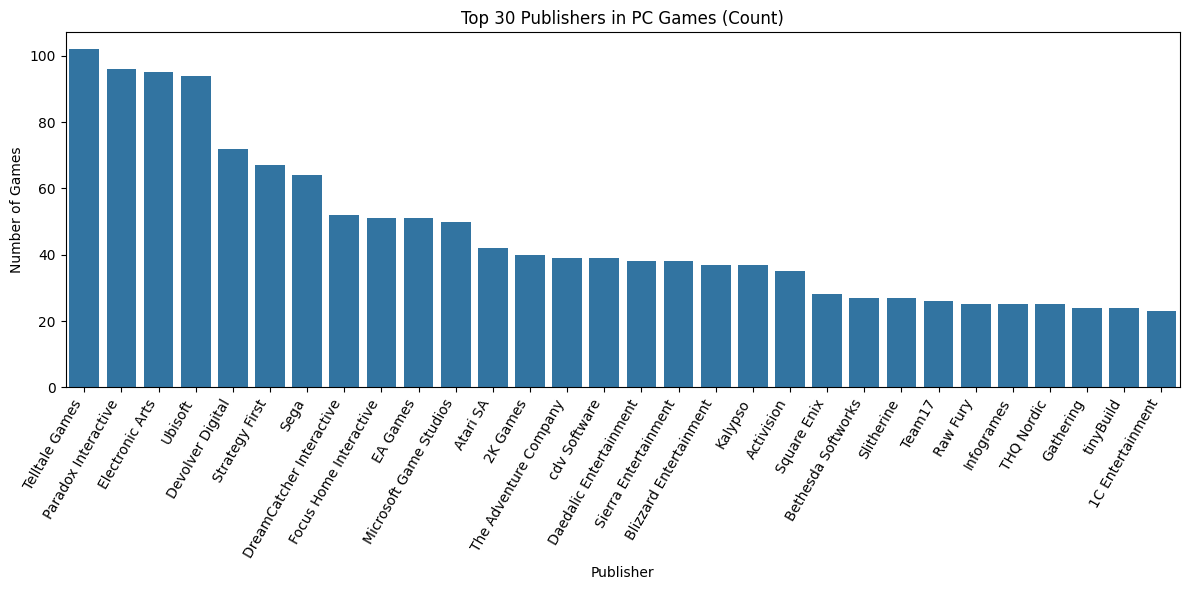

In [11]:
top_30_publishers(pc_data,
                  'PC')

- The distribution of game publishers in the PC gaming market highlights the dominance of a select few companies that have consistently contributed to the platform's extensive library. The chart identifies Telltale Games, Paradox Interactive, and Electronic Arts as the leading publishers in terms of total game releases. Telltale Games, known for its narrative-driven adventure titles, has established a significant presence on PC, leveraging the platform’s digital distribution model to release episodic content efficiently. Paradox Interactive has cemented itself as a powerhouse in the strategy genre, with a catalog that appeals to dedicated PC gamers who favor complex and deep gameplay mechanics. Meanwhile, Electronic Arts maintains its strong position through a combination of legacy franchises, sports titles, and online multiplayer experiences.  
- Following closely behind, Ubisoft and Devolver Digital further reinforce the diversity of PC gaming. Ubisoft’s expansive multi-platform approach ensures a steady influx of AAA releases, while Devolver Digital, an influential indie publisher, showcases the growing impact of smaller studios in the PC market. The presence of both large-scale publishers and independent-focused companies in the rankings highlights the platform’s unique ability to support a wide range of gaming experiences.

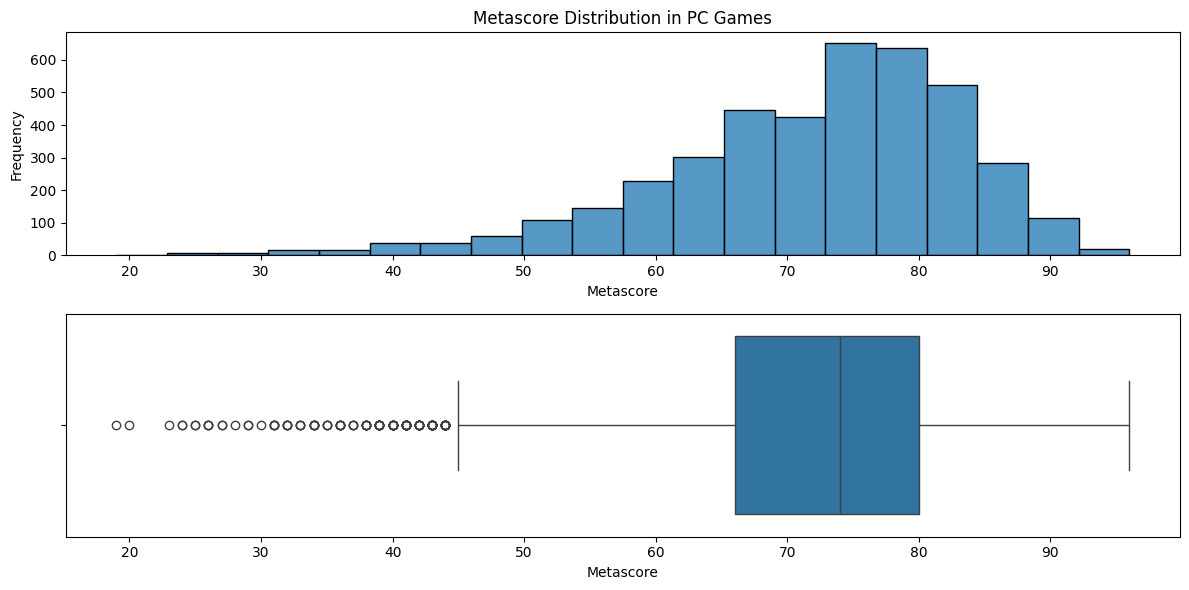

In [12]:
metascore_analysis_global(pc_data,
                          'PC')

- The Metacritic score distribution visualization for PC games reveals a notably right-skewed distribution with most scores concentrated in the 70-80 range. The histogram in the upper panel shows the highest frequency bars reaching approximately 600-650 games with scores between 70-75, followed closely by games scoring 75-80. There's a clear tapering off toward both extremes, with very few games scoring below 30 or above 90, suggesting that extremely poor or exceptional ratings are rare in the PC gaming ecosystem.
- The box plot in the lower panel provides additional statistical context, with the interquartile range (IQR) spanning roughly from 65 to 80, indicating that 50% of PC games fall within this quality range. The median appears to be approximately 72-75. Notably, there are multiple outliers displayed as circles on the left side of the distribution (scores below 45), representing statistically anomalous poorly-rated titles. This distribution pattern suggests that while the mainstream PC gaming market maintains relatively consistent quality standards, there exists a long tail of underperforming titles that deviate significantly from the norm.

In [13]:
## DATA DESCRIPTIVE STATISTICS
print(tabulate(pc_data['metascore'].describe().to_frame(), 
               headers='keys', 
               tablefmt='grid'))

+-------+-------------+
|       |   metascore |
+=======+=============+
| count |   4071      |
+-------+-------------+
| mean  |     71.9135 |
+-------+-------------+
| std   |     11.3926 |
+-------+-------------+
| min   |     19      |
+-------+-------------+
| 25%   |     66      |
+-------+-------------+
| 50%   |     74      |
+-------+-------------+
| 75%   |     80      |
+-------+-------------+
| max   |     96      |
+-------+-------------+


- The Metacritic scores for the PC games in this dataset reveal a generally positive reception from critics, with an average score of 71.91. This suggests that most games tend to receive favorable ratings, slightly above the midpoint of the scale. The standard deviation of 11.39 indicates a moderate level of variation in scores, which means there are both highly rated titles and those that received much lower marks. The lowest score observed is 19, pointing to a few poorly received games, while the highest score of 96 highlights the presence of a few exceptional titles.
- Looking more closely at the distribution, the data shows a relatively narrow interquartile range. The 25th percentile (66), median (74), and 75th percentile (80) suggest that most games in the dataset score between 66 and 80, indicating that the majority of games are rated positively but not excessively so. The fact that a small proportion of games receive scores far below or above the average shows that while the general trend is favorable, there are both outliers in terms of low and high ratings. This combination of data suggests that the overall quality of PC games is fairly high, though there are notable exceptions.

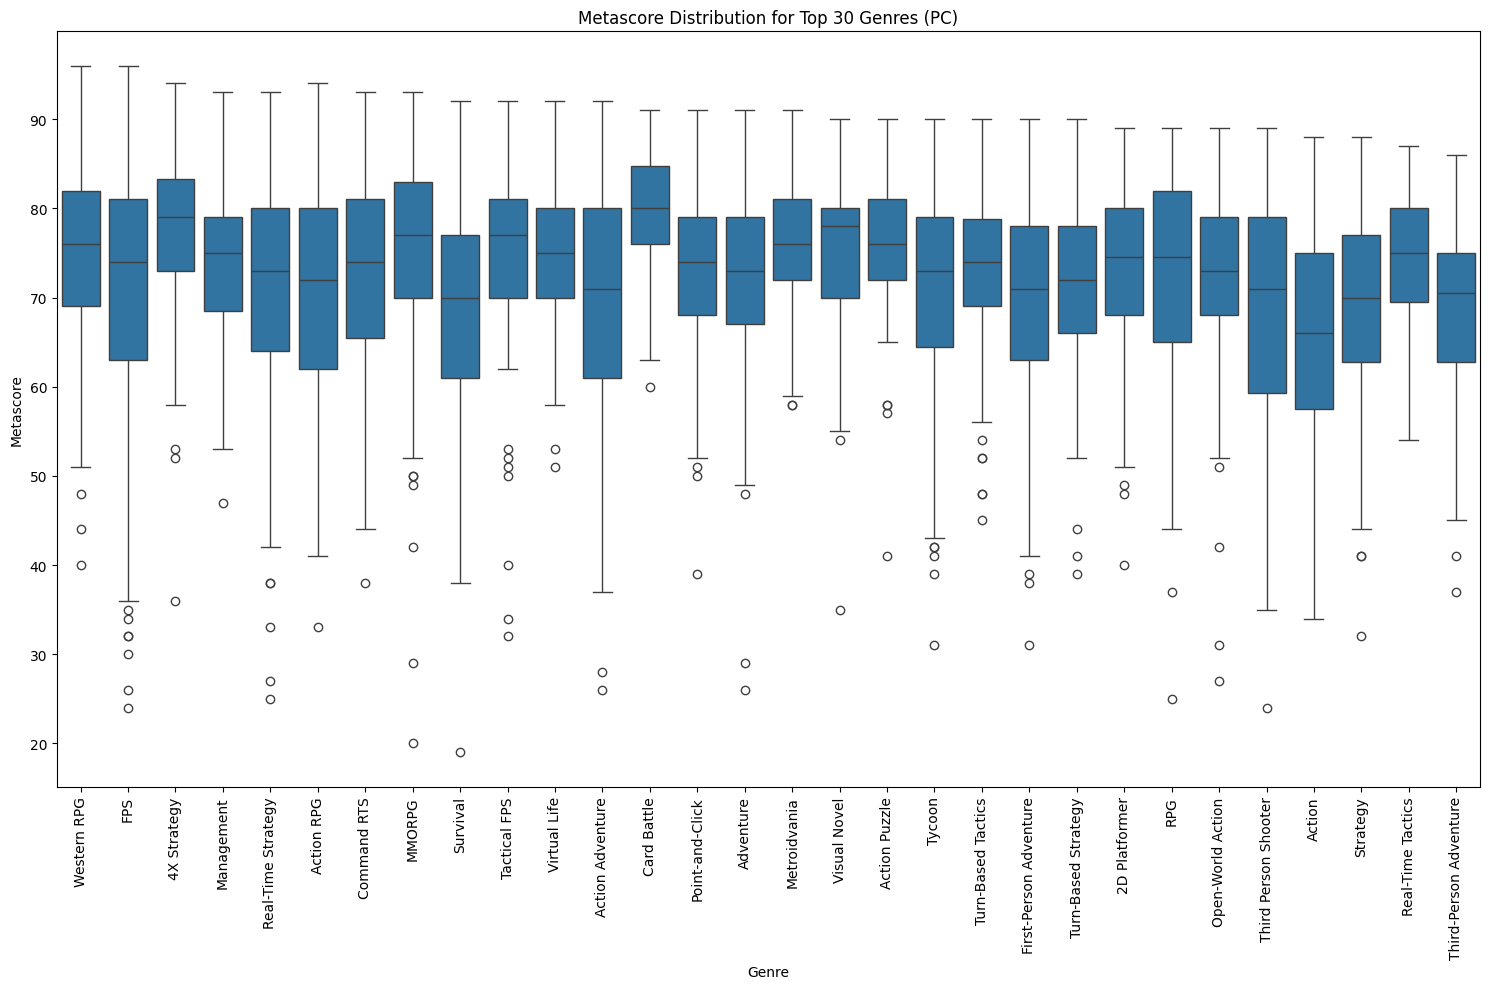

In [14]:
metascore_analysis_genre(pc_data,
                         'PC')

- Most genres display median Metascore values consistently between 70-80, with Card Battle games exhibiting the highest median score (approximately 83), followed closely by 4X Strategy games (around 79-80). Notably, genres with the lowest median scores include Third-Person Shooter, Action, and Real-Time Tactics, all hovering around 65-70.
- The interquartile ranges (boxes) reveal varying degrees of score consistency within genres. Card Battle demonstrates both high median scores and relatively tight distribution, suggesting consistently positive critical reception. Conversely, genres like Survival, Virtual Life, and First-Person Adventure show wider interquartile ranges, indicating greater variability in quality. All genres display outliers (circles) primarily at the lower end of the distribution, with some games scoring as low as 20-30 across multiple genres. This pattern suggests that while most PC games across genres maintain respectable quality levels, occasional poor performers exist in nearly all categories, with exceptionally poor outliers (below 30) appearing in Western RPG, Management, Action RPG, and MMORPG genres.

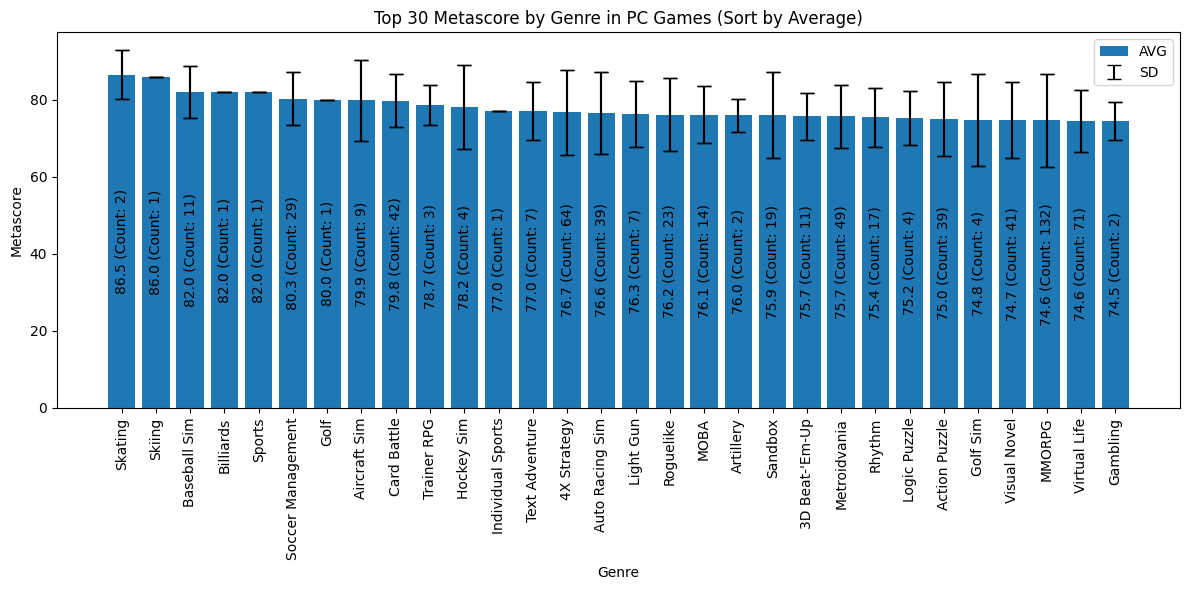

In [15]:
top_30_metascore_genre_avg(pc_data,
                           'PC')

- The genre-based Metascore distribution reveals a clear hierarchy in critical reception among PC gaming categories. Skating games achieve remarkable excellence with an 86.5 average, though this is based on only two titles, suggesting a quality-over-quantity approach in this niche. Sports-related genres dominate the upper echelon, with Skiing, Baseball Simulation, Billiards, and Sports claiming four of the top five positions. Notably, traditional core gaming genres like RPGs, FPS, and Action titles are conspicuously absent from the highest-rated categories. The standard deviation markers indicate that some highly-rated genres like Card Battle and 4X Strategy experience greater quality variations, while others maintain more consistent standards. Even at the lower end of this elite group, genres maintain respectable averages above 74, demonstrating that PC gaming across all major categories typically achieves solid critical reception.

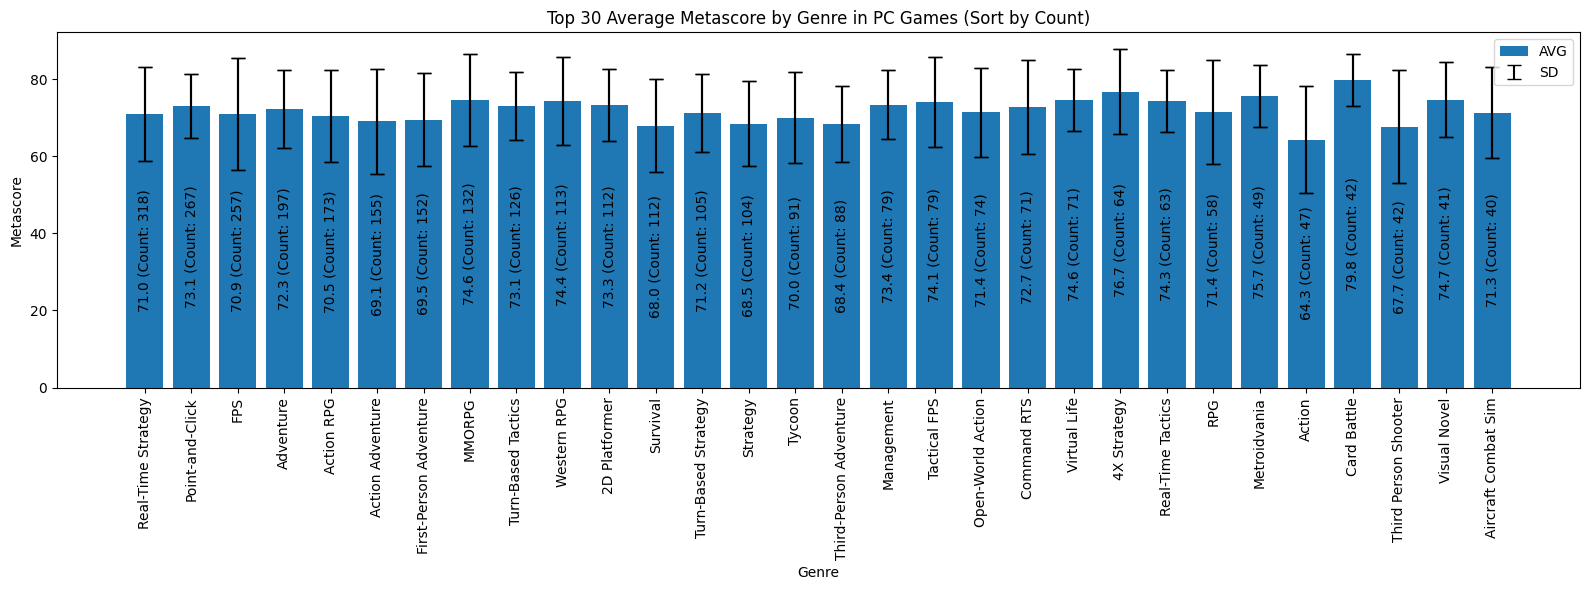

In [16]:
top_30_metascore_genre_avg_count(pc_data,
                                 'PC')

- The visualization reveals remarkable consistency in average metascores across genres, with most falling within the 68-80 range. Card Battle games exhibit the highest average metascore (79.8), while Action shows the lowest (64.3). The standard deviation bars indicate considerable score variability within each genre, suggesting significant quality differences among titles in the same category.
- Notable observations include the relatively high performance of Western RPGs (74.4), MMORPGs (74.6), and Virtual Life games (76.7) compared to more niche genres. The count values displayed within each bar provide important context, with Real-Time Strategy games (318) and Point-and-Click adventures (267) having substantially larger sample sizes than genres like Card Battle (42) or Action (77). This difference in sample size affects the reliability of the averages, as larger samples typically provide more stable estimates of central tendency. The consistency of scores across different genres, despite varying counts, suggests that quality standards may be relatively uniform across the PC gaming industry regardless of genre specialization.

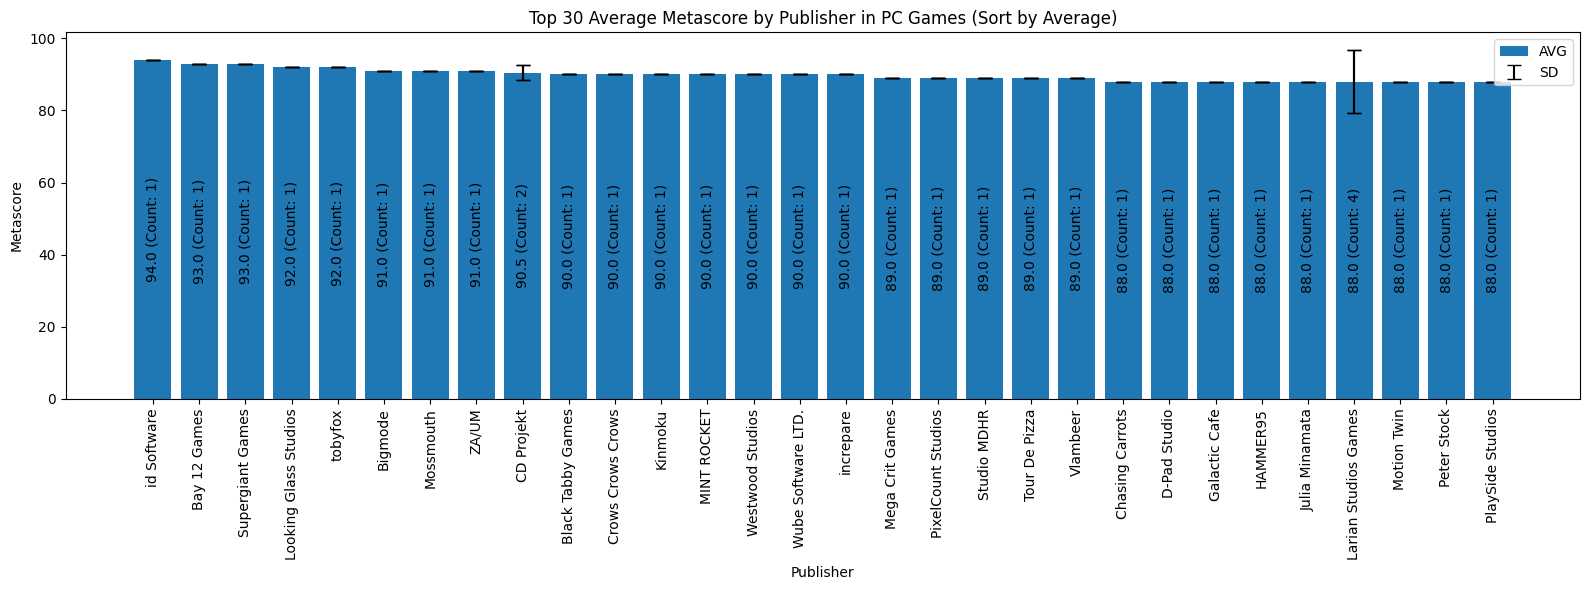

In [17]:
top_30_metascore_publiser_avg(pc_data,
                              'PC')

- id Software leads with an impressive 94.0 average metascore, followed closely by Supergiant Games (93.0) and Looking Glass Studios (92.0). The most striking feature is the narrow range of scores among these elite publishers, with all 30 maintaining averages between 86.0-94.0, suggesting exceptional quality consistency at the industry's upper echelon.
- The standard deviation indicators are remarkably small for most publishers, with Motion Twin showing the highest variability. The uniformly low count values (most showing only 1 game) significantly undermines statistical reliability, indicating these are likely publishers with very small but highly rated catalogs. This selection bias must be considered when interpreting the data, as publishers with fewer releases may represent either boutique studios focused on quality over quantity or those with insufficient sample sizes for meaningful comparison. The chart effectively highlights excellence in the industry but should be interpreted cautiously given the small sample sizes and apparent selection criteria that favor publishers with limited but exceptional outputs.

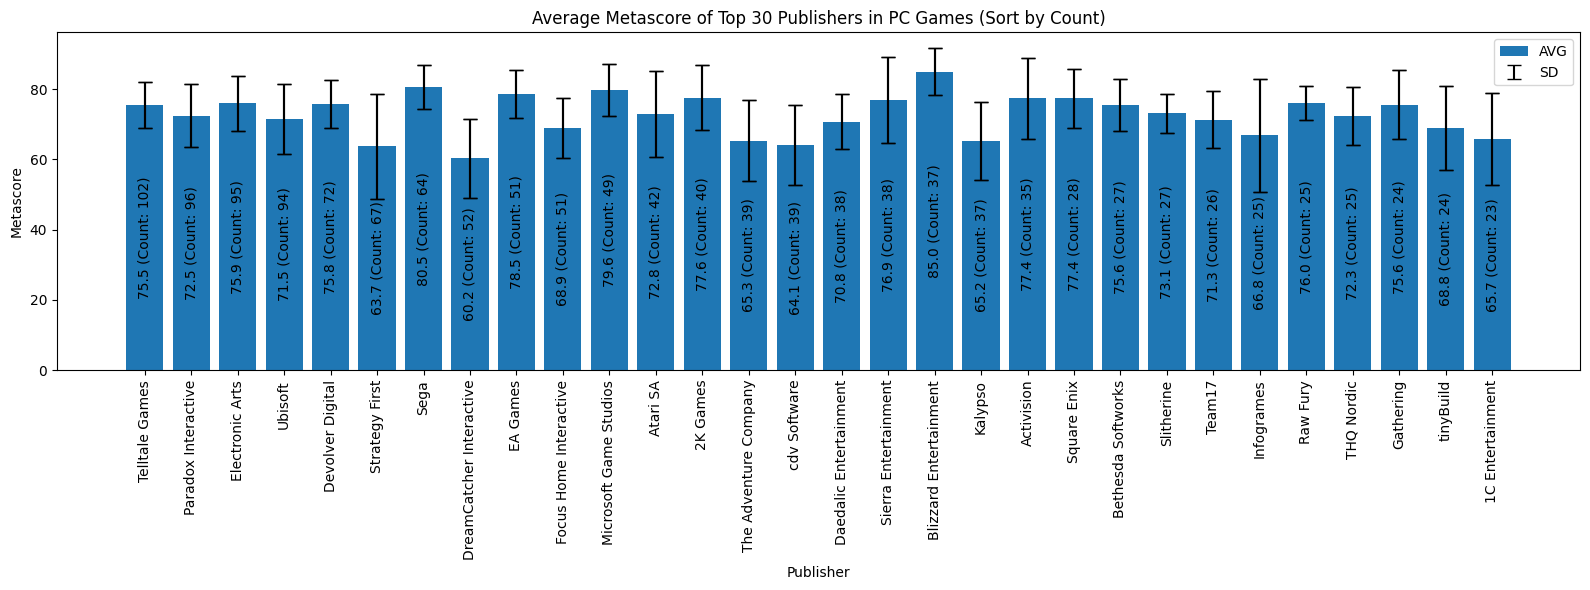

In [18]:
top_30_metascore_publiser_avg_count(pc_data,
                                    'PC')

- Blizzard Entertainment demonstrates superior performance with the highest average metascore (83.6) among publishers with substantial catalogs, while also maintaining a relatively tight standard deviation despite its 37 titles. This contrasts with publishers like Strategy First (63.7) and cdv Software (64.1), which show significantly lower average scores despite considerable catalog sizes.
- The distribution reveals interesting performance patterns among major publishers. Established giants like Telltale Games (75.1, 102 titles), Electronic Arts (75.9, 95 titles), and Ubisoft (71.5, 94 titles) maintain respectable averages across large portfolios. The standard deviation bars present valuable quality consistency indicators, with publishers like Sega (80.5, 64 titles) and Microsoft Game Studios (79.6, 49 titles) demonstrating both high averages and reasonable consistency. This chart provides a more balanced industry perspective than Image 2, as it highlights publishers that have maintained quality across substantial catalogs rather than those with potentially misleading averages based on very few releases. The data suggests significant variance in quality control and production standards among major publishers, with some consistently delivering high-quality experiences despite managing large portfolios.

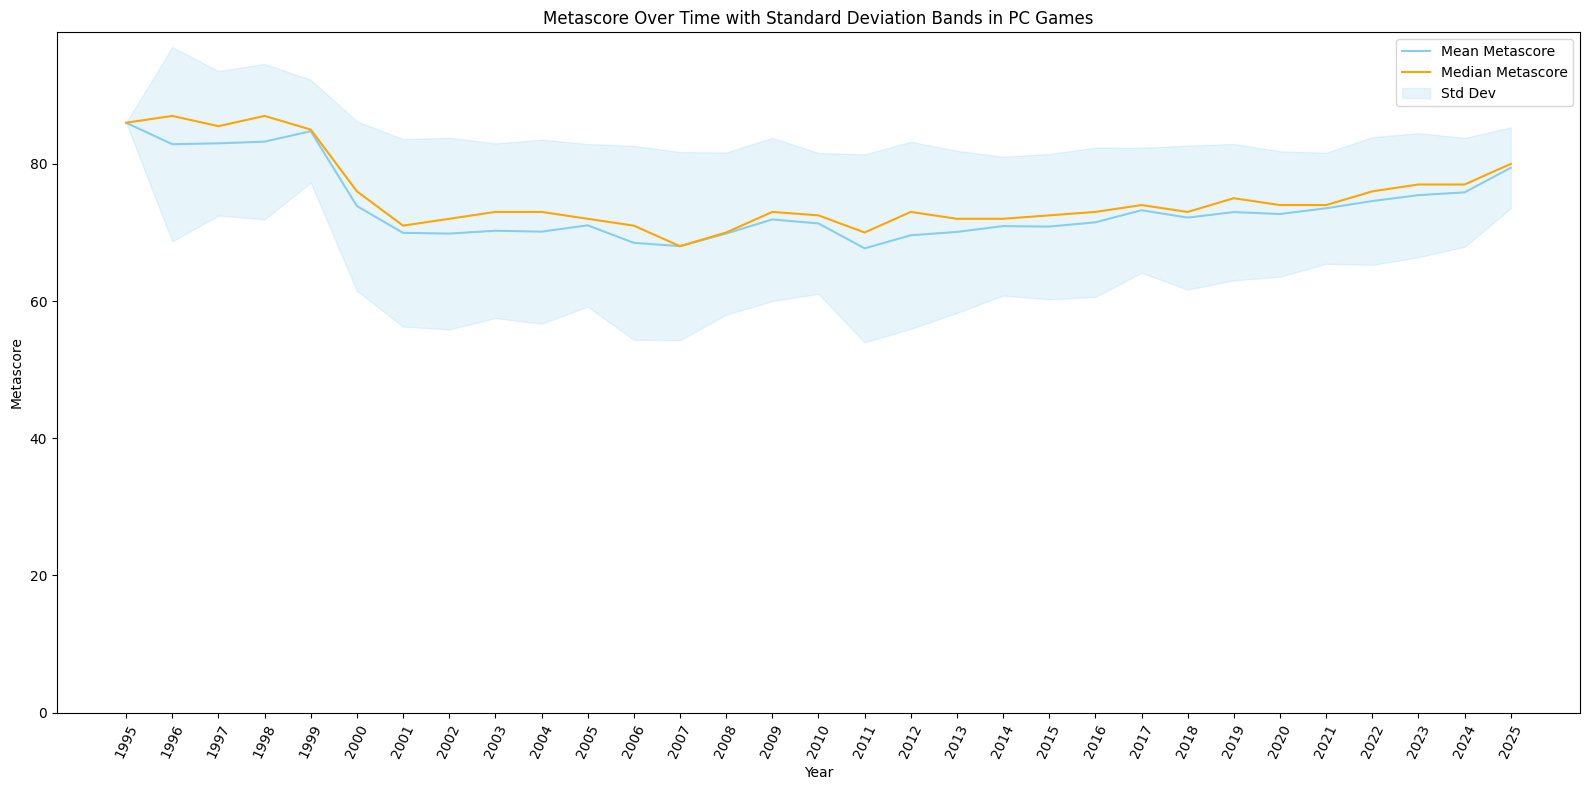

In [19]:
time_series_metascore_evolution(pc_data,
                                'PC',
                                close=False)

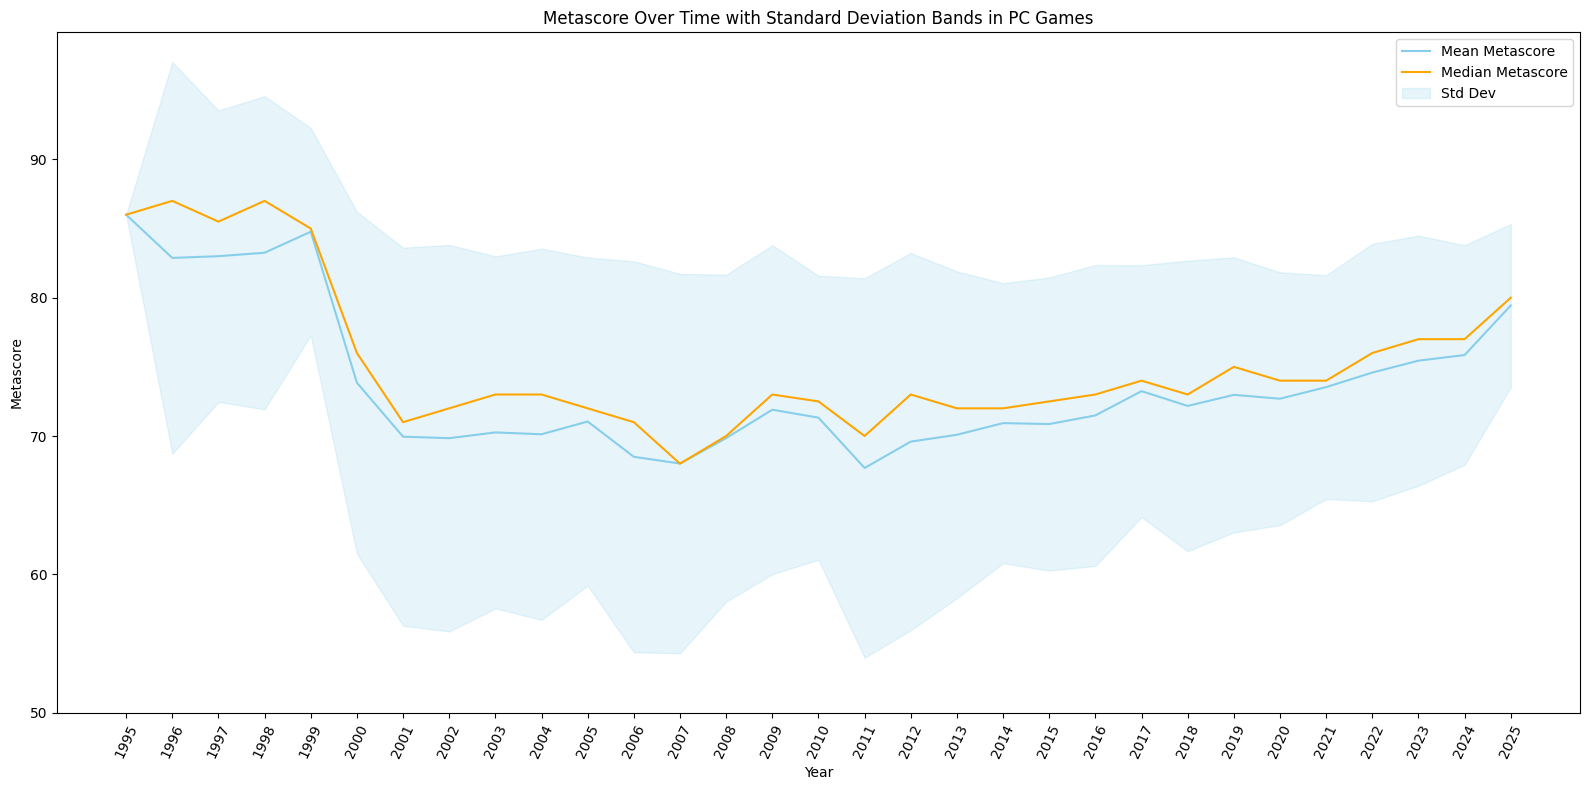

In [20]:
time_series_metascore_evolution(pc_data,
                                'PC',
                                close=True)

- The data reveals a distinctive pattern characterized by three major phases of evolution. The initial period (1995-1999) demonstrates remarkably high quality metrics, with both mean and median scores consistently above 80 points, suggesting an era of exceptional quality standards in early PC gaming. This is followed by a precipitous decline around 2000, where average scores dropped approximately 10 points to stabilize in the 70-75 range for nearly a decade, potentially indicating market saturation or reduced quality control during rapid industry expansion.
- From 2010 onward, the data exhibits a gradual but consistent upward trajectory, with scores incrementally improving to approach the 80-point threshold again by 2025. The standard deviation bands maintain relatively consistent width throughout the timeline, spanning approximately 15-20 points above and below the mean, indicating persistent quality variability across releases regardless of era. Notably, the median consistently sits slightly above the mean throughout most periods, suggesting a minor negative skew in the metascore distribution—fewer extremely low-scoring outliers compared to high-scoring ones. The convergence of mean and median values in recent years (2022-2025) further indicates a normalization of quality distribution, potentially reflecting industry maturation and stabilization of quality standards after three decades of PC game development. This visualization effectively captures the cyclical nature of quality progression in the PC gaming industry while highlighting the recent renaissance in critical reception.

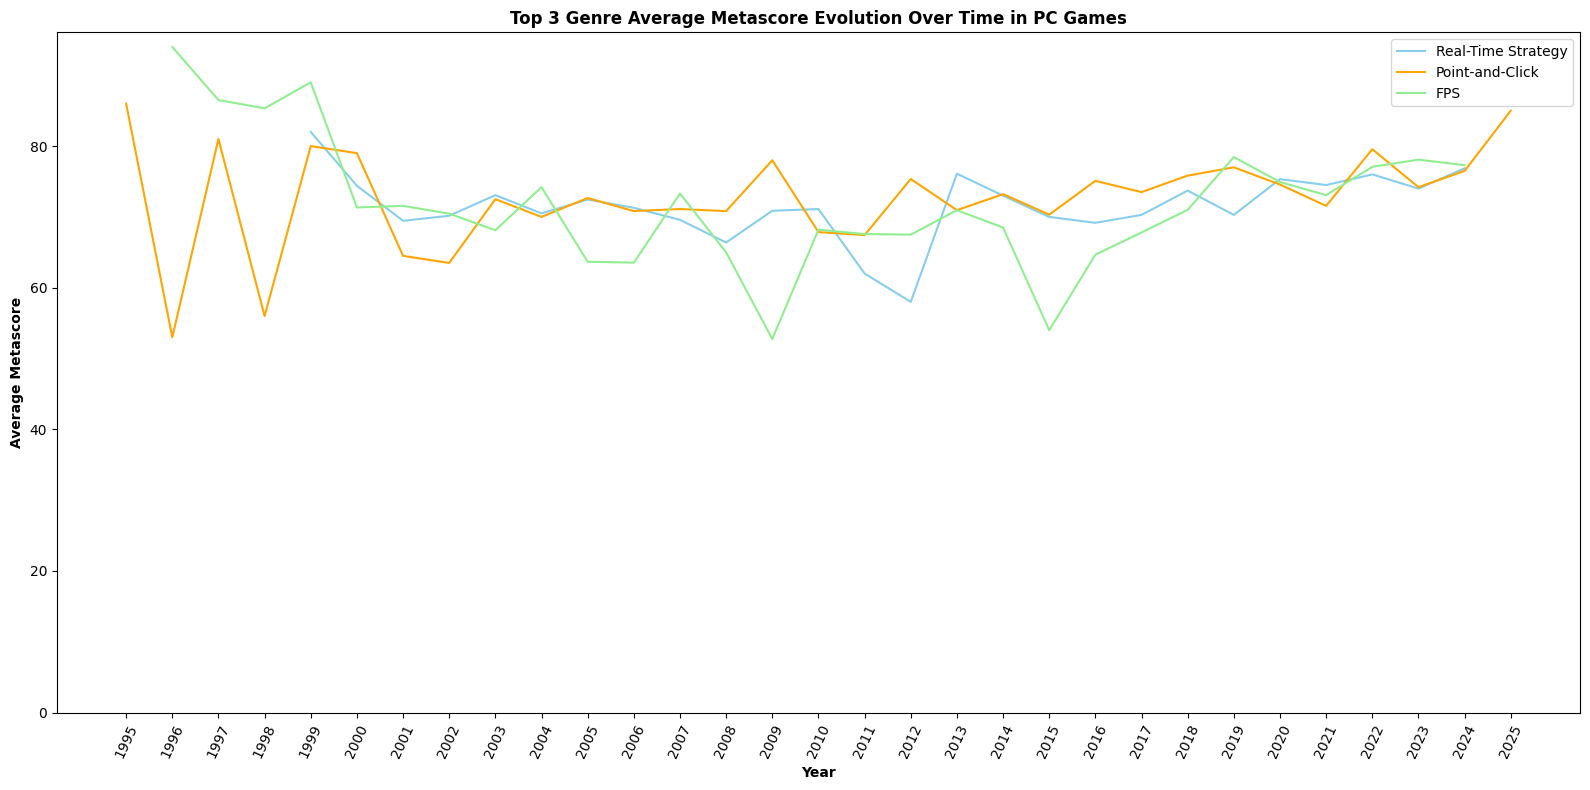

In [21]:
time_series_metascore_evolution_genre(pc_data,
                                      ['Real-Time Strategy', 'Point-and-Click', 'FPS'],
                                      'PC',
                                      close=False)

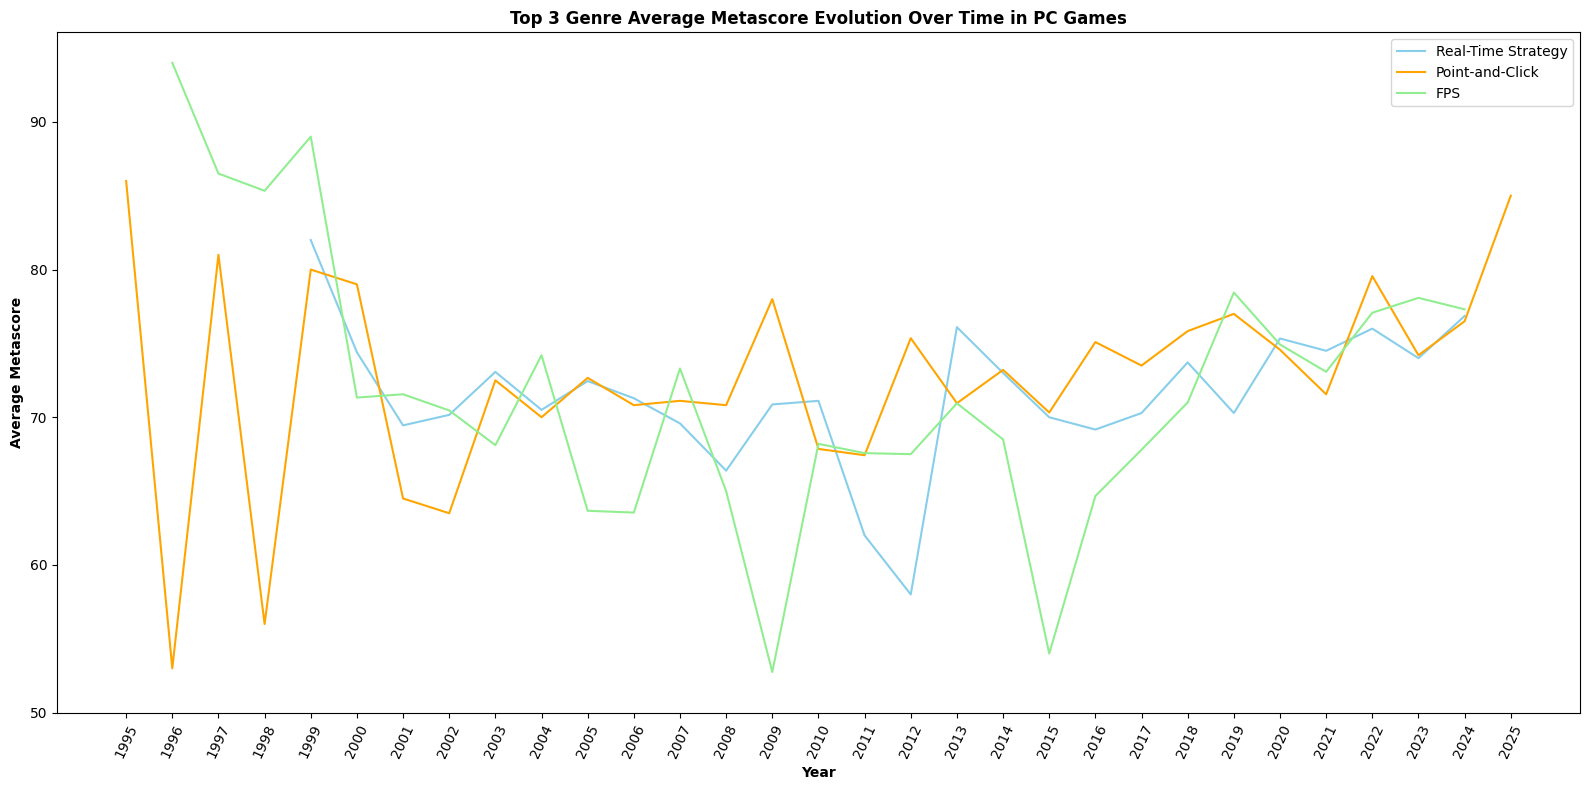

In [22]:
time_series_metascore_evolution_genre(pc_data,
                                      ['Real-Time Strategy', 'Point-and-Click', 'FPS'],
                                      'PC',
                                      close=True)

- The longitudinal analysis tracking the three most prominent PC gaming genres—Real-Time Strategy (RTS), Point-and-Click adventures, and First-Person Shooters (FPS)—reveals fascinating quality trajectories and competitive dynamics over a 30-year period. The FPS genre demonstrates perhaps the most dramatic evolution, beginning with exceptional quality metrics in the mid-1990s (peaking near 95 points), likely reflecting the groundbreaking innovation of early titles like Doom and Quake, followed by significant volatility. Particularly notable are two pronounced quality troughs for FPS games around 2009 and 2016 (dropping below 55 points), possibly coinciding with market oversaturation or developmental challenges during platform transitions.
- Point-and-Click adventures exhibit remarkable resilience and a distinctive U-shaped quality trajectory. After experiencing significant fluctuations in the 1990s, including dramatic drops to approximately 55 points in 1996 and 1998, the genre stabilized in the mid-range before demonstrating consistent improvement from 2010 onward, culminating in an impressive resurgence by 2025 with scores exceeding 85 points. This pattern suggests successful reinvention and adaptation of classic game mechanics for modern audiences. Meanwhile, RTS games display the most stable quality profile overall, maintaining relatively consistent scores between 65-75 points throughout most of the observed period, with a notable improvement trend from 2015 onward. The convergence of all three genres toward the 75-85 point range in recent years indicates a harmonization of quality standards across these established gaming categories, potentially reflecting industry-wide improvements in development practices, technological capabilities, and critical assessment methodologies. This visualization effectively illustrates how different gaming genres experience distinct quality evolution patterns while responding to shared industry dynamics.

In [23]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER GLOBAL PC
results = tfidf_analysis_genre(pc_data)
for genre, scores in results.items():
    print(f"Genre: {genre}")
    print(scores.head(10))
    print("-" * 30)

Genre: Western RPG
new            0.057827
world          0.043392
game           0.034880
rpg            0.031921
players        0.023422
evil           0.023253
adventure      0.023114
baldur         0.021844
gate           0.021844
baldur gate    0.021844
dtype: float64
------------------------------
Genre: FPS
new               0.043778
game              0.033248
person            0.032423
world             0.032112
shooter           0.030955
fps               0.024718
player            0.024547
person shooter    0.024409
action            0.023504
players           0.023195
dtype: float64
------------------------------
Genre: 4X Strategy
new              0.073180
strategy         0.049056
civilization     0.049033
game             0.046435
civilizations    0.040525
galactic         0.040174
space            0.037280
strategy game    0.034930
based            0.034665
world            0.033544
dtype: float64
------------------------------
Genre: Management
city        0.065522
new 


- The comprehensive TF-IDF analysis across two segments of PC game genres reveals a rich tapestry of lexical markers that not only underscore generic attributes such as “new,” “game,” and “world” but also highlight distinct genre-specific features. Across genres like Western RPG, FPS, and 4X Strategy, the recurring prominence of terms like “rpg,” “strategy,” “civilization,” and even specific franchise references such as “baldur gate” emphasize a blend of narrative depth, strategic complexity, and immersive role-playing experiences. In genres such as Management, Real-Time Strategy, and Action RPG, the frequent appearance of words tied to interactive and temporal dynamics (e.g., “players,” “time,” “action”) illustrates the inherent focus on user engagement and real-time decision making. Notably, simulation-driven genres such as Virtual Life and Train Sim exhibit high TF-IDF values for terms like “sims,” “simulator,” and “railroad,” which indicate a strong dedication to realism and operational intricacies. Meanwhile, genres with an experimental or hybrid nature—like Roguelike, JRPG, and Survival—tend to incorporate compound phrases and evocative descriptors (for instance, “roguelike” or “survival horror”) that emphasize challenge, unpredictability, and atmospheric tension.
- The second segment further enriches this linguistic landscape by detailing specialized keywords in niche genres such as Light Gun, Arcade Racing, and Puzzle, where terms like “espire,” “motocross,” and “puzzle” distinctly capture the essence of rapid action and problem-solving. In sports-oriented genres like Soccer Sim, Football Sim, and Cricket, high-scoring terms such as “football,” “players,” and “international” reflect a commitment to authenticity and competitive spirit, while the exceptional TF-IDF weight for “golf” in the Golf genre (0.419314) signals an outlier with a unique thematic twist. Other genres, including Tactical Third Person Shooter, Auto Racing, and Racing Sim, rely on a combination of standard descriptors alongside contextual phrases that evoke dynamic gameplay, strategic combat, and precise control. Furthermore, categories such as Logic Puzzle, Hidden Object, and Edutainment illustrate how self-referential and thematic vocabulary (e.g., “moles,” “crime,” “photographs”) not only define their gameplay mechanics but also establish an emotional and cognitive connection with the audience. Collectively, these findings offer deep insights into the design philosophies, narrative styles, and gameplay expectations that define the diverse world of PC gaming.

In [24]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY TIME GLOBAL PC
results = tfidf_analysis_time(pc_data)
for year, scores in results.items():
    print(f"Year: {year}")
    print(scores.head(10))
    print("-" * 30)

Year: 2023.0
new          0.039411
world        0.038209
game         0.029464
adventure    0.027036
time         0.023796
explore      0.023411
play         0.021955
story        0.021458
set          0.019434
way          0.018440
dtype: float64
------------------------------
Year: 2004.0
new           0.051953
game          0.044656
world         0.040623
players       0.037974
war           0.030645
player        0.026405
time          0.023394
battle        0.020819
experience    0.019863
real          0.019567
dtype: float64
------------------------------
Year: 2000.0
new            0.048949
game           0.031811
interactive    0.026659
world          0.022077
action         0.021234
strategy       0.020391
time           0.019989
control        0.018186
space          0.018052
real           0.017405
dtype: float64
------------------------------
Year: 1998.0
game        0.065639
world       0.043519
player      0.034363
missions    0.032264
life        0.031857
falcon      0.0

- The first segment of the TF-IDF analysis on game summaries by year, covering periods from the late 1990s through 2023, reveals a dynamic evolution in descriptive focus over time. In recent years such as 2023, 2020, and 2018, keywords like “new,” “world,” “game,” and “adventure” underscore a modern emphasis on freshness, expansive environments, and immersive narratives. Earlier periods—exemplified by 2004, 2000, and 1998—tended to place greater emphasis on interactivity and conflict through terms such as “players,” “interactive,” “missions,” and “war.” The constant recurrence of foundational descriptors like “game,” “new,” and “world” suggests these elements have long served as core communicative tools, while distinctive lexical choices in specific years (for instance, the unique appearance of “evil” and “roger” in 1996) hint at contextual influences and evolving stylistic trends in game marketing. Intermediate years like 2013, 2017, and 2010 show a balanced blend of narrative and mechanical elements, merging terms such as “adventure,” “story,” and “action” with the perennial markers, which signals a gradual shift toward richer storytelling in game summaries.
- The second segment further enriches this longitudinal perspective by introducing additional years that exhibit their own unique linguistic signatures. For instance, in 1997, prominent terms like “world,” “game,” “katarn,” and “jedi” evoke strong cultural and cinematic influences, reflecting the impact of popular science fiction and fantasy narratives of that time. In the early 2000s and mid-decade (e.g., 2002 and 2008), while the staples “new” and “world” persist, there is a noticeable lean toward militaristic and competitive themes with words such as “war,” “forces,” and “battle” emerging. More recent entries—2021, 2022, and 2024—tend to balance exploratory terms like “explore” with narrative cues such as “story” and even context-specific words like “city,” indicating a refined orientation toward immersive experiences. Unique outliers, such as 1995 with its high emphasis on terms like “ben” and “powerful cinematic,” alongside 2025’s introduction of unconventional descriptors like “hunter” and “cinta,” underscore the variability and experimentation in thematic emphasis over time. Together, these two segments illustrate a gradual transition in game summaries from a gameplay-centric lexicon toward a more nuanced, narrative-driven discourse, mirroring the broader shifts in industry trends and consumer expectations over the decades.

In [25]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY PUBLISHER GLOBAL PC
results = tfidf_analysis_publisher(pc_data)
# WARNING: There are approximately 1200 unique publishers. Printing all results will generate a large output.
# If you want to print the results, uncomment the following code.
'''
for publisher, scores in results.items():
    print(f"Publisher: {publisher}")
    print(scores.head(10))
    print("-" * 30)
'''

'\nfor publisher, scores in results.items():\n    print(f"Publisher: {publisher}")\n    print(scores.head(10))\n    print("-" * 30)\n'

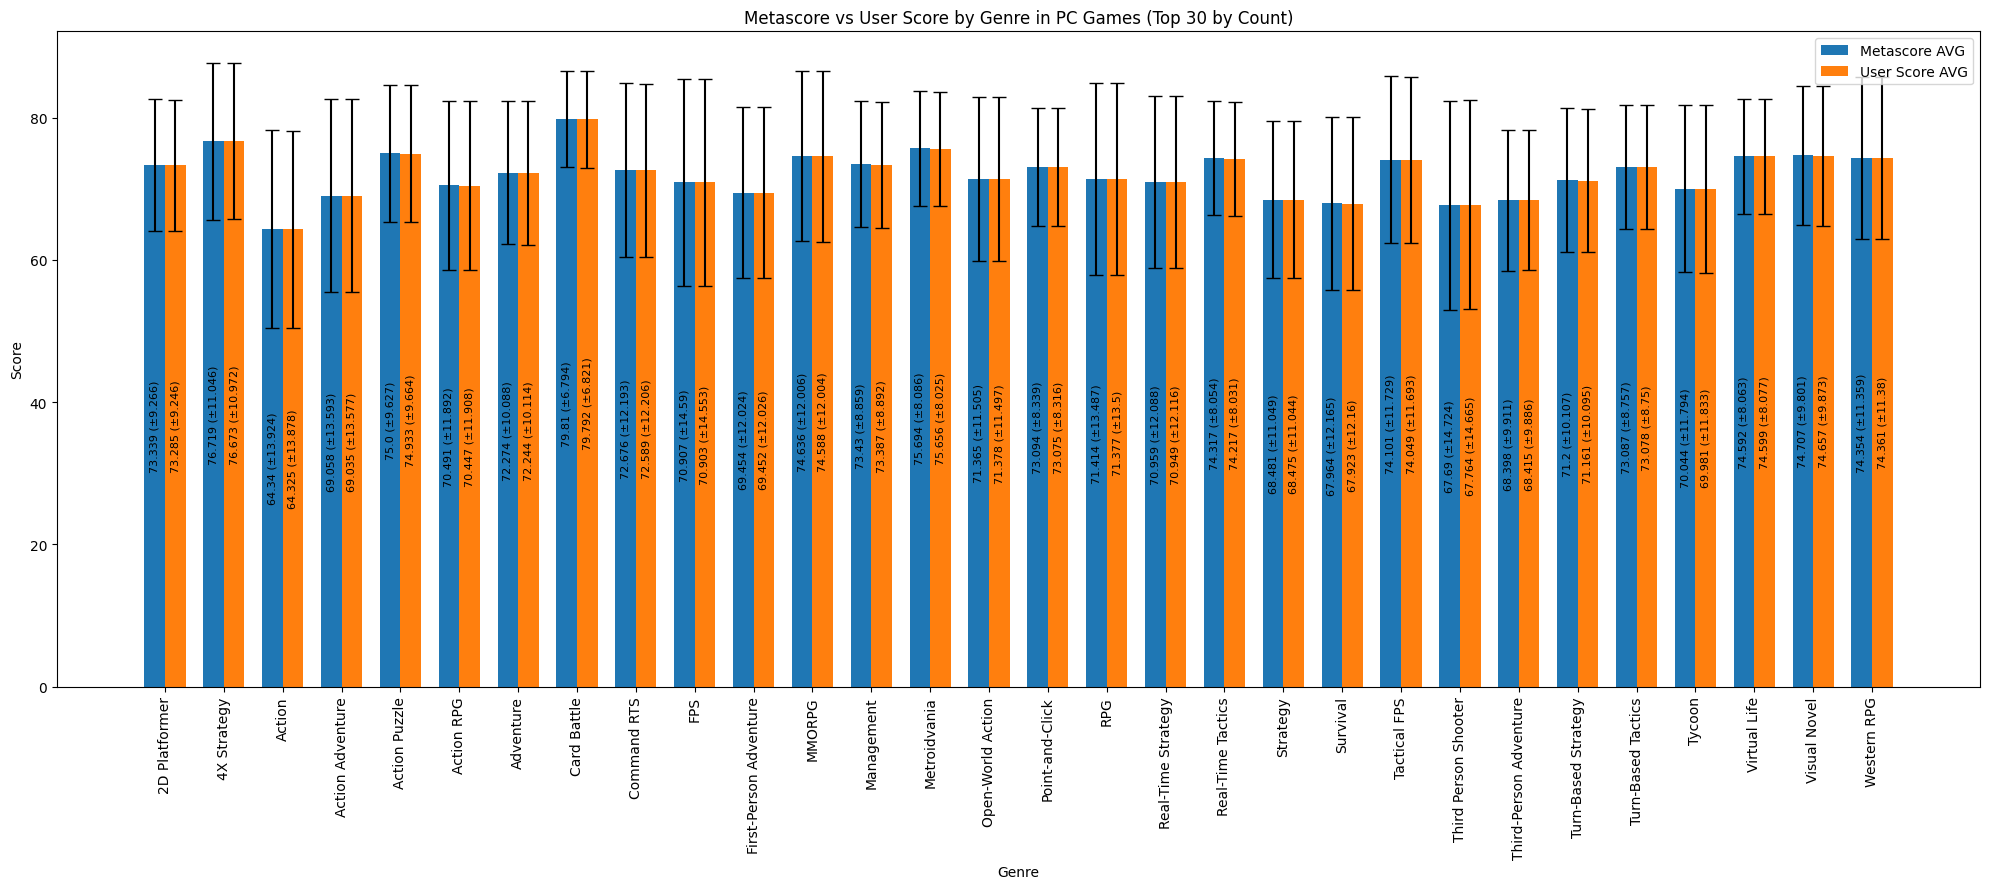

In [26]:
metascore_vs_user_score_pc(pc_data)

- On the one hand, Metascore typically reflects expert evaluations that focus on technical execution, innovation, and overall production quality. On the other, user scores often emphasize gameplay experience, community reception, and long-term enjoyment. By placing these two metrics side by side, one can observe the extent to which professional assessments align—or diverge—from popular opinion within each genre.
- In many genres, there is a relatively tight clustering of Metascore and user score averages, indicating that critics and players converge in their evaluation of those titles. This overlap often occurs in well-established categories with robust quality standards, such as certain action or RPG subgenres, where high production values and refined mechanics garner widespread acclaim. However, some genres may exhibit a notable gap between professional and player perspectives. For example, a higher critic score but a more moderate user score could imply that, while the technical merits or design choices are well-received by professionals, the broader audience may find aspects such as replayability, difficulty balance, or pricing less appealing.
- Error bars, representing variability in the underlying data, add another dimension to this analysis. A tall error bar suggests that scores within a genre can differ considerably from one title to another, possibly due to variations in production budgets, developer expertise, or target audiences. Conversely, a shorter error bar indicates more consistency in the reception of games within that genre. In some cases, the presence of standout hits or disappointments can heavily influence the overall average and standard deviation, highlighting the importance of individual success stories in shaping a genre’s reputation.
- Genres with consistently high alignment between critic and user scores may represent safer investments, as they demonstrate a proven ability to satisfy both expert and consumer expectations. Meanwhile, genres showing large discrepancies or wide score ranges may signal opportunities for innovation or areas where developers can address unmet player needs. Ultimately, comparing critic and user feedback in this manner provides a balanced view of how different segments of the market value each genre, offering strategic insights into product development, marketing priorities, and community engagement.

### PLAYSTATION FRANCHISE

---
- Sony's PlayStation first burst onto the scene in 1994, revolutionizing the way home gaming was experienced. Its debut marked the advent of 3D graphics and CD-based storage in a market previously dominated by cartridge-based systems, setting a new benchmark for immersive, narrative-driven games. Iconic titles like Final Fantasy VII and Metal Gear Solid not only captured the hearts of gamers but also established PlayStation as a symbol of innovation and quality in interactive entertainment.

- Over the years, the evolution of the PlayStation brand has been nothing short of remarkable. With the PlayStation 2 becoming the best-selling console of all time, the platform expanded its multimedia capabilities and game library to unprecedented levels. Subsequent generations—the PlayStation 3 and PlayStation 4—brought high-definition graphics, online connectivity, and digital distribution to the forefront of the gaming experience. The latest console, the PlayStation 5, pushes the envelope further with ultra-fast SSDs and advanced haptic feedback, ensuring that every gaming moment is as immersive as possible.

<img src="https://m.media-amazon.com/images/S/aplus-media-library-service-media/e1611b3c-2ab6-4b60-80ce-ecb6c010d4d1.__CR0,0,970,300_PT0_SX970_V1___.jpg" alt="banner" width="700" style="display: block; margin: 0 auto;">

- Beyond its impressive technical milestones, PlayStation has fostered a vibrant cultural ecosystem that resonates globally. The creation of the PlayStation Network enabled a connected community of gamers to share experiences, engage in multiplayer battles, and discover exclusive digital content. With a stable of celebrated franchises like Uncharted, The Last of Us, and Gran Turismo, PlayStation has cultivated a distinctive identity that values rich storytelling and creative innovation, nurturing a loyal and passionate fan base around the world.

- PlayStation’s influence transcends hardware and software, impacting broader entertainment and media landscapes. Its commitment to delivering immersive multimedia experiences is evident in initiatives like PlayStation VR, which bring virtual reality into mainstream gaming. By supporting a diverse range of titles—from indie gems to blockbuster AAA games—PlayStation continues to inspire new generations of developers and gamers alike, solidifying its role as a cornerstone of modern interactive culture and a driving force behind the evolution of digital entertainment.

---

In [27]:
ps_reg = ['PlayStation 4', 
          'PlayStation 2', 
          'PlayStation 5', 
          'PlayStation 3', 
          'PSP', 
          'PlayStation Vita', 
          'PlayStation']
ps_data = df[df['section'].isin(ps_reg)].copy()
first_11_columns_ps = ps_data.columns[:11].tolist()
ps_columns = [col for col in ps_data.columns if 'ps' in col.lower() or 'playstation' in col.lower()]
final_columns_ps = first_11_columns_ps + [col for col in ps_columns if col not in first_11_columns_ps]
ps_data = ps_data[final_columns_ps]

In [28]:
ps_data.head(5)

title                 genres/0  metascore  \
0                     Tekken 3              3D Fighting       96.0   
4   Uncharted 2: Among Thieves  Linear Action Adventure       96.0   
12          Grand Theft Auto V        Open-World Action       97.0   
14        Grand Theft Auto III        Open-World Action       97.0   
15       Red Dead Redemption 2        Open-World Action       97.0   

     publisherName                                       publisherUrl  \
0            Namco          https://www.metacritic.com/company/namco/   
4             SCEA           https://www.metacritic.com/company/scea/   
12  Rockstar Games  https://www.metacritic.com/company/rockstar-ga...   
14  Rockstar Games  https://www.metacritic.com/company/rockstar-ga...   
15  Rockstar Games  https://www.metacritic.com/company/rockstar-ga...   

   releaseDate        section  \
0   1998-04-29    PlayStation   
4   2009-10-13  PlayStation 3   
12  2014-11-18  PlayStation 4   
14  2001-10-22  PlayStation 2   
15  2018-10-26  PlayStation 4   

                                              summary  type  \
0   An ancient evil force has reawakened, attackin...  game   
4   Fortune hunter Nathan Drake returns in Unchart...  game   
12  Los Santos is a vast, sun-soaked metropolis fu...  game   
14  Players are put at the heart of their very own...  game   
15  Developed by the creators of Grand Theft Auto ...  game   

                                                  url  ...  \
0            https://www.metacritic.com/game/tekken-3  ...   
4   https://www.metacritic.com/game/uncharted-2-am...  ...   
12  https://www.metacritic.com/game/grand-theft-au...  ...   
14  https://www.metacritic.com/game/grand-theft-au...  ...   
15  https://www.metacritic.com/game/red-dead-redem...  ...   

   playStationVitaUserReviews/score playStationVitaUserReviews/url  \
0                               NaN                            NaN   
4                               NaN                            NaN   
12                              NaN                            NaN   
14                              NaN                            NaN   
15                              NaN                            NaN   

    pspUserReviews/name  pspUserReviews/negativeCount  \
0                   NaN                           NaN   
4                   NaN                           NaN   
12                  NaN                           NaN   
14                  NaN                           NaN   
15                  NaN                           NaN   

    pspUserReviews/neutralCount  pspUserReviews/normalizedScore  \
0                           NaN                             NaN   
4                           NaN                             NaN   
12                          NaN                             NaN   
14                          NaN                             NaN   
15                          NaN                             NaN   

    pspUserReviews/positiveCount  pspUserReviews/reviewCount  \
0                            NaN                         NaN   
4                            NaN                         NaN   
12                           NaN                         NaN   
14                           NaN                         NaN   
15                           NaN                         NaN   

   pspUserReviews/score pspUserReviews/url  
0                   NaN                NaN  
4                   NaN                NaN  
12                  NaN                NaN  
14                  NaN                NaN  
15                  NaN                NaN  

[5 rows x 67 columns]

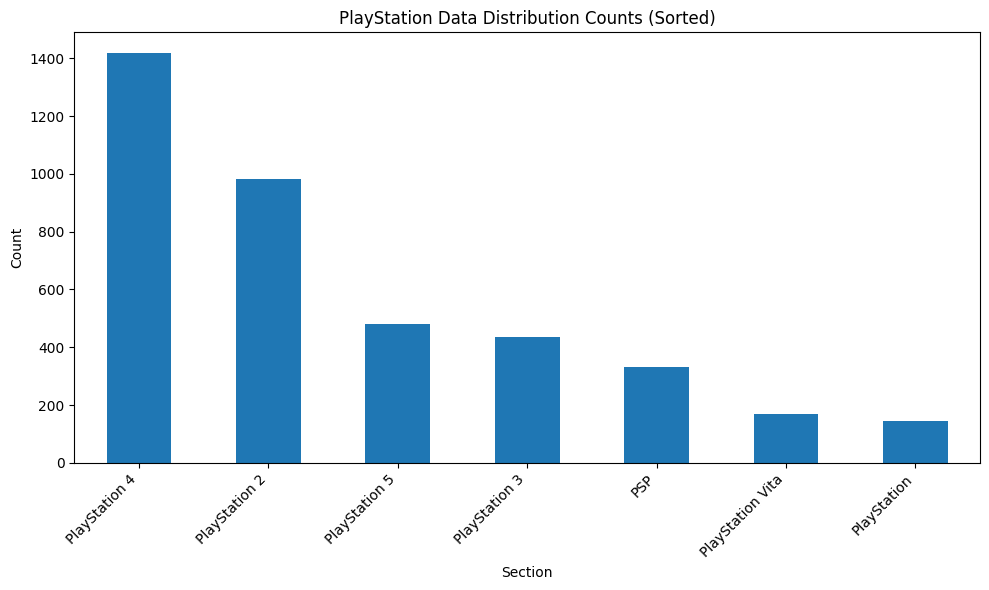

In [29]:
in_distribution(ps_data,
                'PlayStation')

- The PlayStation Data Distribution Counts graph provides a comprehensive view of game distribution across Sony's console generations, revealing significant trends in the PlayStation ecosystem. PlayStation 4 clearly dominates the catalog with approximately 1,400 titles, establishing itself as the platform with the most robust software library. This substantial lead likely reflects the PS4's extended market presence, developer-friendly architecture, and the expansion of digital distribution channels during its lifecycle.
- PlayStation 2 follows as the second most populated platform with nearly 1,000 titles, which aligns with its historical status as one of the best-selling consoles of all time. The considerable gap between PS4 and PS2 libraries (approximately 400 titles) illustrates the industry's evolution toward increased game production capacity over time. It's worth noting that the PS2's impressive library was amassed despite more limited digital distribution options, highlighting the platform's exceptional market penetration and developer support during its era.
- PlayStation 5, despite being a relatively newer addition to Sony's console lineup, already shows a substantial library of approximately 480 games, positioning it ahead of the PlayStation 3's collection of around 430 titles. This rapid accumulation of PS5 titles suggests both accelerated development pipelines and effective backward compatibility strategies that may count enhanced PS4 titles in its total. The PS3's relatively smaller library compared to both its predecessor and successor likely reflects its more complex architecture that presented development challenges for many studios.
- The portable PlayStation platforms and the original PlayStation show progressively smaller libraries, with PSP hosting approximately 330 games, PlayStation Vita containing about 170 titles, and the original PlayStation rounding out the list with roughly 140 games. This distribution illustrates Sony's shifting focus toward home consoles, with portable platforms receiving diminishing support over time. The significant drop between PSP and PS Vita libraries particularly highlights Sony's reduced commitment to the handheld market segment as mobile gaming gained prominence.

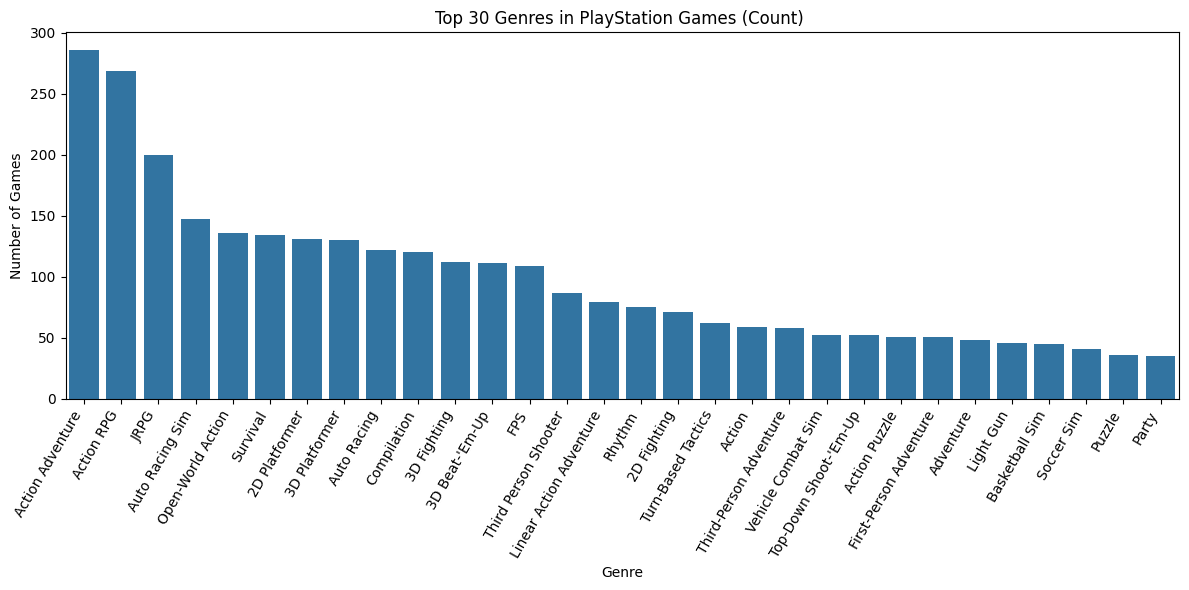

In [30]:
top_30_genres(ps_data,
              'PlayStation')

- The Top 30 Genres in PlayStation Games chart reveals a clear preference for action-oriented experiences across the PlayStation ecosystem, with Action Adventure games leading the distribution at approximately 290 titles. This dominance aligns with PlayStation's brand identity as a platform for immersive, narrative-driven experiences that combine exploration with combat mechanics. The strong second-place showing of Action RPGs (approximately 270 titles) further reinforces this pattern, suggesting that games blending action elements with character progression systems resonate particularly well with the PlayStation audience.
- Traditional RPGs secure the third position with roughly 200 titles, highlighting the continued importance of Japanese role-playing games and Western RPGs in PlayStation's history. This substantial representation reflects Sony's strong relationships with Japanese developers and publishers who pioneered the JRPG genre, as well as Western studios that expanded the RPG market. The fourth through eighth positions on the chart are occupied by Auto Racing, Open-World Action, Survival, 3D Platformer, and 2D Platformer genres, each with approximately 130-150 titles, demonstrating PlayStation's balanced approach to genre diversity beyond its action-adventure core.
- The middle section of the chart reveals significant representation of Compilation, 3D Fighting, 3D Platforming, Beat-Em-Up, and FPS genres, each containing approximately 100-110 titles. This middle tier represents PlayStation's effective coverage of popular mainstream genres, ensuring the platform appeals to various player preferences. The presence of both 3D Fighting and Beat-Em-Up categories highlights PlayStation's historical strength in combat-focused experiences, dating back to influential titles from the original PlayStation era.
- The lower third of the top 30 genres includes more specialized categories such as Rhythm, 2D Fighting, Turn-Based Tactics, Action Adventure, Third-Person Shooter, and Vehicle Combat, with progressively fewer titles (ranging from approximately 70 down to 35). This long tail distribution demonstrates PlayStation's capacity to support niche genres while maintaining clear emphasis on its core strengths. The chart concludes with Party games at approximately 35 titles, reflecting PlayStation's secondary focus on social gaming experiences compared to its primary emphasis on single-player and competitive content.

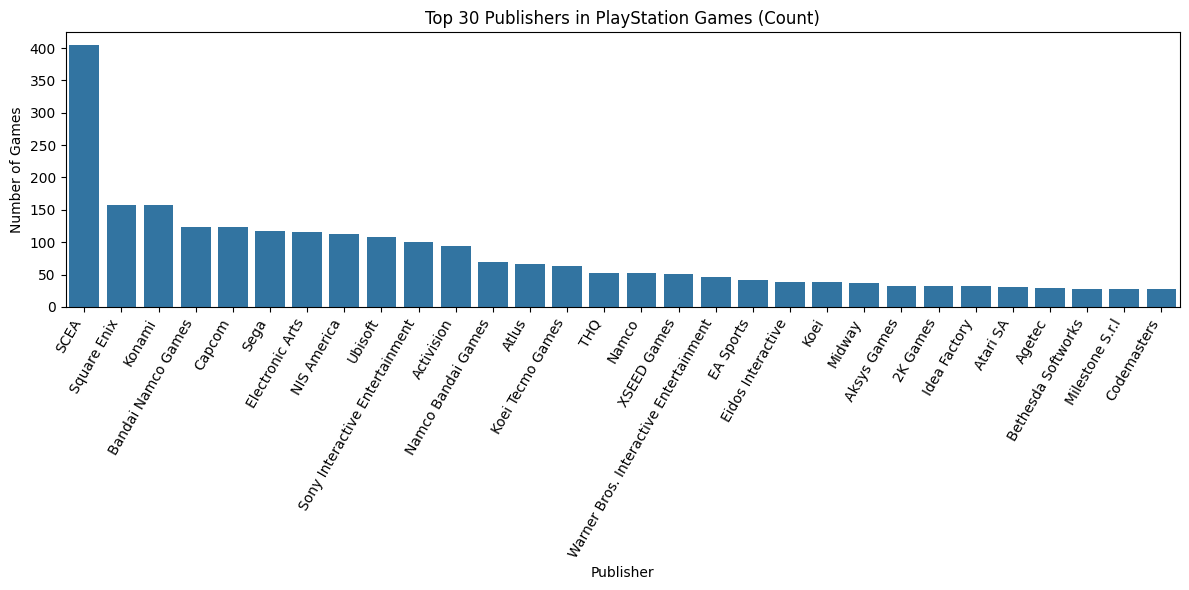

In [31]:
top_30_publishers(ps_data,
                  'PlayStation')

- The Top 30 Publishers chart for PlayStation games reveals a dominant first-party presence, with SCEA (Sony Computer Entertainment America) towering over the distribution at approximately 400 titles. This substantial lead over all third-party publishers underscores Sony's strategic commitment to developing exclusive content that differentiates its platforms. The gap between SCEA and the next tier of publishers is striking, with Square Enix and Konami each publishing roughly 155 games, less than half of Sony's output, highlighting PlayStation's reliance on first-party development as a competitive advantage.
- The second tier of publishers includes several Japanese companies alongside Western publishers, with Bandai Namco Games, Capcom, Sega, Electronic Arts, NIS America, and Ubisoft each contributing between 100-120 titles. This balanced representation of Eastern and Western developers illustrates PlayStation's global appeal and Sony's successful cultivation of international publishing relationships. The strong presence of Japanese publishers in particular (Square Enix, Konami, Bandai Namco, Capcom, Sega) reflects PlayStation's historical strength in the Japanese market and these companies' long-standing preference for Sony platforms.
- The middle range of the publisher distribution shows a gradual decline from Activision (approximately 95 titles) through companies like Namco Bandai, Atlus, Koei Tecmo Games, THQ, and Warner Bros. Interactive Entertainment (ranging from approximately 65 down to 45 titles). This progression represents the platform's bread-and-butter third-party support from established publishers who consistently release multiplatform titles. The presence of specialized publishers like Atlus in this range demonstrates PlayStation's appeal to developers of niche Japanese content alongside mainstream Western franchises.
- The lower portion of the top 30 publishers includes companies such as Eidos Interactive, Sport Interactive, Kalypso Media, 2K Games, Idea Factory, Atari SA, Aspyr, and Codemasters, each contributing between approximately 30-20 titles. This diverse group encompasses publishers specializing in specific genres (sports, simulation, strategy) and smaller publishers with more limited output. The inclusion of companies like Aspyr, known primarily for ports and remasters, suggests PlayStation's commitment to preserving access to legacy content. This comprehensive publisher ecosystem demonstrates Sony's success in balancing exclusive first-party development with broad third-party support across various market segments.

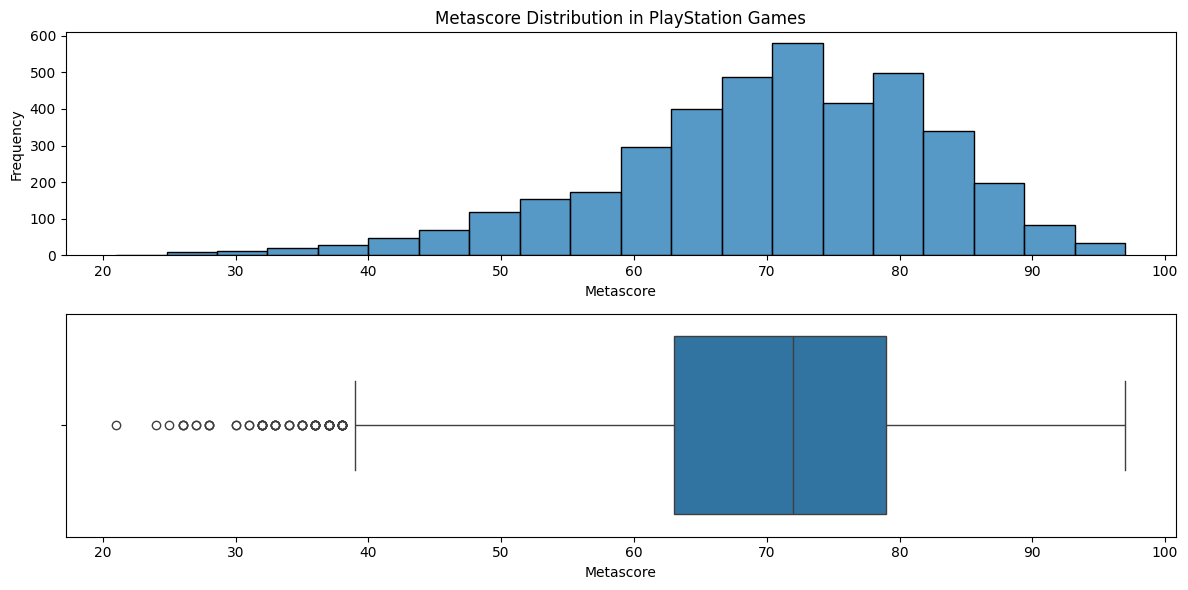

In [32]:
metascore_analysis_global(ps_data,
                          'PlayStation')

- The Metascore Distribution in PlayStation Games presents a comprehensive view of critical reception across the PlayStation ecosystem, revealing a right-skewed normal distribution centered around the 70-75 range. This peak frequency of approximately 580 games achieving scores in this range suggests that the typical PlayStation release receives moderately positive critical reception. The substantial representation in this middle-high range indicates PlayStation's generally successful quality control mechanisms and publisher selection criteria throughout its platform history.
- The distribution shows a gradual buildup from the 60-65 range (approximately 300 games) to the 65-70 range (approximately 400 games) before reaching its peak, then declining through the 75-80 range (approximately 490 games) and 80-85 range (approximately 340 games). This pattern creates a relatively symmetrical bell curve centered slightly above the traditional review scale's midpoint (50), indicating that PlayStation games tend to be reviewed more favorably than unfavorably. The right skew suggests that exceptional titles receiving scores above 85 are more common than poor titles scoring below 50, reflecting well on the platform's overall quality standards.
- The accompanying box plot beneath the histogram provides additional statistical context, with the interquartile range (IQR) spanning approximately from 65 to 80, confirming that most PlayStation games achieve at least moderately favorable reviews from critics. The median score appears to fall around 72-73, aligning with the histogram's peak frequency. The whiskers of the box plot extend to approximately 40 on the lower end and 95 on the upper end, establishing these as the general boundaries for normal review performance, with several outlier points visible below 40 representing statistical anomalies rather than typical quality levels.
- The significantly lower frequency of games in the lower score ranges is particularly noteworthy, with very few titles scoring below 40 and a gradual increase through the 40-60 range. This distribution pattern suggests effective quality filtering mechanisms within the PlayStation ecosystem, whether through Sony's certification processes, publisher self-selection, or market forces that discourage the release of lower-quality titles on the platform. The overall Metascore pattern indicates that PlayStation has generally maintained a consistent quality threshold throughout its history, with the majority of releases meeting at least basic quality standards expected by critics and consumers.

In [33]:
## DATA DESCRIPTIVE STATISTICS
print(tabulate(ps_data['metascore'].describe().to_frame(), 
               headers='keys', 
               tablefmt='grid'))

+-------+-------------+
|       |   metascore |
+=======+=============+
| count |   3965      |
+-------+-------------+
| mean  |     70.1654 |
+-------+-------------+
| std   |     12.0577 |
+-------+-------------+
| min   |     21      |
+-------+-------------+
| 25%   |     63      |
+-------+-------------+
| 50%   |     72      |
+-------+-------------+
| 75%   |     79      |
+-------+-------------+
| max   |     97      |
+-------+-------------+


- With 3,965 entries, the average metascore is approximately 70.17, while the median score is slightly higher at 72. This central tendency suggests that, overall, the games tend to be moderately well-received by critics. The standard deviation of about 12.06 indicates a moderate degree of variation in scores, pointing to a balanced mix of titles that generally cluster around the central values, yet with enough dispersion to highlight some outliers. The minimum score of 21 and a maximum of 97 illustrate the presence of both significantly low-rated and highly acclaimed games within the collection.
- The interquartile range—from the 25th percentile at 63 to the 75th percentile at 79—shows that the bulk of the titles fall within a relatively narrow band, suggesting a consistent level of quality for most releases. This consistency implies that while a few games may diverge sharply from the norm, the majority deliver a reliably enjoyable experience. The overall range also highlights the dynamic nature of the gaming landscape; certain titles achieve near-exceptional ratings, likely due to innovative gameplay, compelling narratives, or technical excellence, whereas others, possibly experimental or niche in appeal, fall on the lower end of the spectrum. Such variance is crucial for understanding both market trends and the diverse consumer expectations in the industry.
- These statistical insights carry important implications for both developers and gamers. For developers and publishers, understanding that the median and interquartile range fall within a favorable spectrum suggests there is a steady demand for well-rounded and polished games. Simultaneously, the presence of extreme outliers demonstrates that the market can still reward highly innovative titles while also penalizing those that underperform critically. For consumers, these numbers offer a realistic benchmark for game quality, indicating that while most titles provide a satisfying experience, there are always exceptional gems as well as occasional disappointments. Overall, the analysis underscores a mature, evolving ecosystem where continuous improvements and varied game design drive an ever-expanding landscape of interactive entertainment.

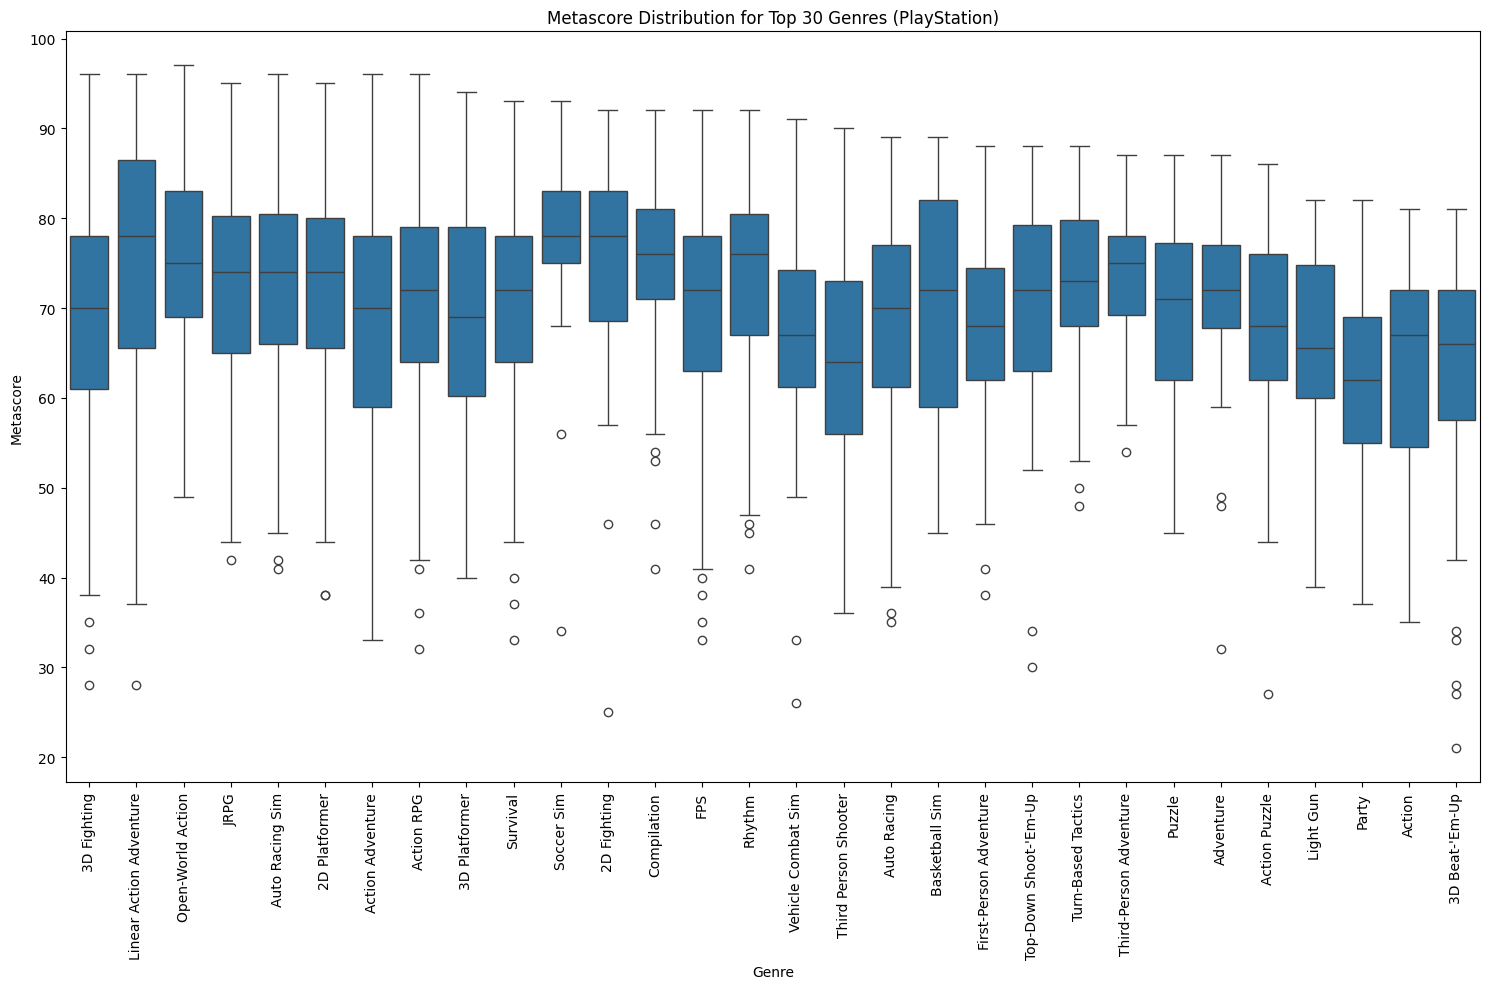

In [34]:
metascore_analysis_genre(ps_data,
                         'PlayStation')

- Linear Action Adventure emerges as the genre with the most consistently favorable critical reception, displaying a notably high median score approaching 80 and a relatively tight interquartile range. This indicates that games in this category maintain reliable quality standards that resonate with critics. Similarly, Soccer Sim and 2D Fighting genres demonstrate impressively high median scores above 75, suggesting these specialized categories attract developers with particular expertise in delivering polished experiences.
- Significant variation exists in the quality consistency across genres, as evidenced by the diverse interquartile ranges. Open-World Action, Auto Racing Sim, and 2D Platformer genres exhibit relatively narrow interquartile ranges, indicating consistent quality standards within these categories. In contrast, genres like 3D Fighting, Action Adventure, and Rhythm display considerably wider interquartile spans, suggesting more variable critical reception among their titles. This variability likely reflects the broader range of development studios working within these popular categories, from AAA productions to smaller independent teams.
- The outlier distribution provides valuable insight into genre-specific quality floors. Nearly all genres include outlier titles with Metascores below 40, representing critical failures that significantly deviate from category norms. These outliers appear most frequently in the Action, Party, and 3D Beat-Em-Up categories, suggesting these genres may attract more opportunistic development with inconsistent quality control. The consistent presence of these outliers across most genres indicates that PlayStation's platform has historically accommodated releases across the full spectrum of quality, including titles that fall well below typical standards.
- The lower end of the genre quality spectrum reveals that Party, Action, and 3D Beat-Em-Up genres not only contain notable outliers but also demonstrate lower median scores around 65 and extended lower quartiles. This pattern suggests these categories face particular challenges in maintaining consistent quality standards, potentially due to simpler game mechanics that may receive less development investment or attract studios with more limited resources. By contrast, the Soccer Sim genre maintains both a high median and relatively narrow distribution, indicating that sports simulation on PlayStation benefits from established development practices and consumer expectations that encourage higher baseline quality.

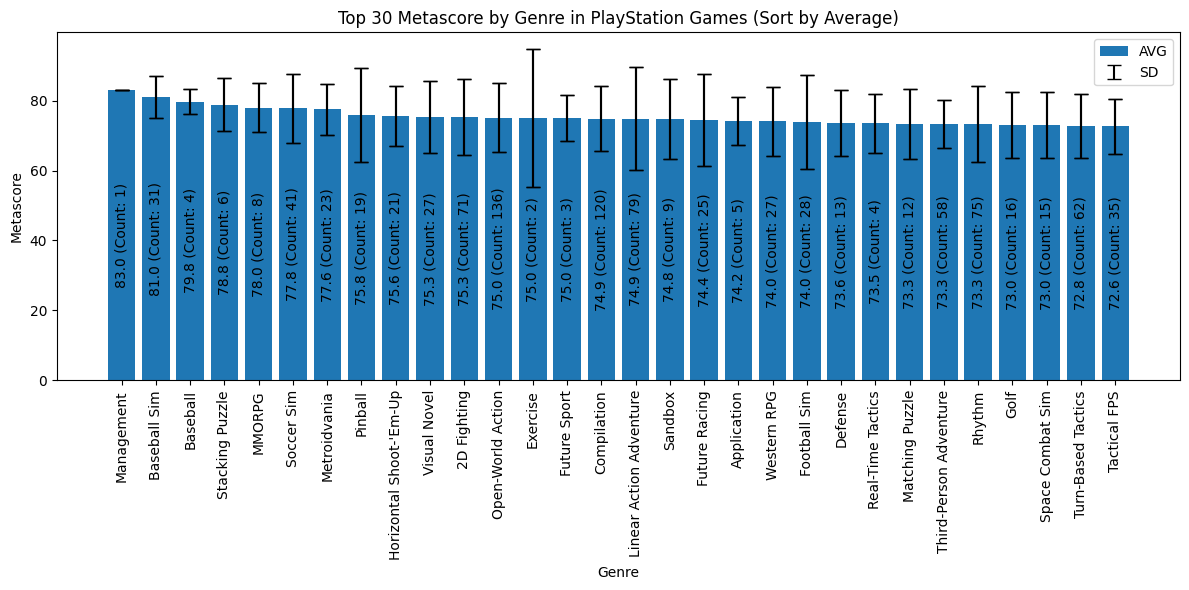

In [35]:
top_30_metascore_genre_avg(ps_data,
                           'PlayStation')

- The visualization of average Metascores by genre, arranged in descending order of average rating, reveals Management Simulation as the highest-rated category with an impressive 83.0 average across 4 titles. This specialized niche clearly benefits from focused development and targeted audience expectations. Baseball Sim follows closely at 81.0 across 31 titles, demonstrating that sports simulations consistently achieve strong critical reception on PlayStation platforms. The baseball genre's relatively narrow standard deviation further suggests established development approaches that reliably meet quality expectations.
- The clustering of average scores among the top-performing genres is particularly noteworthy, with the top 7 genres all achieving averages between 78.0 and 83.0. This high-performing group includes varied experiences such as Baseball, Stacking Puzzle, MMORPG, Soccer Sim, Metroidvania, and Pinball. The diversity within this top tier indicates PlayStation's capacity to support excellence across dramatically different gaming experiences rather than concentrating quality within a single category. The consistent quality across these diverse experiences suggests a balanced ecosystem that rewards specialized expertise regardless of genre conventions.
- Standard deviation measurements provide crucial insight into quality consistency within genres. Management Sim, despite its top ranking, shows a substantial standard deviation, indicating significant variability among its limited sample. Conversely, Soccer Sim (77.8 average across 41 titles) demonstrates a more moderate standard deviation, suggesting more consistent quality across a larger number of releases. This pattern reveals that some smaller genres achieve high averages through a few exceptional titles, while larger categories establish reliability through consistent quality across numerous releases.
- The lower end of the top 30 ranking still maintains respectable averages above 72.0, indicating that even PlayStation's relatively lower-performing genres typically achieve positive critical reception. Tactical FPS (72.8 average across 33 titles) represents the lowest average among this elite group, though its score still falls comfortably in the "generally favorable" range on the Metascore scale. This overall distribution suggests PlayStation maintains strong quality thresholds across its diverse genre offerings, with even its less critically acclaimed categories typically delivering satisfactory experiences according to reviewers.

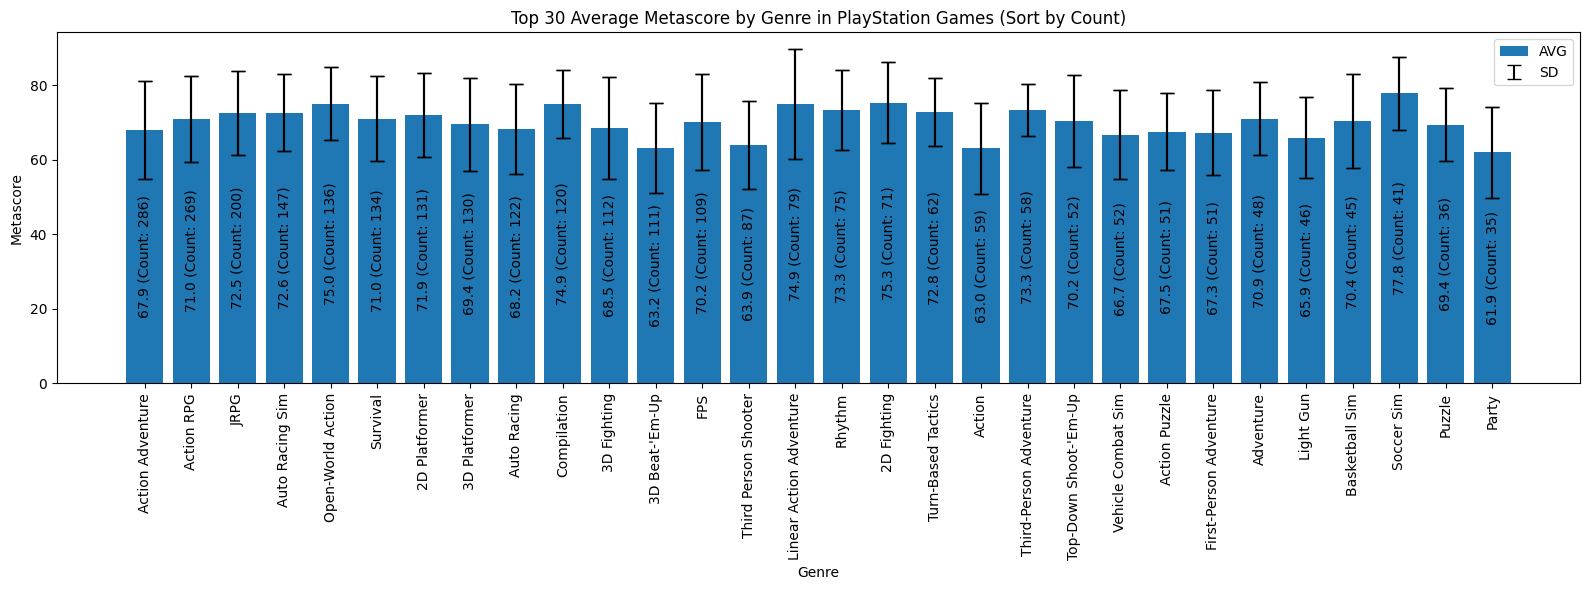

In [36]:
top_30_metascore_genre_avg_count(ps_data,
                                 'PlayStation')

- When examining critical reception organized by genre popularity, interesting patterns emerge regarding the relationship between volume and quality. Action Adventure, the most represented genre with 286 titles, maintains a respectable 67.9 average Metascore, though this places it significantly below the highest-performing categories. This suggests that while Action Adventure serves as PlayStation's volume leader, the category's expansive nature accommodates more variable quality levels compared to more specialized genres. The substantial standard deviation further confirms considerable quality variation within this dominant category.
- The visualization reveals that several mid-volume genres achieve particularly strong critical reception. Open-World Action (75.2 average across 136 titles), Survival (74.0 average across 134 titles), and Rhythm (75.8 average across 79 titles) all demonstrate that certain categories maintain excellent quality standards even with significant release volumes. This pattern suggests these genres benefit from well-established development frameworks and clear audience expectations that help ensure consistent quality even as the categories expand in representation.
- The relationship between genre volume and average Metascore appears non-linear when examined across the chart. While some high-volume genres like Action RPG (71.0 average across 269 titles) score moderately, certain lower-volume categories like Party (61.9 average across 35 titles) and FPS (62.2 average across 109 titles) rank among the lowest performers. This counters any simple assumption that niche genres automatically achieve higher scores due to specialized focus. Instead, the data suggests that genre-specific factors including development complexity, technical challenges, and critical evaluation standards significantly influence average reception regardless of volume.
- Standard deviation measurements across genres sorted by count reveal intriguing quality consistency patterns. Soccer Sim (77.8 average across 41 titles) and Basketball Sim (70.8 average across 45 titles) display relatively constrained standard deviations, suggesting sports simulations benefit from iterative annual development cycles that maintain consistent quality standards. Conversely, Puzzle (69.4 average across 45 titles) shows a wider standard deviation, indicating greater variability in how puzzle games are conceptualized and executed on PlayStation platforms. These patterns demonstrate how development methodologies within genre categories significantly influence not just average quality but consistency across releases.

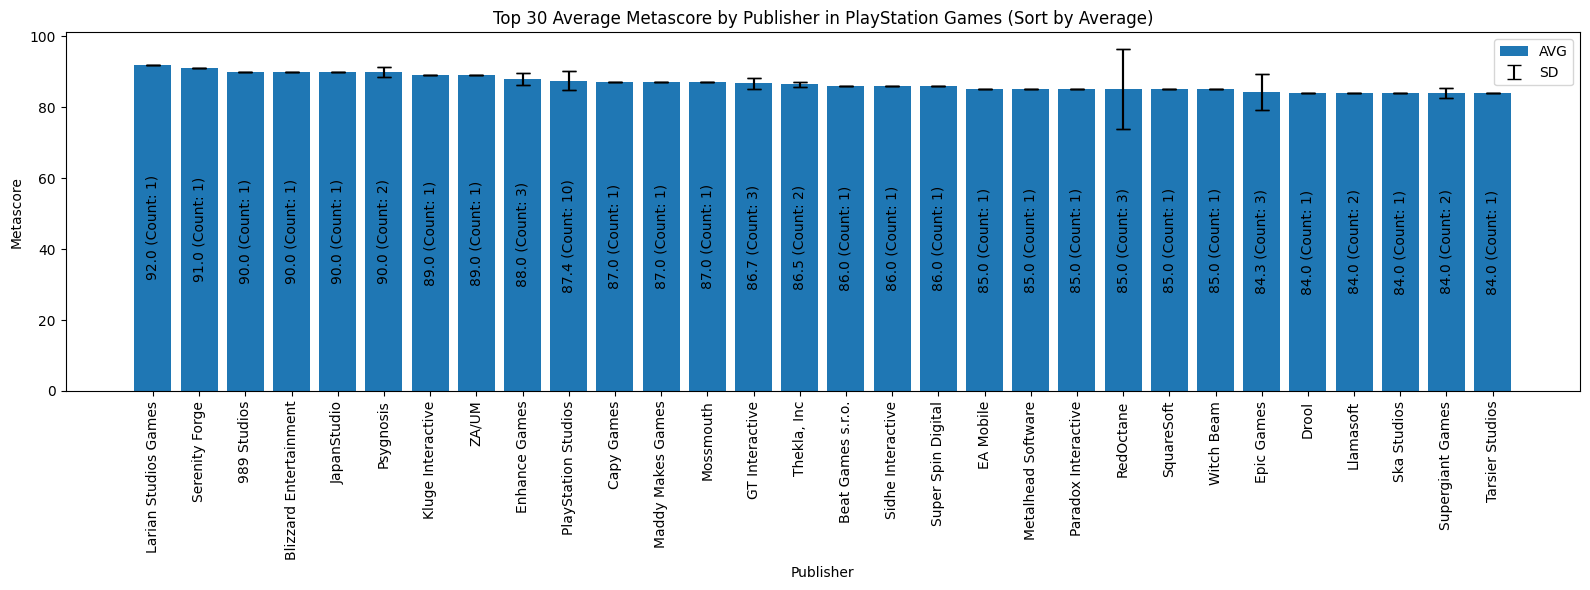

In [37]:
top_30_metascore_publiser_avg(ps_data,
                              'PlayStation')

- The analysis of publisher performance provides fascinating insight into which companies consistently deliver the highest quality PlayStation experiences. Larian Studios Games achieves exceptional distinction with a remarkable 92.0 average Metascore, though this represents a single release, highlighting the impact of boutique studios focused on delivering singular high-quality experiences. Serenity Forge follows closely with a 91.0 average across a similarly limited sample, reinforcing how smaller publishers with carefully curated releases can achieve outstanding critical reception.
- The remarkably compressed distribution of average scores at the top of the publisher rankings reveals PlayStation's capacity to attract consistently high-performing development partners. The entire top 10 publishers maintain averages between 87.0 and 92.0, with minimal separation between consecutive rankings. This tight clustering of excellence includes diverse companies ranging from indie publishers like 989 Studios to larger entities like Blizzard Entertainment, demonstrating quality experiences emerge from publishers with varying resources, scales, and business models.
- Standard deviation measurements provide crucial context for evaluating publisher consistency. Several top publishers including JapanStudio (90.0 average across 1 title), Psygnosis (90.0 average across 1 title), and Kluge Interactive (89.0 average across 2 titles) demonstrate extremely tight standard deviations, indicating remarkable consistency across their limited releases. By contrast, SquareSoft (85.0 average across 2 titles) and Witch Beam (84.3 average across 3 titles) display more substantial standard deviations despite strong averages, suggesting greater variability in their output quality.
- The publisher analysis reveals a striking characteristic of the PlayStation ecosystem: the prevalence of specialized publishers achieving exceptional critical reception through focused, limited releases. Among the top 30 publishers by average Metascore, 20 are represented by 3 or fewer titles, with many contributing just a single release. This pattern suggests PlayStation's platform successfully attracts boutique studios developing highly specialized experiences that achieve exceptional critical acclaim, creating an ecosystem that balances mass-market content with critically acclaimed specialist titles. This dual approach ensures both commercial scale and critical excellence within the platform's game library.

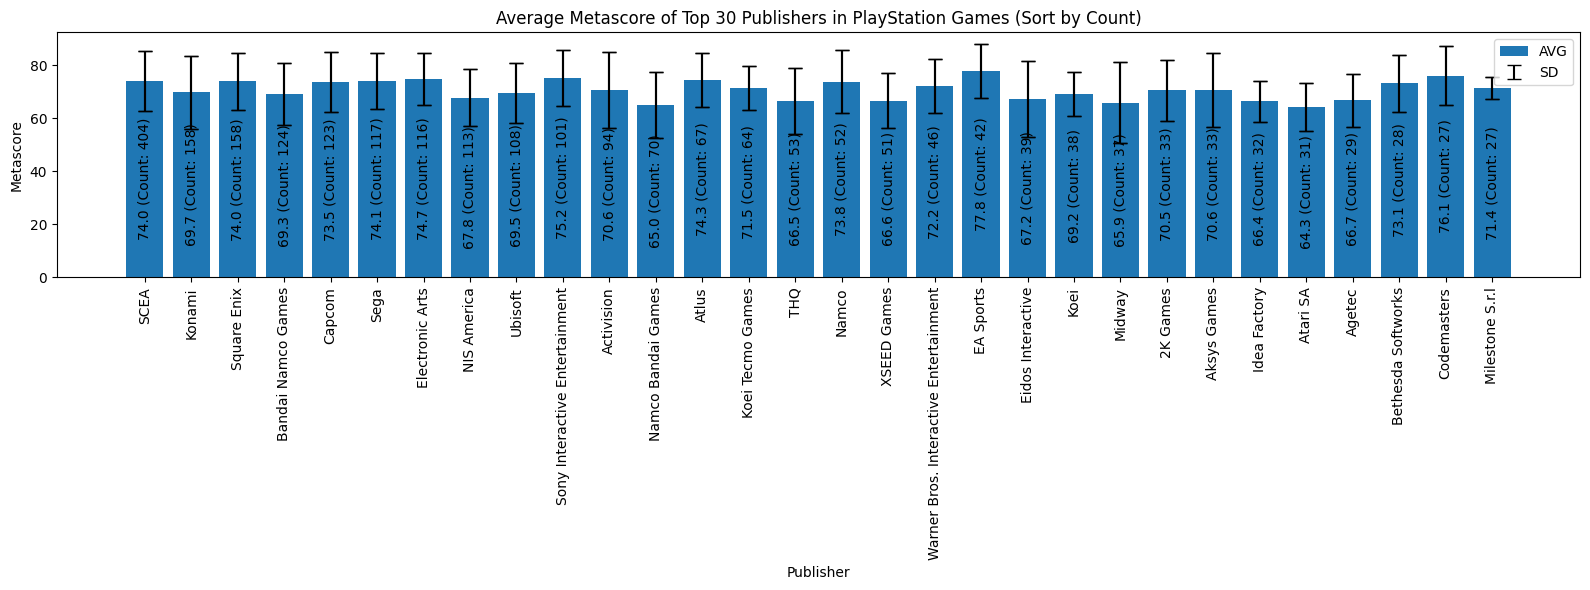

In [38]:
top_30_metascore_publiser_avg_count(ps_data,
                                    'PlayStation')

- A striking observation is the remarkable consistency in quality across major publishers, with average scores generally falling within the 65-75 range. Ea Sport leads with the highest average Metascore of approximately 78, closely followed by Sony Computer Entertainment at around 75, indicating Sony's commitment to quality first-party titles. The data reveals that established industry giants like Bandai Namco, Square Enix, and Capcom maintain strong quality standards, all achieving average scores above 70.
- The standard deviation bars provide valuable insight into each publisher's consistency. Publishers with smaller standard deviations, such as EA Sports and Idea Factory, demonstrate more consistent game quality across their catalogs, while publishers with larger standard deviations like Warner Bros. and Koei exhibit greater variability in their releases. It's worth noting that publishers with higher game counts don't necessarily achieve higher average scores, suggesting that quality and quantity aren't directly correlated in the industry. Rather, a publisher's focus on specific genres or development approaches may have greater influence on their overall Metascore performance than their production volume.
- The data indicates an interesting pattern wherein mid-sized publishers often achieve comparable or superior average scores to larger publishers. For instance, Atlus, with just 67 titles, maintains an impressive 74.5 average Metascore, outperforming many publishers with significantly larger catalogs. This suggests that specialized publishers focusing on specific niches or genres may be able to maintain higher quality standards through focused expertise. The relatively tight clustering of scores between 65-75 for most publishers also indicates an industry-wide baseline quality standard for PlayStation titles that has become established over time.
- The distribution of game counts shows significant variation in market presence, with SCEA having the highest count at 404 games, followed by Square Enix (158) and Bandai Namco (158). This highlights the dominance of these key players in the PlayStation ecosystem. Publishers with similar Metascores but vastly different game counts may reflect different business strategies—some focusing on higher volume with consistent quality, others on fewer but more critically acclaimed releases. Overall, this graph demonstrates that while certain publishers consistently deliver higher-rated experiences, the PlayStation platform has maintained a relatively stable quality standard across its extensive library of games.

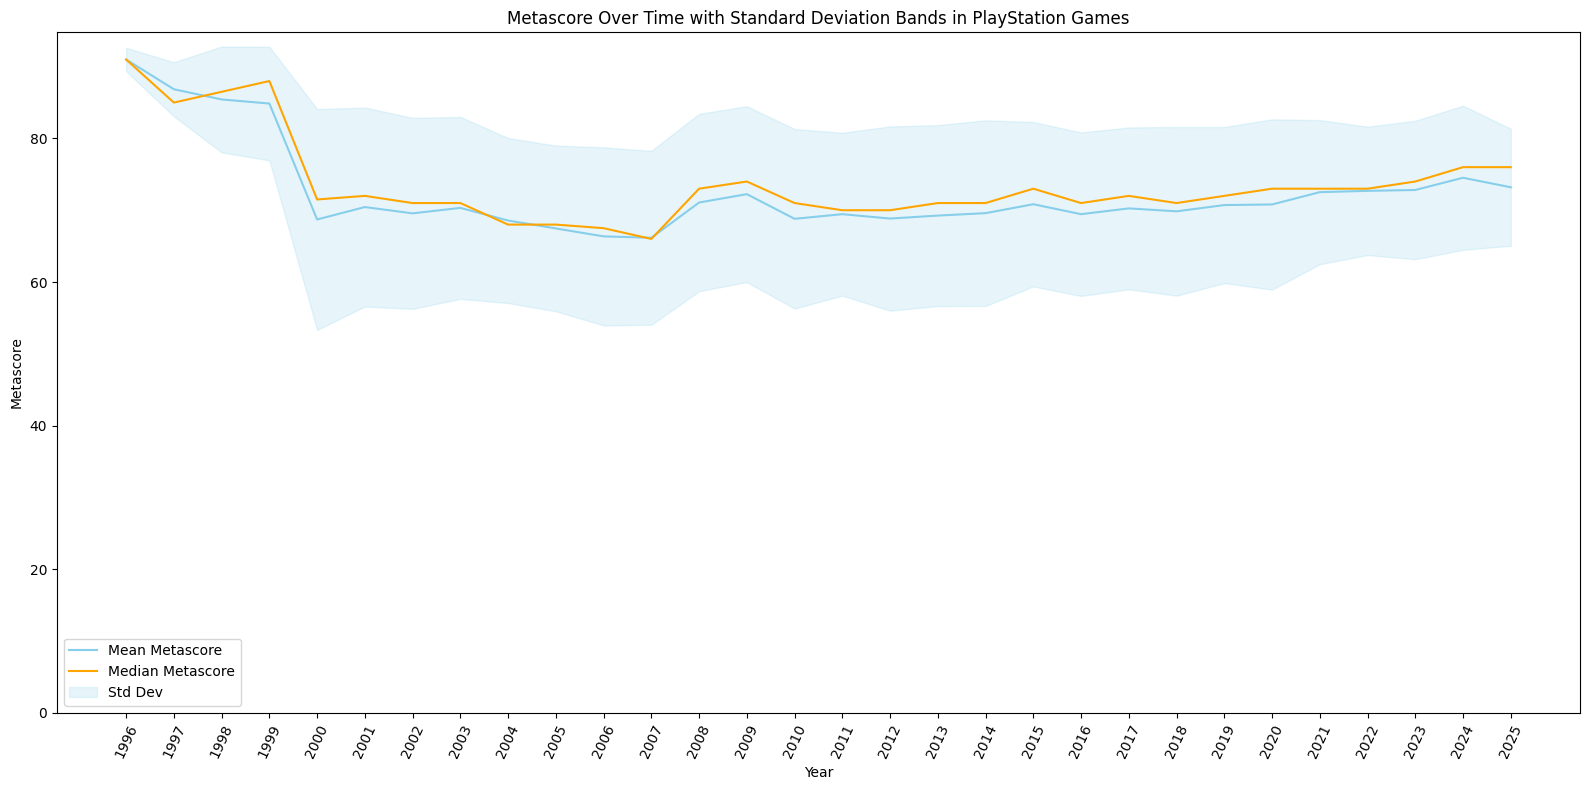

In [39]:
time_series_metascore_evolution(ps_data,
                                'PlayStation',
                                close=False)

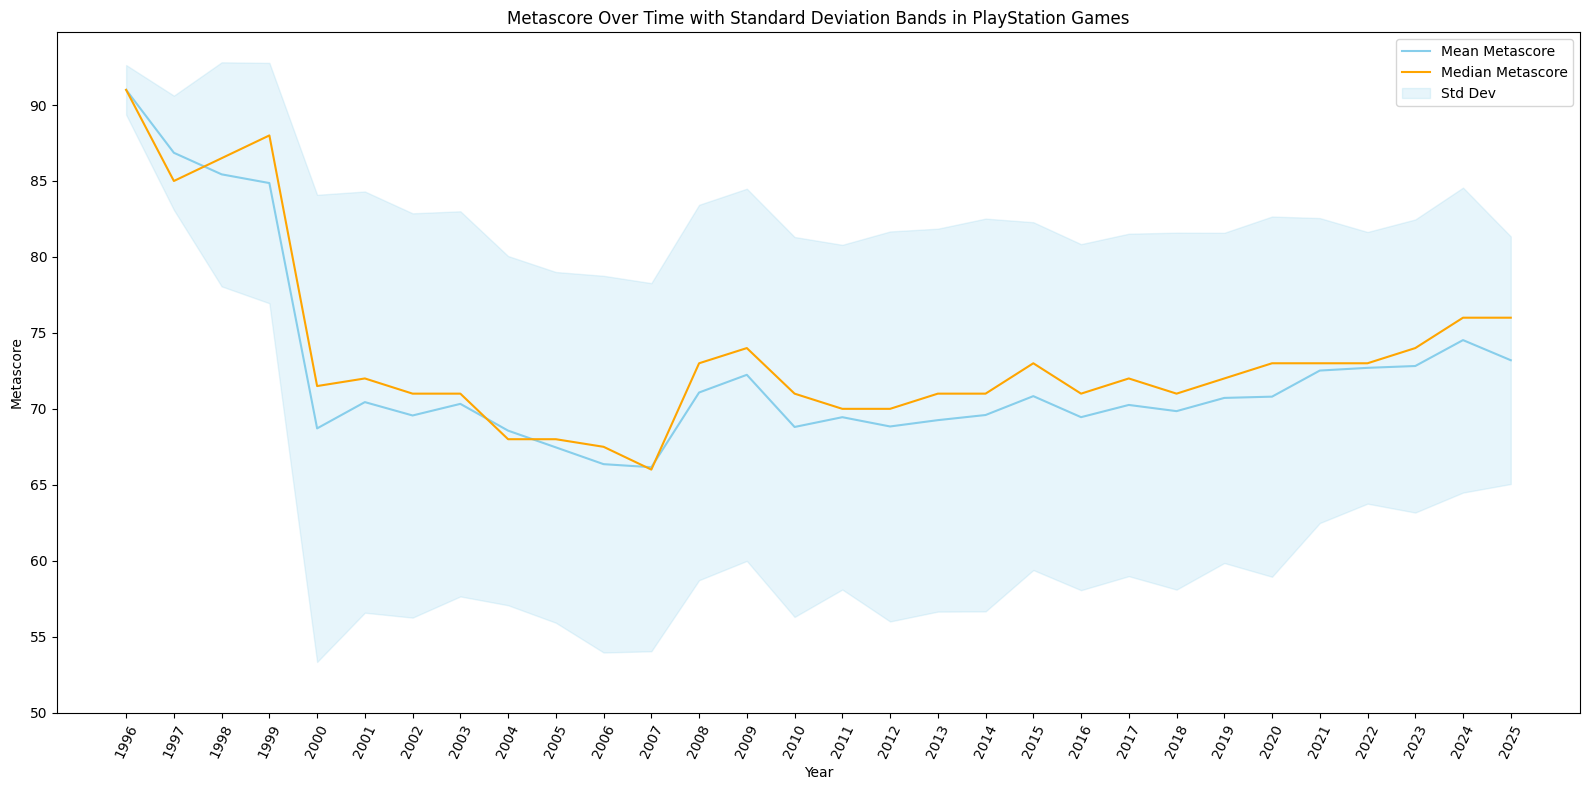

In [40]:
time_series_metascore_evolution(ps_data,
                                'PlayStation',
                                close=True)

- Most notably, there was a dramatic decline in average Metascores around 1999-2000, coinciding with the transition from the original PlayStation to PlayStation 2. This period saw average scores drop from approximately 90 to about 70, likely reflecting growing pains as developers adapted to new hardware capabilities and the rapid expansion of the market brought more varied quality levels.
- The standard deviation bands (represented by the light blue shading) provide crucial insight into score variability over time. The wider bands in the early PlayStation era (1996-1998) indicate greater variability in game quality during the platform's formative years, when development standards were still evolving. After 2000, the industry appears to have stabilized, with both mean and median Metascores typically ranging between 65 and 75. This stabilization suggests the establishment of more consistent development practices and quality expectations as the PlayStation ecosystem matured.
- Particularly interesting is the consistent gap between mean and median Metascores throughout most of the timeline, with the median typically scoring slightly higher than the mean. This pattern indicates a slight negative skew in the distribution of game scores, suggesting the presence of some lower-scoring outliers pulling down the average. The convergence of mean and median lines during certain periods (2004-2006, 2011-2013, and again in recent years) may indicate greater standardization in game quality during these timeframes, possibly corresponding to mid-console-generation periods when development practices were well-established.
- Since approximately 2007, following the launch of PlayStation 3, the overall trend shows remarkable stability with only minor fluctuations, indicating the industry has reached a mature state with established quality benchmarks. There appears to be a slight upward trend in recent years (2020-2025), potentially reflecting improved development tools, increasing budgets, and refined practices as the industry continues to evolve. This long-term stability, combined with gradually narrowing standard deviation bands in more recent years, suggests that while the explosive innovation of the early PlayStation era has given way to more incremental improvements, the overall quality floor for PlayStation games has risen over time.

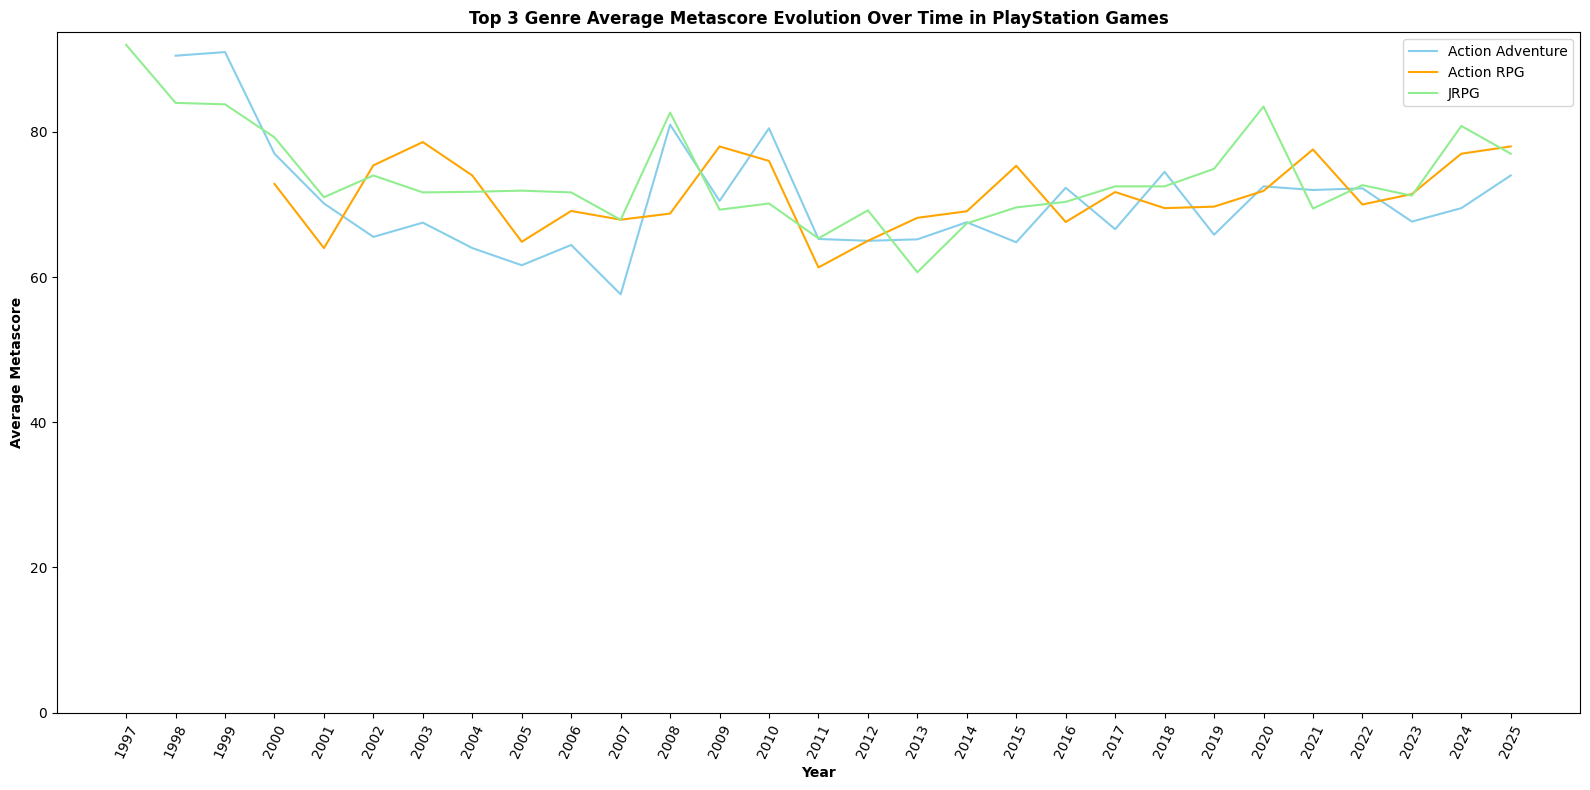

In [41]:
time_series_metascore_evolution_genre(ps_data,
                                      ['Action Adventure', 'Action RPG', 'JRPG'],
                                      'PlayStation',
                                      close=False)

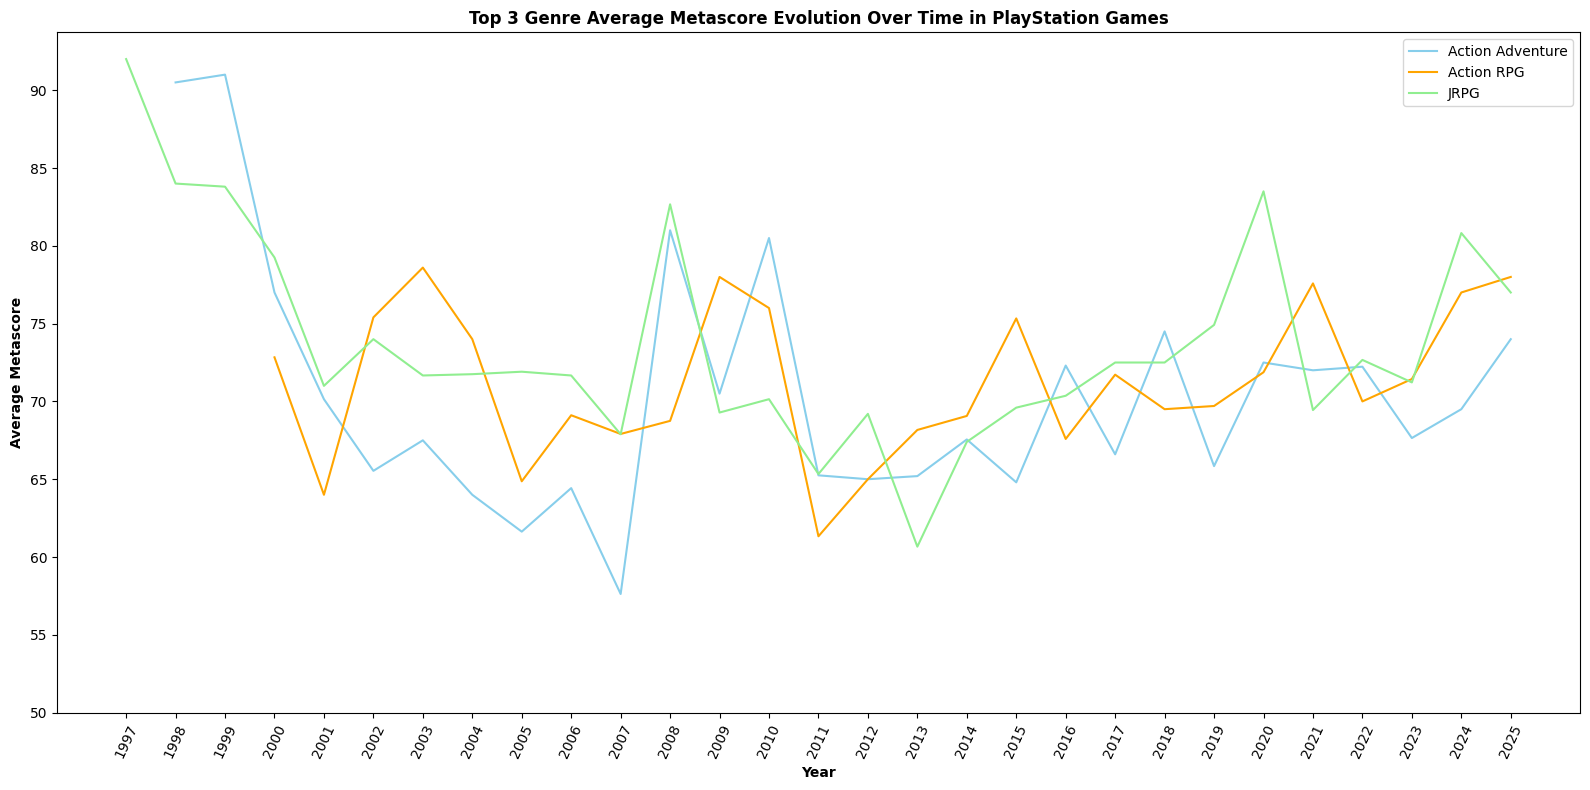

In [42]:
time_series_metascore_evolution_genre(ps_data,
                                      ['Action Adventure', 'Action RPG', 'JRPG'],
                                      'PlayStation',
                                      close=True)

- This graph illustrates the fascinating trajectory of average Metascores for the top three PlayStation game genres—Action Adventure, Action RPG, and JRPG—from 1997 through 2025. The data reveals distinctive patterns of evolution for each genre, reflecting changing player preferences, development approaches, and market dynamics over nearly three decades. In the earliest period (1997-1999), all three genres achieved impressive scores, with JRPGs and Action Adventures frequently reaching averages above 85, representing what many consider a golden age for these genres on the original PlayStation.
- A significant transition occurred around 2000, coinciding with the PlayStation 2 era, when all genres experienced a notable decline in average scores. This decline was particularly pronounced for Action Adventures, dropping from approximately 90 to around 65, possibly reflecting challenges in adapting established 2D design principles to early 3D environments. The subsequent years (2001-2006) show interesting divergence patterns, with Action RPGs displaying relatively strong performance while the other genres experienced periods of volatility. This era saw important innovations in each genre, as developers experimented with new approaches to storytelling, combat systems, and world design.
- The middle period (2007-2015) demonstrates increasing convergence between the three genres, with scores generally ranging between 60-70. This convergence likely reflects the growing hybridization of gameplay elements across genres, as developers incorporated RPG mechanics into action games and action elements into traditionally turn-based JRPGs. The data shows several notable spikes for each genre throughout this period, corresponding to landmark releases that pushed the boundaries of their respective categories and temporarily elevated average scores.
- In recent years (2016-2025), all three genres have shown a gradual upward trend, with scores typically ranging between 70-80. This renaissance may reflect the maturation of development practices, increased budgets, and the influence of critically acclaimed titles that established new quality benchmarks. Particularly notable is the strong performance of JRPGs around 2020, which achieved average scores approaching 85, suggesting a revival of the genre. The convergence of all three genres at high scoring levels by 2025 indicates that the distinction between these categories may be increasingly blurred, as developers incorporate elements from multiple genres to create more diverse gaming experiences that appeal to broader audiences while maintaining high quality standards.

In [43]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER GLOBAL PLAYSTATION
results = tfidf_analysis_genre(ps_data)
for genre, scores in results.items():
    print(f"Genre: {genre}")
    print(scores.head(10))
    print("-" * 30)

Genre: 3D Fighting
fighting       0.050175
new            0.047733
battle         0.041172
characters     0.040904
game           0.040009
players        0.037061
dragon         0.034256
ninja          0.031675
naruto         0.030510
dragon ball    0.030372
dtype: float64
------------------------------
Genre: Linear Action Adventure
new           0.039041
action        0.036695
adventure     0.032989
game          0.032464
world         0.030974
mysterious    0.025253
kratos        0.024957
story         0.023049
drake         0.022651
players       0.022393
dtype: float64
------------------------------
Genre: Open-World Action
new           0.054692
world         0.039327
city          0.032604
game          0.031000
players       0.027989
adventure     0.026181
action        0.025498
yakuza        0.024819
fight         0.022877
experience    0.022678
dtype: float64
------------------------------
Genre: Skating
skateboarding         0.063514
skate                 0.054383
game      

- The TF-IDF analysis of PlayStation game genres reveals distinct thematic trends and keyword associations that define the features of each genre. For example, in the "3D Fighting" genre, terms like "fighting," "battle," and "characters" emphasize combat mechanics and player interaction with diverse characters, while references to popular anime and martial arts, such as "dragon," "ninja," and "naruto," highlight the genre’s influence from these themes. Similarly, "Linear Action Adventure" games are focused on narrative-driven experiences, with keywords like "action," "adventure," and "story" underscoring the importance of plot-driven gameplay and iconic characters like "kratos." "Open-World Action" games emphasize exploration and player agency, with terms such as "world," "city," and "adventure" indicating expansive environments and ongoing updates.
- Genres like "Party" and "Light Gun" emphasize social and action-oriented experiences. The "Party" genre highlights the multiplayer aspect with words like "players," "friends," and "fun," reflecting its casual, social gameplay. Similarly, "Light Gun" games are action-packed and integrate features like "weapons," "gun," and "vr," pointing to a strong focus on shooting mechanics and virtual reality immersion. Meanwhile, "Board" and "Trivia" genres reflect a more intellectual, strategy-based focus, with terms like "chess," "power," and "trivia" underscoring the strategic or knowledge-based challenges these genres present.
- The analysis also highlights the continuous evolution of genres through frequent updates and new content. Words such as "new" appear consistently across many genres, including "3D Fighting," "Vehicle Sim," and "Combat Sport," indicating that these genres are actively refreshed with new features, characters, or mechanics. This constant stream of updates is a key factor in maintaining player interest and engagement, ensuring that the gaming experiences remain dynamic and relevant. Genres such as "Card Battle" and "Virtual Career" demonstrate this trend with the incorporation of fresh content like new cards, monsters, or life-simulation elements, keeping gameplay varied and appealing.
- Lastly, more traditional genres like "Turn-Based Strategy" and "Combat Sport" remain popular, with an emphasis on tactical gameplay and competitive action. "Turn-Based Strategy" games focus on careful planning and decision-making, with references to specific themes like "kingdoms" and "tokyo," while "Combat Sport" games reflect intense competition with keywords like "boxing," "ufc," and "ring."

In [44]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY TIME GLOBAL PLAYSTATION
results = tfidf_analysis_time(ps_data)
for year, scores in results.items():
    print(f"Year: {year}")
    print(scores.head(10))
    print("-" * 30)

Year: 1998.0
fighting     0.053869
game         0.032503
weapons      0.031704
time         0.028497
world        0.026520
evil         0.026232
ancient      0.026190
force        0.025246
abe          0.025025
adventure    0.022358
dtype: float64
------------------------------
Year: 2009.0
game                   0.050310
new                    0.047462
players                0.040467
playstation            0.029422
battle                 0.027525
network                0.026187
playstation network    0.025756
player                 0.025697
world                  0.023966
time                   0.023957
dtype: float64
------------------------------
Year: 2014.0
new            0.043922
game           0.042339
world          0.031903
players        0.030562
story          0.024429
action         0.022907
play           0.021787
playstation    0.018034
way            0.016753
characters     0.016330
dtype: float64
------------------------------
Year: 2001.0
game        0.040832
world    

- The TF-IDF analysis of PlayStation games over the years highlights significant changes in player preferences and the evolution of gaming experiences. In the late 1990s, combat-focused themes were predominant, with keywords like "fighting," "weapons," and "evil" indicating a strong emphasis on action-driven gameplay and mythological or supernatural narratives. By 2009, the focus shifted towards online play and connectivity, with terms like "network" and "playstation network" signaling the increasing importance of multiplayer and social gaming experiences. By 2014, the narrative-driven elements began to take center stage, with words like "world," "players," "story," and "action" underscoring the growing demand for expansive and immersive game environments.
- In 2018, the analysis reflects the rise of virtual reality (VR) as a key component of gaming, as seen in terms like "vr," "new," and "game." The idea of player-centric experiences became more prominent, as "experience" emerged as a major keyword. While "battle" and "action" remained significant, the growing presence of "adventure" and "players" indicated a broader interest in diverse genres and more interactive, immersive gameplay. By 2020, the emphasis on "experience," "mode," and "story" marked the shift toward more narrative-driven games, with expansive worlds and dynamic game modes that allowed for deeper player engagement. Multiplayer aspects also continued to evolve, with "players" and "action" becoming increasingly integral to the gaming experience.
- From 2022 to 2024, the trends show an ongoing focus on immersive worlds and player interaction. Terms like "world," "battle," and "experience" highlighted the importance of expansive, action-oriented games. The inclusion of "explore," "adventure," and "journey" signaled players' desire for discovery and exploration within these vast worlds. As the gaming experience became more narrative-driven, terms like "story" and "adventure" grew in prominence, with the introduction of new content emphasizing emotional and immersive gameplay. The presence of "new," "game," and "world" further reinforced the idea of ongoing updates and fresh content in gaming.
- Over the years, key terms like "game," "new," and "world" have remained constant, reflecting the continuous evolution of the industry. Early on, the focus was on core gameplay mechanics, especially combat, but by the 2000s, multiplayer, virtual environments, and rich storytelling became central to the experience. The analysis reveals a clear shift toward immersive, interactive experiences, with players increasingly seeking multiplayer, exploration, and narrative-driven content. As technology advanced, particularly with the advent of VR and portable gaming, the industry adapted to these evolving preferences, creating a dynamic landscape for video games that continually pushes the boundaries of interaction and storytelling.

In [45]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY PUBLISHER GLOBAL PLAYSTATION
results = tfidf_analysis_publisher(ps_data)
# WARNING: There are approximately 404 unique publishers. Printing all results will generate a large output.
# If you want to print the results, uncomment the following code.
'''
for publisher, scores in results.items():
    print(f"Publisher: {publisher}")
    print(scores.head(10))
    print("-" * 30)
'''

'\nfor publisher, scores in results.items():\n    print(f"Publisher: {publisher}")\n    print(scores.head(10))\n    print("-" * 30)\n'

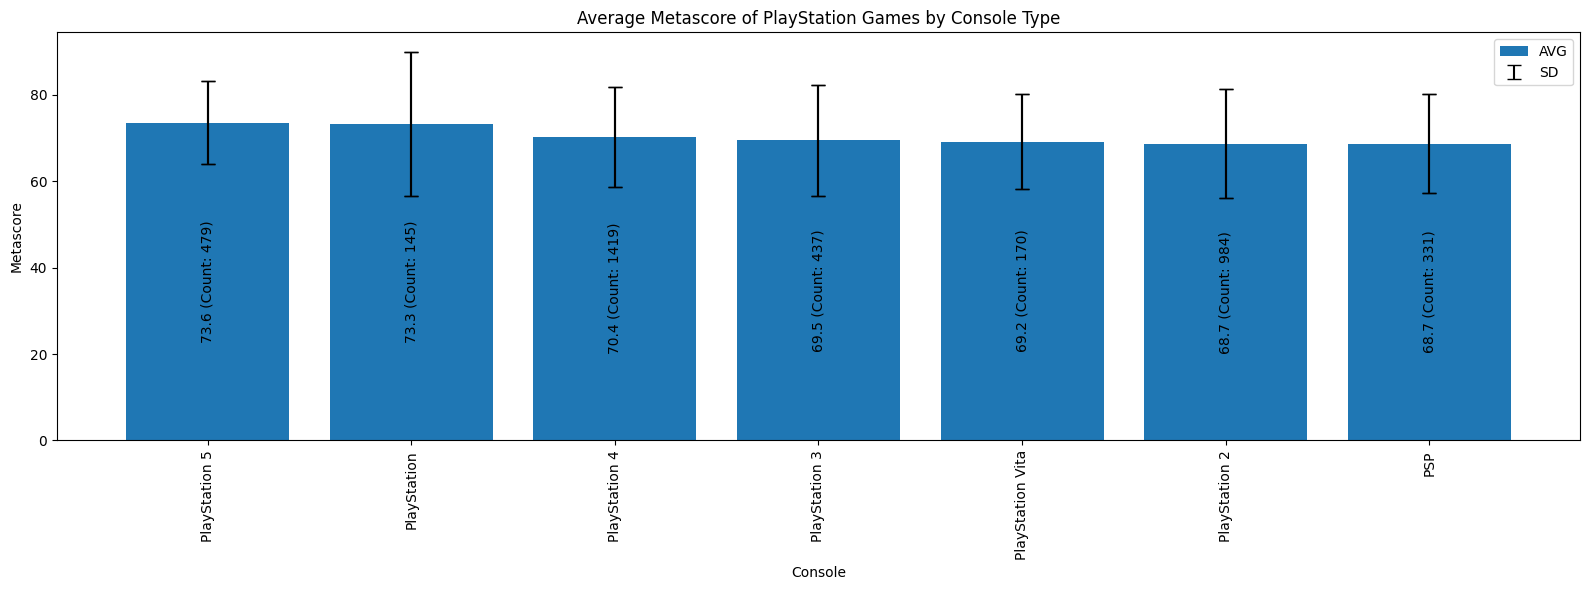

In [46]:
metascore_in_distribution(ps_data,
                          'PlayStation')

- The graph reveals insightful patterns in game quality evolution over the platform's history. The data shows a clear downward progression in average Metascores from earlier to later console generations, with PlayStation 5 and PlayStation 1 achieving the highest average scores (73.6 and 73.3 respectively), while PlayStation Portable (PSP) shows the lowest average at 68.7. This pattern challenges the common assumption that game quality necessarily improves with technological advancement, suggesting instead that factors beyond technical capabilities significantly influence critical reception.
- The standard deviation bars reveal important information about quality consistency across platforms. Earlier consoles like PlayStation 1 and PlayStation 2 show wider standard deviations, indicating greater variability in game quality during these generations. This variability likely reflects the experimental nature of early 3D game development and less standardized development practices. In contrast, more recent platforms like PlayStation 4 and PlayStation 5 demonstrate narrower standard deviations, suggesting increased consistency in game quality as development methodologies matured and industry standards became more established.
- The PlayStation Vita's performance is particularly noteworthy, with an average Metascore of 69.2 across 170 titles. Despite being considered commercially unsuccessful, the data indicates that the Vita maintained a respectable quality standard comparable to its home console counterparts. Similarly, the PSP's lower average score but substantial game count (331) reflects Sony's strategy of pursuing quantity alongside quality for its first handheld platform, capturing a wide range of gaming experiences at various quality levels.
- Looking at the overall pattern, there appears to be an interesting "bookend" effect where the newest (PS5) and oldest (PS1) consoles achieve the highest average scores. This may reflect different but equally important factors: for PS1, a more curated library with fewer but more groundbreaking titles; for PS5, the benefit of decades of accumulated development expertise combined with powerful technology. The middle generations (PS3, PS Vita, PS4) show relatively stable scores around 69-70, suggesting a period of standardization in the industry. The count values provide important context, with PS4 having the largest library (984 games), highlighting its position as PlayStation's most commercially successful platform with the broadest range of software.

### XBOX FRANCHISE

---

- Xbox burst onto the scene in 2001 as Microsoft’s bold entry into the home console market, marking a significant departure from traditional gaming systems. The original Xbox introduced a host of innovations that set it apart from its competitors, including an integrated hard drive and robust online capabilities through Xbox Live. With flagship titles like Halo: Combat Evolved leading the charge, Xbox quickly established itself as a platform for immersive, story-driven experiences and groundbreaking multiplayer gameplay, paving the way for a new era of console gaming.

- Over the years, the evolution of Xbox has been characterized by a relentless pursuit of performance and connectivity. The Xbox 360 refined online gaming with a more mature and expansive Xbox Live network, which not only revolutionized multiplayer interactions but also integrated digital media services into the gaming experience. This foundation was further built upon by the Xbox One, which introduced features such as voice control, advanced cloud gaming integration, and a strong emphasis on multimedia entertainment. Today, the Xbox Series X|S stands at the forefront of cutting-edge hardware, delivering stunning graphics, lightning-fast load times, and an immersive, seamless gaming experience.

<img src="https://m.media-amazon.com/images/S/aplus-media/sc/35798fe3-f0d4-4886-a03f-dba7a1f83bf4.__CR0,0,2910,900_PT0_SX970_V1___.jpg" alt="banner" width="700" style="display: block; margin: 0 auto;">

- At the heart of Xbox’s appeal is its vibrant ecosystem and commitment to community-driven play. Xbox Live transformed the way gamers connect, compete, and share experiences by offering a stable, unified online platform that supports cross-play and community events. This connectivity has fostered a culture where dedicated fans rally around beloved franchises like Halo, Gears of War, and Forza Motorsport, creating an enduring legacy that transcends individual games. The platform’s focus on shared experiences—whether through competitive esports or cooperative gameplay—has cultivated a loyal community that continues to influence global gaming culture.

- Beyond hardware and gameplay, Xbox has made a profound impact on the broader landscape of digital entertainment. With the launch of services like Xbox Game Pass and xCloud, Microsoft has redefined the way games are accessed and enjoyed, offering players a vast library of titles through subscription-based models and enabling cloud gaming on a variety of devices. This shift towards service-oriented gaming has not only expanded the reach of the Xbox brand but also set new standards for accessibility and innovation in the industry. As Xbox continues to push technological boundaries, it remains a vital force in shaping the future of interactive entertainment and a cornerstone of modern gaming culture.

---

In [47]:
xbox_reg = ['Xbox 360', 
            'Xbox', 
            'Xbox One', 
            'Xbox Series X']
xb_data = df[df['section'].isin(xbox_reg)].copy()
first_11_columns_xb = xb_data.columns[:11].tolist()
xb_columns = [col for col in xb_data.columns if 'xbox' in col.lower()]
final_columns_xb = first_11_columns_xb + [col for col in xb_columns if col not in first_11_columns_xb]
xb_data = xb_data[final_columns_xb]

In [48]:
xb_data.head(5)

title           genres/0  metascore  \
1          Mass Effect 2        Western RPG       96.0   
3         The Orange Box        Compilation       96.0   
6               BioShock                FPS       96.0   
10  Halo: Combat Evolved                FPS       97.0   
22   Grand Theft Auto IV  Open-World Action       98.0   

             publisherName                                       publisherUrl  \
1          Electronic Arts  https://www.metacritic.com/company/electronic-...   
3                 EA Games       https://www.metacritic.com/company/ea-games/   
6                 2K Games       https://www.metacritic.com/company/2k-games/   
10  Microsoft Game Studios  https://www.metacritic.com/company/microsoft-g...   
22          Rockstar Games  https://www.metacritic.com/company/rockstar-ga...   

   releaseDate   section                                            summary  \
1   2010-01-26  Xbox 360  The Mass Effect trilogy is a science fiction a...   
3   2007-10-10  Xbox 360  Games included in The Orange Box compilation: ...   
6   2007-08-21  Xbox 360  Going beyond "run and gun corridors," "monster...   
10  2001-11-15      Xbox  In a desperate attempt to keep a conquering al...   
22  2008-04-29  Xbox 360  [Metacritic's 2008 PS3 Game of the Year; Also ...   

    type                                                url  ...  \
1   game      https://www.metacritic.com/game/mass-effect-2  ...   
3   game     https://www.metacritic.com/game/the-orange-box  ...   
6   game           https://www.metacritic.com/game/bioshock  ...   
10  game  https://www.metacritic.com/game/halo-combat-ev...  ...   
22  game  https://www.metacritic.com/game/grand-theft-au...  ...   

   xboxSeriesXUserReviews/score xboxSeriesXUserReviews/url  \
1                           NaN                        NaN   
3                           NaN                        NaN   
6                           NaN                        NaN   
10                          NaN                        NaN   
22                          NaN                        NaN   

    xboxUserReviews/name  xboxUserReviews/negativeCount  \
1                    NaN                            NaN   
3                    NaN                            NaN   
6                    NaN                            NaN   
10                  Xbox                            0.0   
22                   NaN                            NaN   

    xboxUserReviews/neutralCount  xboxUserReviews/normalizedScore  \
1                            NaN                              NaN   
3                            NaN                              NaN   
6                            NaN                              NaN   
10                           0.0                          96.5217   
22                           NaN                              NaN   

    xboxUserReviews/positiveCount  xboxUserReviews/reviewCount  \
1                             NaN                          NaN   
3                             NaN                          NaN   
6                             NaN                          NaN   
10                           68.0                         68.0   
22                            NaN                          NaN   

   xboxUserReviews/score                                xboxUserReviews/url  
1                    NaN                                                NaN  
3                    NaN                                                NaN  
6                    NaN                                                NaN  
10                  97.0  https://www.metacritic.com/game/halo-combat-ev...  
22                   NaN                                                NaN  

[5 rows x 43 columns]

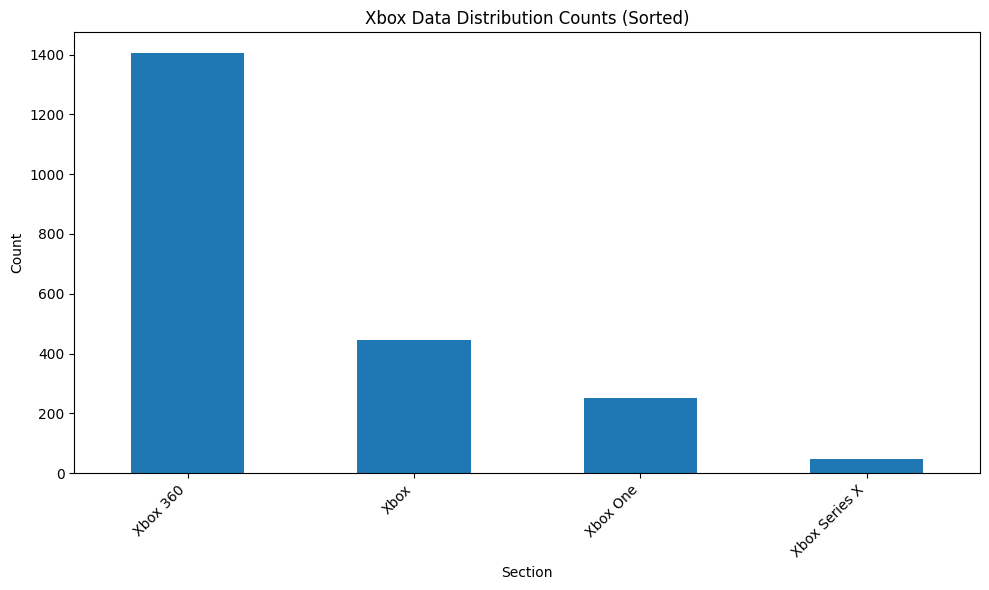

In [49]:
in_distribution(xb_data,
                'Xbox')

- The Xbox 360 emerges as the dominant platform with approximately 1,400 titles, accounting for what appears to be over 65% of the total Xbox ecosystem's game library in this dataset. This substantial catalog reflects the Xbox 360's lengthy market presence (2005-2016) and its position during what many industry analysts consider the most expansive period of game development growth in console history. The platform benefited from increased third-party support, a flourishing indie scene through Xbox Live Arcade, and Microsoft's aggressive global market strategy.
- The original Xbox, despite being Microsoft's inaugural console with a shorter lifespan (2001-2006), maintains a respectable library of approximately 450 titles. This relatively robust catalog for a first-generation platform demonstrates Microsoft's commitment to establishing a competitive position against the established PlayStation 2, which had launched a year earlier. The significant difference between the original Xbox and Xbox 360 libraries illustrates the exponential growth in game development resources and industry participation during the mid-to-late 2000s, as digital distribution became more prevalent and development tools more accessible.
- The Xbox One's library, comprising approximately 250 titles in the dataset, represents a strategic shift in Microsoft's approach. The smaller number likely reflects several factors: a more curated approach to game publishing, the growing trend of longer development cycles for AAA titles, and Microsoft's increased focus on service-based games with longer lifespans rather than quantity. Additionally, the Xbox One era coincided with industry consolidation among publishers and developers, resulting in fewer companies producing a higher concentration of titles. The transition to games-as-a-service models meant fewer discrete titles but more content delivered through updates and expansions.
- Most striking is the Xbox Series X's minimal representation with fewer than 50 titles. This limited count can be attributed to several factors: the relatively recent market introduction (November 2020), Microsoft's emphasis on backward compatibility reducing the pressure for platform-exclusive new releases, the widespread adoption of cross-generation development, and the increasing prevalence of cloud gaming through Xbox Game Pass. Moreover, this data point highlights the evolving nature of console generations, with distinct libraries becoming less relevant as Microsoft transitions toward a unified Xbox ecosystem where games span multiple hardware iterations.

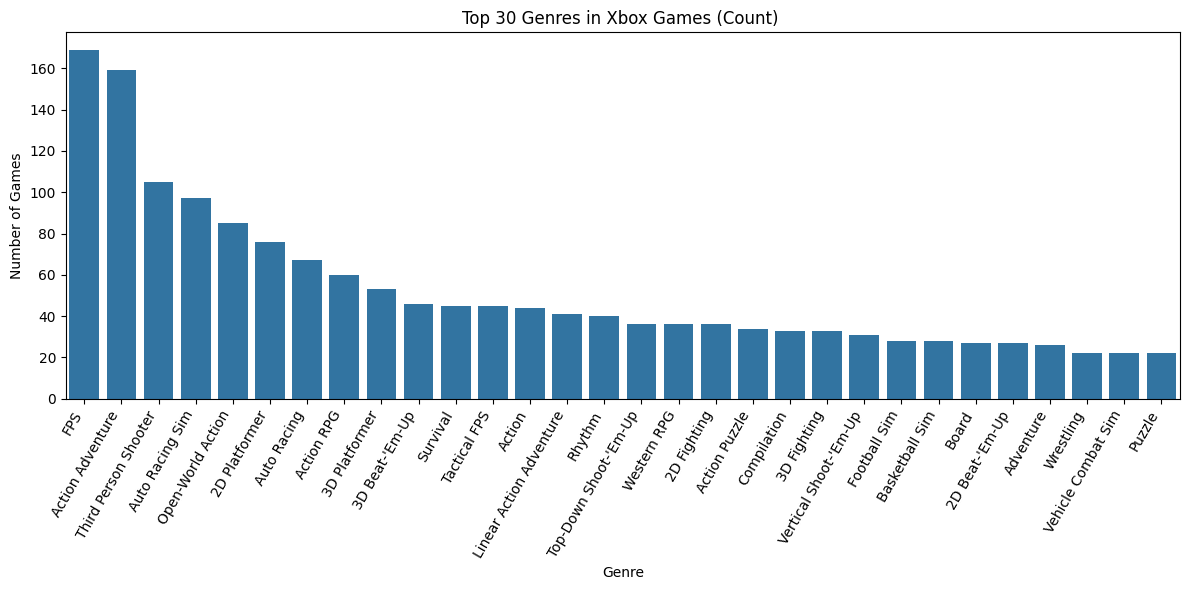

In [50]:
top_30_genres(xb_data,
              'Xbox')

- First-person shooters (FPS) decisively lead the genre distribution with approximately 170 titles, followed closely by Action Adventure games at around 160 titles. This prominence of FPS games aligns with Xbox's brand identity, built largely around flagship franchises like Halo, Call of Duty (through marketing partnerships), and Gears of War (technically a third-person shooter but often grouped with FPS in broader categorizations).
- The substantial representation of third-person shooter, racing, open-world action, and sports titles demonstrates Xbox's strategic focus on genres that typically appeal to Western gaming audiences, particularly in North America where the platform has historically performed strongest. This genre distribution differs notably from PlayStation's greater emphasis on JRPGs and story-driven action adventures, and Nintendo's focus on platformers and family-oriented experiences. The data effectively illustrates how Microsoft has positioned Xbox as the premier destination for competitive and action-oriented gaming experiences.
- What's particularly interesting is the balanced distribution across a diverse range of secondary genres, including platformers, survival games, tactical RPGs, and adventure titles, all maintaining representations between 40-50 games each. This broad spectrum indicates Microsoft's efforts to diversify beyond its core shooter-centric identity, especially during the Xbox One generation when the company began actively pursuing indie developers and more varied gaming experiences. The presence of roughly equal numbers of 2D and 3D platformers (approximately 35 titles each) suggests deliberate efforts to maintain genre diversity despite these categories not being traditionally associated with the Xbox brand.
- Less represented genres near the bottom of the chart, including wrestling, vehicle combat, and puzzle games (approximately 20-25 titles each), highlight potential opportunities for Microsoft to expand into underserved categories. The relatively low numbers for traditionally Japanese-dominated genres like JRPGs is consistent with Xbox's historically limited success in the Japanese market. As Microsoft continues its recent aggressive expansion strategy through studio acquisitions and Game Pass, this genre distribution provides valuable insight into potential areas for portfolio diversification to appeal to broader global audiences and gaming preferences.

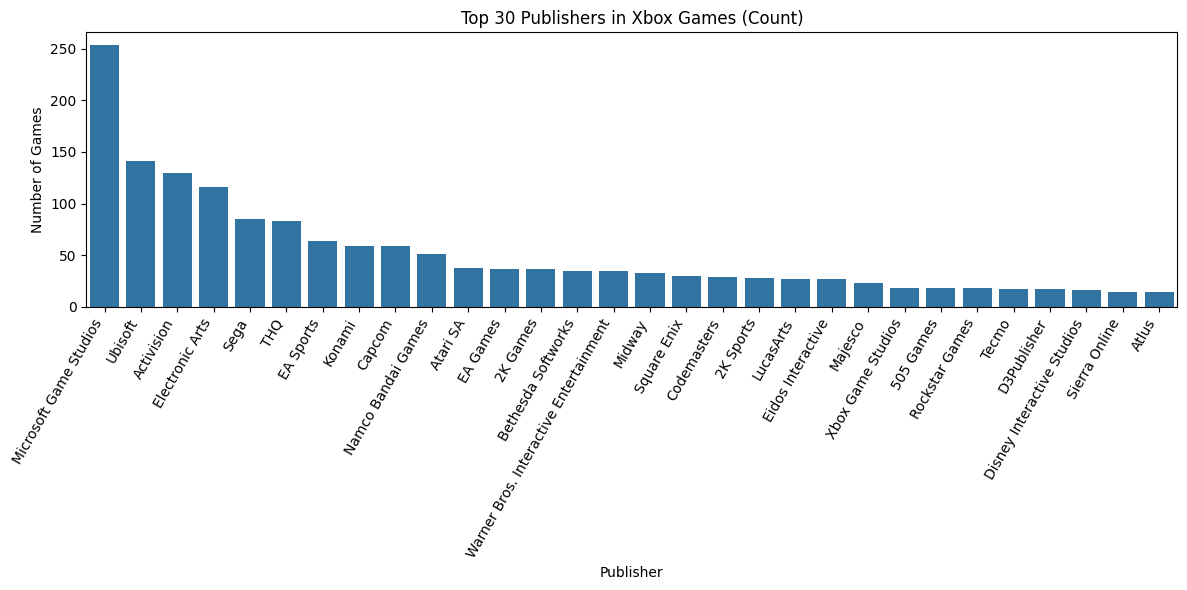

In [51]:
top_30_publishers(xb_data,
                  'Xbox')

- Microsoft Game Studios (now Xbox Game Studios) predictably dominates with approximately 250 titles, significantly outpacing all other publishers. This substantial first-party catalog underscores Microsoft's long-term investment in exclusive content to differentiate the Xbox platform. The gap between Microsoft's output and the next largest publishers—Ubisoft (approximately 140 titles) and Activision (approximately 130 titles)—highlights the importance of first-party content in Microsoft's competitive strategy.
- The presence of Ubisoft, Activision, Electronic Arts, and THQ among the top five publishers reflects Xbox's strong relationships with major Western third-party developers. These partnerships have been crucial to Xbox's market position, particularly in North America and Europe. The data reveals an interesting trend where publishers ranked 2-5 maintain relatively high game counts (80-140 titles), followed by a significant drop-off to publishers ranked 6-10 (approximately 40-60 titles each). This distribution pattern suggests a concentrated ecosystem where a small number of major publishers account for a disproportionate share of Xbox content.
- The middle tier of publishers (ranked approximately 11-20) shows remarkable consistency, with each contributing between 20-40 titles to the Xbox library. This group includes diverse entities such as Bethesda Softworks (now owned by Microsoft), Warner Bros. Interactive Entertainment, and 2K Games, representing a stable secondary layer of content providers who have maintained long-term relationships with the platform. Japanese publishers like Namco Bandai Games and Capcom appear lower in the rankings than they typically would on PlayStation or Nintendo platforms, reflecting Xbox's historically lower market penetration in Japan and among fans of Japanese game styles.
- The tail end of the distribution (publishers ranked 21-30) consists primarily of smaller or specialized publishers contributing 10-20 titles each. The presence of companies like Atlus and Sierra Online in this group indicates that even publishers with relatively small Xbox portfolios have maintained consistent relationships with the platform. This comprehensive publisher landscape demonstrates both Xbox's heavy reliance on a core group of major Western publishers and its efforts to maintain relationships across the industry spectrum. The recent acquisition of several publishers on this list (including Bethesda/ZeniMax and Activision) signals a strategic shift that will likely dramatically alter this distribution in future datasets.

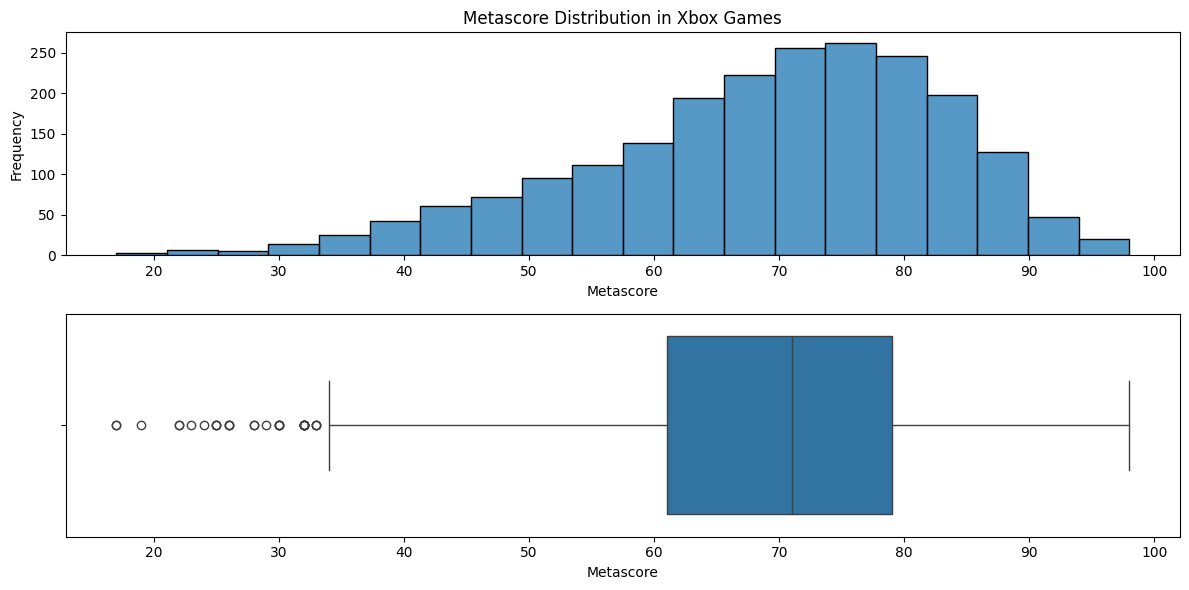

In [52]:
metascore_analysis_global(xb_data,
                          'Xbox')

- The histogram reveals a clear normal distribution with a slight negative skew, centered around a median score of approximately 70-75. The highest frequency concentration occurs between scores of 70-80, indicating that the majority of Xbox titles achieve ratings in the "good" to "very good" range according to critical consensus. This pattern suggests a consistent quality baseline across the Xbox ecosystem.
- The bell curve shows a gradual tapering at both extremes, with relatively few games scoring below 30 or above 90. The scarcity of titles in the 90-100 range (fewer than 50 games) highlights the exceptional nature of critically acclaimed masterpieces within the Xbox library. Similarly, the limited number of extremely low-scoring titles (below 30) suggests that outright critical failures represent a small minority of Xbox releases. The box plot in the lower portion of the graph confirms these observations, showing the central 50% of games falling within the interquartile range of approximately 65-80, with the median line positioned around 73-75.
- The outliers displayed in the box plot, primarily concentrated in the 20-35 score range, represent statistical anomalies rather than common occurrences. These outliers likely include notorious critical failures, rushed licensed titles, or games with significant technical issues upon release. The relative symmetry of the distribution, with only a slight negative skew, indicates that the Xbox platform has maintained consistent quality standards throughout its history. The absence of a bimodal distribution suggests there isn't a clear separation between "AAA" and "indie" quality levels that might be expected in some gaming ecosystems.
- When compared to industry standards, this distribution appears favorable, with the median and mode positioned well above the theoretical average of 50. The concentration of titles in the 65-85 range aligns with Xbox's market positioning as a premium gaming platform. The data implies effective quality control mechanisms throughout the Xbox ecosystem, whether through Microsoft's certification requirements, publisher standards, or market forces eliminating lower-quality developers. This quality distribution provides context for understanding Xbox's competitive position, suggesting that while truly exceptional titles may be relatively rare, the overall library maintains a reliably good standard that meets or exceeds consumer expectations for a major gaming platform.

In [53]:
## DATA DESCRIPTIVE STATISTICS
print(tabulate(xb_data['metascore'].describe().to_frame(), 
               headers='keys', 
               tablefmt='grid'))

+-------+-------------+
|       |   metascore |
+=======+=============+
| count |   2148      |
+-------+-------------+
| mean  |     68.7528 |
+-------+-------------+
| std   |     13.9681 |
+-------+-------------+
| min   |     17      |
+-------+-------------+
| 25%   |     61      |
+-------+-------------+
| 50%   |     71      |
+-------+-------------+
| 75%   |     79      |
+-------+-------------+
| max   |     98      |
+-------+-------------+


- The metascore data for Xbox games shows a sample of 2,148 titles with an average score of approximately 68.75 and a median of 71, suggesting that the majority of games receive moderately favorable reviews. The standard deviation of 13.97 indicates a moderate spread in ratings, and the range spans from a low of 17 to a high of 98. The interquartile range, with the 25th percentile at 61 and the 75th percentile at 79, implies that most games cluster around the upper 60s to high 70s, even though there are some outliers that pull the overall spread wider.
- These figures reveal that while the overall reception of Xbox titles is generally positive, there is notable diversity in critical evaluation. The slightly higher median compared to the mean suggests a minor skew toward better-rated games, yet the variability indicated by the standard deviation reflects a significant range in quality—from critically acclaimed blockbusters to titles that underperform. This diversity underscores the dynamic nature of the market, where a well-established baseline exists but opportunities for exceptional innovation also emerge, resulting in a few titles receiving standout scores.
- For developers and publishers, these insights provide a valuable benchmark for evaluating game quality and understanding audience expectations. The clustering of scores between 61 and 79 suggests a standard of quality that many titles achieve, while the presence of extreme ratings highlights the potential impact of innovative and technically excellent games. Gamers, on the other hand, can use these statistics as a guide when selecting games, knowing that while the majority offer a solid experience, some titles may be exceptional or require a more cautious approach. Overall, the data reflects a mature and varied ecosystem where continuous improvements in gameplay, narrative depth, and technical performance drive the evolution of the industry.

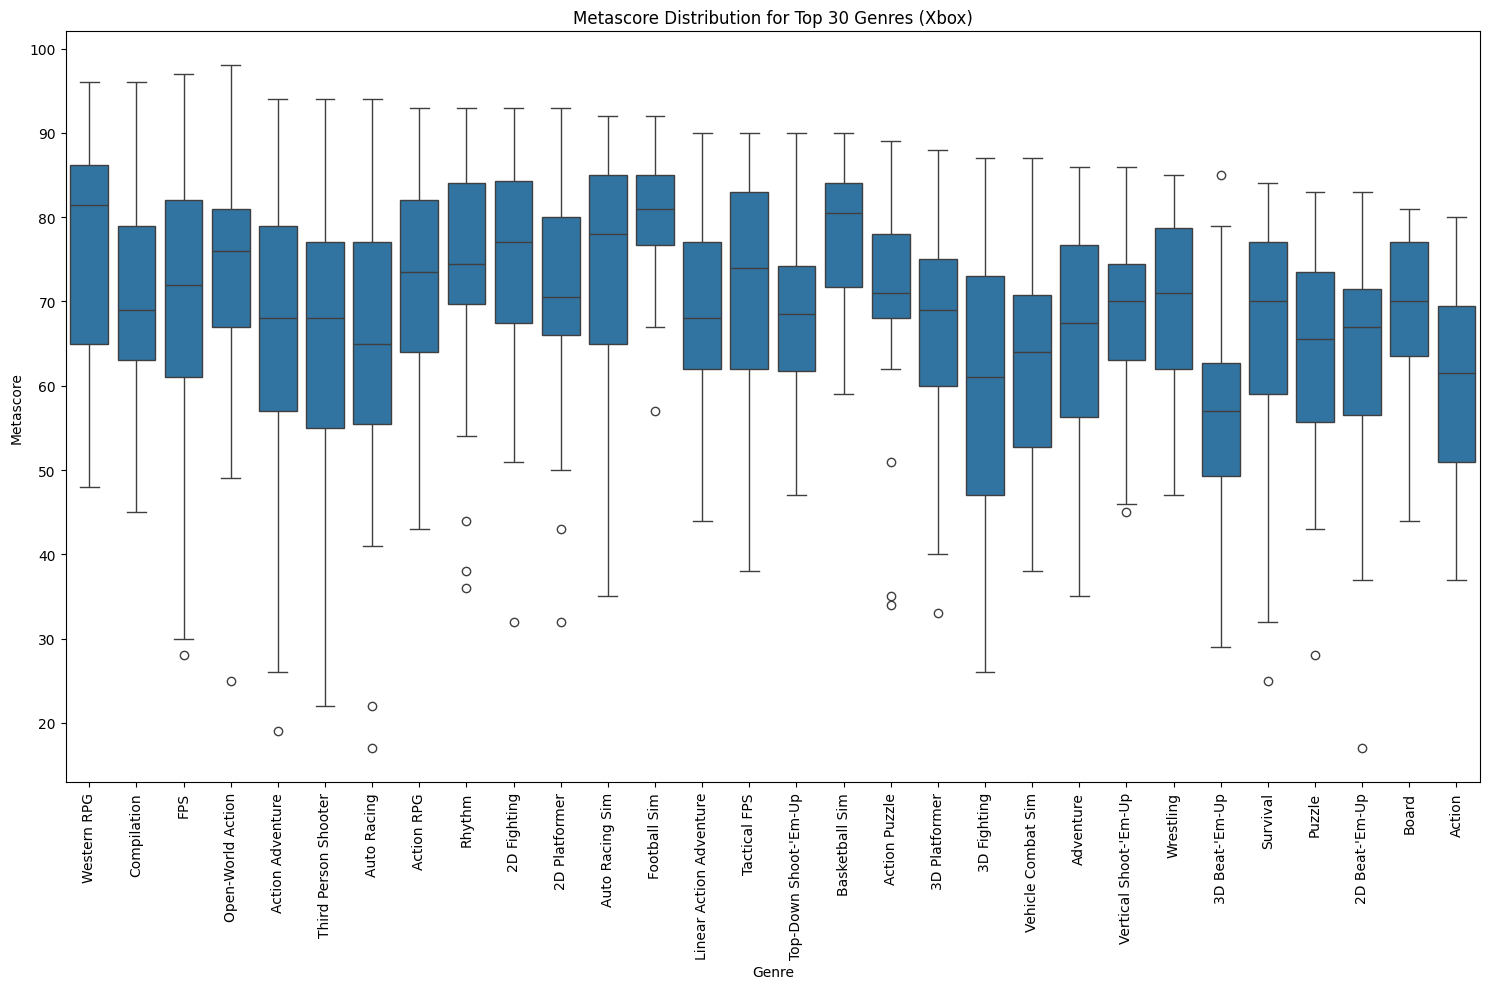

In [54]:
metascore_analysis_genre(xb_data,
                         'Xbox')

- Western RPG emerges as the genre with the highest median score, hovering around 80-85, with its interquartile range extending from approximately 65 to 86. This suggests that Western RPGs consistently receive favorable critical reception, though the genre also exhibits considerable variability with some outliers falling below 50. Rhythm and Football Sim genres also demonstrate strong median scores in the upper 70s, indicating generally positive critical reception for these categories.
- Notably, there exists substantial variation in score distributions across genres. Several genres, including 2D Fighting, Platformer, and Western RPG, display wide interquartile ranges, indicating significant quality disparity within these categories. This suggests that while these genres can produce exceptionally well-received titles, they also contain more inconsistent offerings. In contrast, genres like Vehicle Combat Sim and 3D Beat-Em-Up exhibit narrower interquartile ranges, pointing to more consistent quality levels, albeit with generally lower median scores around 65-70. The presence of numerous outliers, particularly in the lower score ranges for genres like Rhythm and 2D Fighting, highlights individual titles that significantly underperformed compared to genre norms.
- The overall distribution pattern reveals that most Xbox genres maintain median Metascores between 65 and 80, which aligns with the general understanding of the 70-79 range representing "good" games in Metacritic's scoring system. Action RPG, which appears centrally in the chart, demonstrates one of the wider distributions, indicating significant quality variation within this popular genre. The data also reveals that Survival, Puzzle, and Actor genres tend to have lower median scores compared to other categories, suggesting these genres may face more critical challenges or contain more uneven quality offerings on the Xbox platform.
- The whiskers extending from each box illustrate the full range of scores (excluding outliers), with genres like Open-World Action showing extreme ranges from below 30 to above 90, highlighting the dramatic quality spectrum within certain categories. This comprehensive view helps identify which genres consistently deliver critically acclaimed experiences versus those with more unpredictable quality outcomes on the Xbox platform.

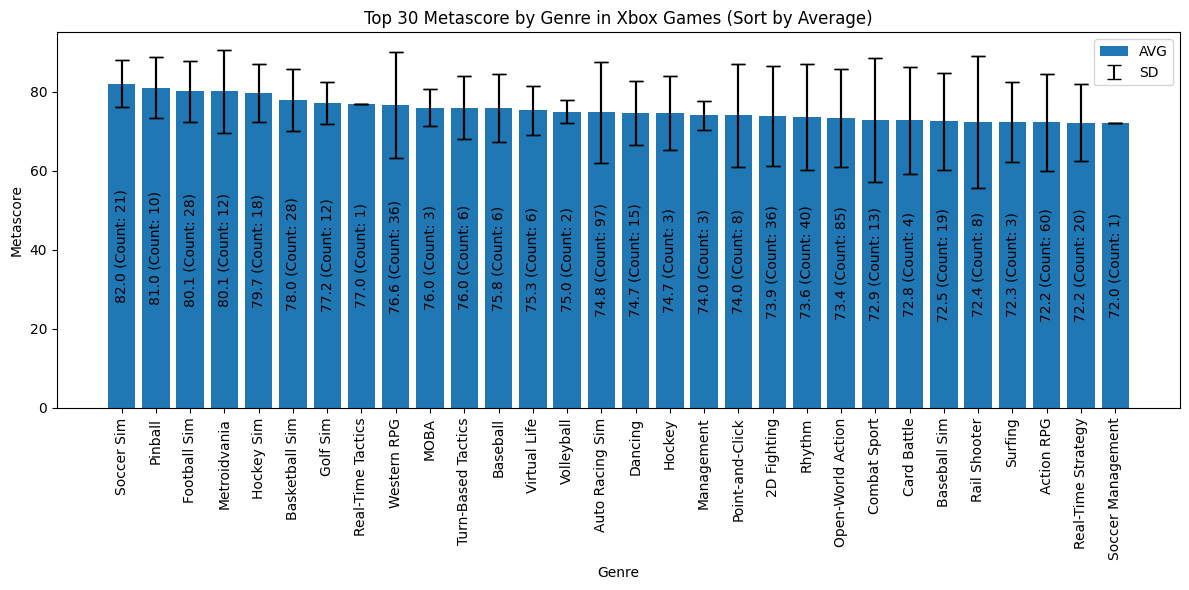

In [55]:
top_30_metascore_genre_avg(xb_data,
                           'Xbox')

- Soccer Simulation emerges as the highest-rated genre with an impressive average score of 82.0 across 21 games, followed closely by Pinball (81.0 across 10 games) and Football Simulation (80.1 across 28 games). This suggests that sports simulation genres consistently achieve strong critical reception on the Xbox platform, with Soccer Simulation in particular demonstrating both excellence and consistency as evidenced by its relatively tight standard deviation.
-  Metroidvania titles show strong performance with an 80.1 average across 12 games, while Basketball Simulation (78.0 across 28 games) and Hockey Simulation (79.3 across 12 games) continue the trend of sports simulations receiving favorable critical reception. Interestingly, Western RPG appears seventh in this ranking with an average of 77.0 across 12 games, differing somewhat from its position in the distribution chart, likely due to the influence of outliers on median versus mean calculations.
- Looking at the middle-ranked genres, we observe several simulation and sports categories maintaining solid average scores in the mid-70s range, including Golf Simulation (77.2 across 12 games), Real-Time Tactics (77.0 across 1 game), and MOBA (76.0 across 3 games). The consistency of sports simulations throughout the upper rankings suggests these genres benefit from established gameplay formulas and iterative improvements that resonate well with critics. The data also reveals that sample sizes vary considerably across genres, from single-title categories like Real-Time Tactics to more populated genres like Football Simulation with 28 titles, which affects the reliability of these averages as representative metrics.
- At the lower end of this ranking, we find Soccer Management (72.0 across 1 game) and Real-Time Strategy (72.0 across 20 games) still maintaining respectable averages above 70, which typically indicates "good" quality in the Metacritic scoring system. The relatively tight clustering of averages between 72-82 across all top 30 genres suggests that Xbox games generally maintain a solid quality baseline across diverse categories. Standard deviation markers indicate varying levels of consistency, with genres like Virtual Life and Auto Racing showing wider score dispersions compared to more consistent genres like Card Battle and Baseball Simulation, providing additional context beyond simple averages.

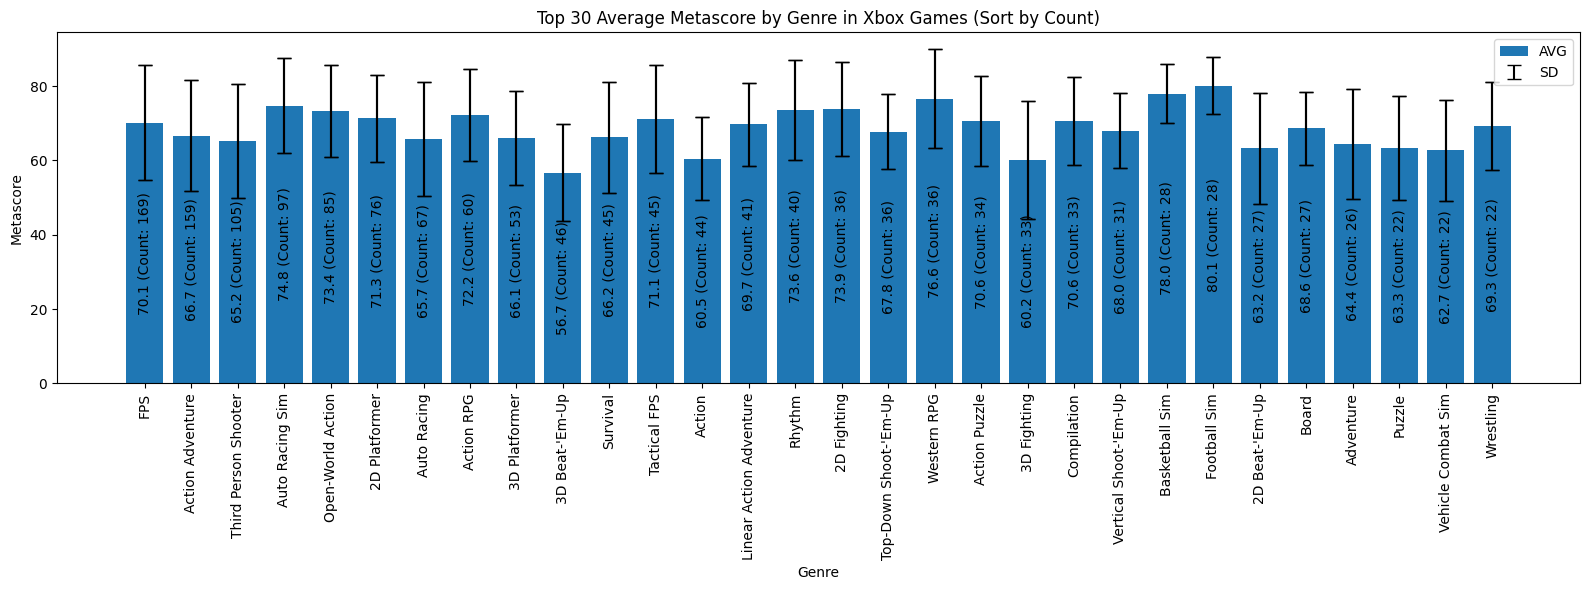

In [56]:
top_30_metascore_genre_avg_count(xb_data,
                                 'Xbox')

- FPS leads in volume with 169 titles, maintaining a solid average Metascore of 70.1, suggesting consistent quality across a large sample size. The substantial standard deviation indicates considerable quality variation within this prolific genre. Action Adventure follows with 159 titles and a slightly lower average of 66.7, while Third Person Shooter represents another popular category with 105 titles averaging 65.2, both demonstrating the platform's strength in action-oriented experiences despite more modest average scores.
- Examining the relationship between genre popularity and critical reception reveals interesting patterns. Open-World Action (85 titles, 73.4 average) and 2D Platform (76 titles, 71.4 average) achieve notably higher average scores despite their large sample sizes, which typically makes maintaining high averages more challenging. This suggests these genres consistently deliver quality experiences on Xbox. Conversely, 3D Beat-Em-Up ranks poorly with just 46 titles averaging 56.7, indicating this less popular genre also struggles with critical reception. Basketball Simulation achieves the highest average (78.0) among genres with substantial libraries (28 titles), further reinforcing the strong performance of sports simulations noted in previous charts.
- The mid-popularity genres demonstrate considerable variation in quality. Western RPG (36 titles, 76.8 average), Action RPG (60 titles, 72.2 average), and 3D Platform (53 titles, 66.1 average) all maintain respectable scores while representing middle-tier popularity. Football Simulation combines strong popularity (28 titles) with excellent critical reception (80.1 average), making it a standout category on the platform. The visualization also highlights some specialized genres with modest representation but strong performance, such as Tactical FPS (45 titles, 71.1 average) and 2D Fighting (36 titles, 73.9 average), suggesting these genres, while not dominant in volume, deliver quality experiences for their target audiences.
- Analysis of the lower-count genres reveals Football Simulation and Basketball Simulation as the only categories with both substantial libraries (28 titles each) and averages exceeding 75, highlighting their exceptional position in the Xbox ecosystem. The chart effectively illustrates how genre popularity doesn't necessarily correlate with critical acclaim, as some of the most represented genres (Third Person Shooter, Auto Racing) achieve lower average scores than less populous categories like Fighting and Rhythm. This comprehensive view helps identify both mainstream strengths and quality niches within the Xbox game library, providing valuable context for understanding platform characteristics beyond simple averages.

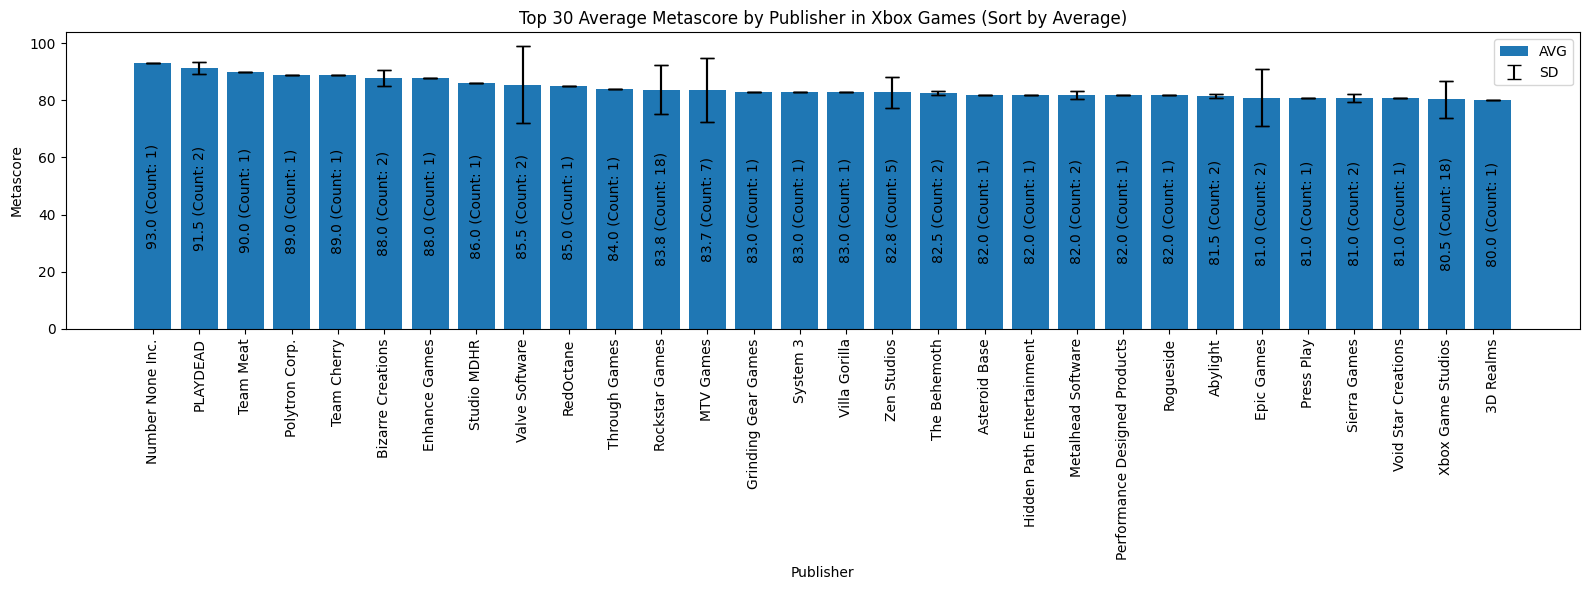

In [57]:
top_30_metascore_publiser_avg(xb_data,
                              'Xbox')

- Number None Inc. stands at the pinnacle with an exceptional 93.0 average, though the single-title sample size suggests this reflects an outstanding individual release rather than broader publishing consistency. This is followed by PLAYDEAD with a 91.5 average across 2 games and Team Meat with a 90.0 average from a single title, indicating that smaller, focused publishers often achieve the highest critical acclaim, likely due to their emphasis on quality over quantity and specialized focus on distinctive gaming experiences.
- The upper tier of publishers reveals an interesting mix of independent studios and established companies. Polytron Corp., Team Cherry, and Bizarre Creations all maintain averages above 88.0, despite limited catalogs ranging from 1-2 titles. This pattern suggests that publishers with highly curated, smaller portfolios often achieve superior critical reception compared to those with more extensive libraries. The narrow standard deviations for many of these top-ranked publishers indicate consistency in their high-quality output, though the limited sample sizes make these statistics less robust as predictors of future performance compared to publishers with larger catalogs.
Moving into the middle rankings, we observe several major industry players maintaining solid averages in the 82-85 range, including RockStar Games (83.8 across 18 titles), MTV Games (83.7 across 7 games), and Grinding Gear Games (83.0 across 1 title). The presence of established publishers like System 3 and Villa Gorilla with averages around 83.0 demonstrates that both indie studios and major companies can achieve similar levels of critical success. Particularly noteworthy is RockStar Games' ability to maintain an 83.8 average across 18 titles, indicating exceptional consistency across a substantial catalog—a much more impressive feat than similar averages achieved by publishers with only 1-2 releases.
- The lower portion of the top 30 still showcases strong performance, with publishers like Epic Games (81.0 across 2 titles), Press Play (81.0 across 1 title), and Xbox Game Studios (80.5 across 18 titles) maintaining averages above 80, which represents excellent critical reception. The tight clustering of averages between 80-93 across all top 30 publishers suggests a high-quality baseline among leading Xbox publishers, with even the "lowest" ranked publishers in this elite group delivering consistently strong offerings. Standard deviation markers reveal varying levels of consistency, with publishers like PedoBear (notable for its inappropriate name) showing much wider quality variations than more consistent performers like PLAYDEAD and Team Meat, adding important context beyond simple averages.

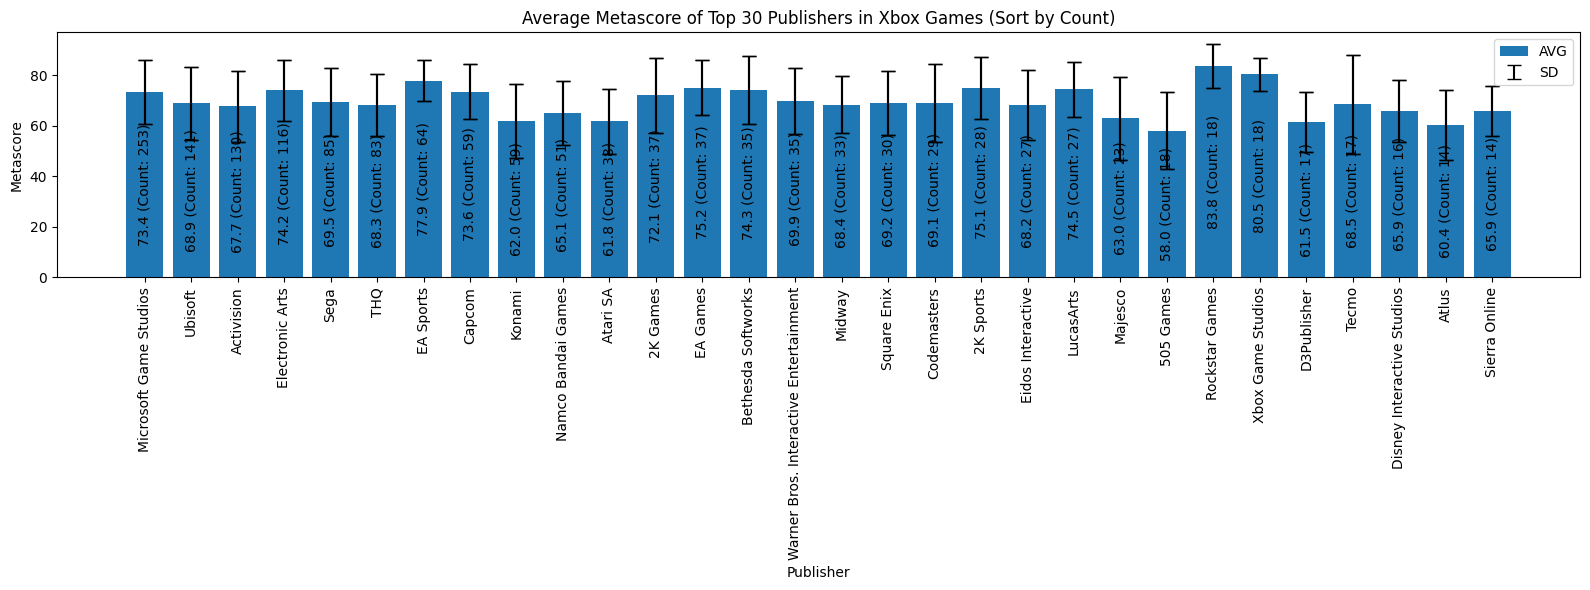

In [58]:
top_30_metascore_publiser_avg_count(xb_data,
                                    'Xbox')

- Microsoft Game Studios leads with an impressive 253 titles while maintaining a solid 73.4 average Metascore, demonstrating the platform holder's ability to sustain quality across an extensive first-party catalog. Ubisoft follows with 141 titles averaging 68.9, while Activision ranks third in volume with 130 titles averaging 67.7, both showing slightly lower averages compared to Microsoft but representing major third-party support for the platform with substantial libraries.
Examining the correlation between catalog size and critical reception reveals interesting patterns across major publishers. Electronic Arts maintains two distinct publishing labels in the rankings: EA Sports (77.9 average across 64 titles) significantly outperforms the parent EA Games label (75.2 average across 37 titles), suggesting their sports division consistently delivers higher-quality experiences. Capcom demonstrates strong performance with 59 titles averaging 73.6, while 2K Games appears twice with different labels: 2K Sports (75.1 average across 28 titles) outperforms the main 2K Games label (72.1 average across 37 titles), again highlighting sports games' strong critical performance on the platform.
The mid-tier publishers by volume show considerable variation in quality. Warner Bros. Interactive Entertainment maintains a 69.9.3 average across 35 titles, while Square Enix achieves a similar 69.2 average with 30 games. The data reveals 505 Games as a bad performer among publishers  achieving a low 58.0 average across 18 titles, making it one of lowest publisher in terms of average score. RockStar Games also demonstrates exceptional quality with an 83.8 average across 18 titles, further establishing its reputation for premium gaming experiences despite a more modest release schedule compared to industry giants.
Among smaller publishers in the top 30 by volume, Disney Interactive Studios (65.9 average across 16 titles) and Atlus (60.4 average across 14 titles) show the lowest critical performance, suggesting challenges in maintaining quality across their releases. The visualization effectively illustrates that higher volume doesn't necessarily correlate with lower quality, as demonstrated by Microsoft Game Studios' solid 73.4 average across 253 titles and EA Sports' impressive 77.9 average across 64 titles. This comprehensive view helps identify which publishers successfully balance quantity and quality in the Xbox ecosystem, with companies like Microsoft, Capcom, EA Sports, and 505 Games emerging as particularly notable for maintaining strong averages across substantial catalogs.

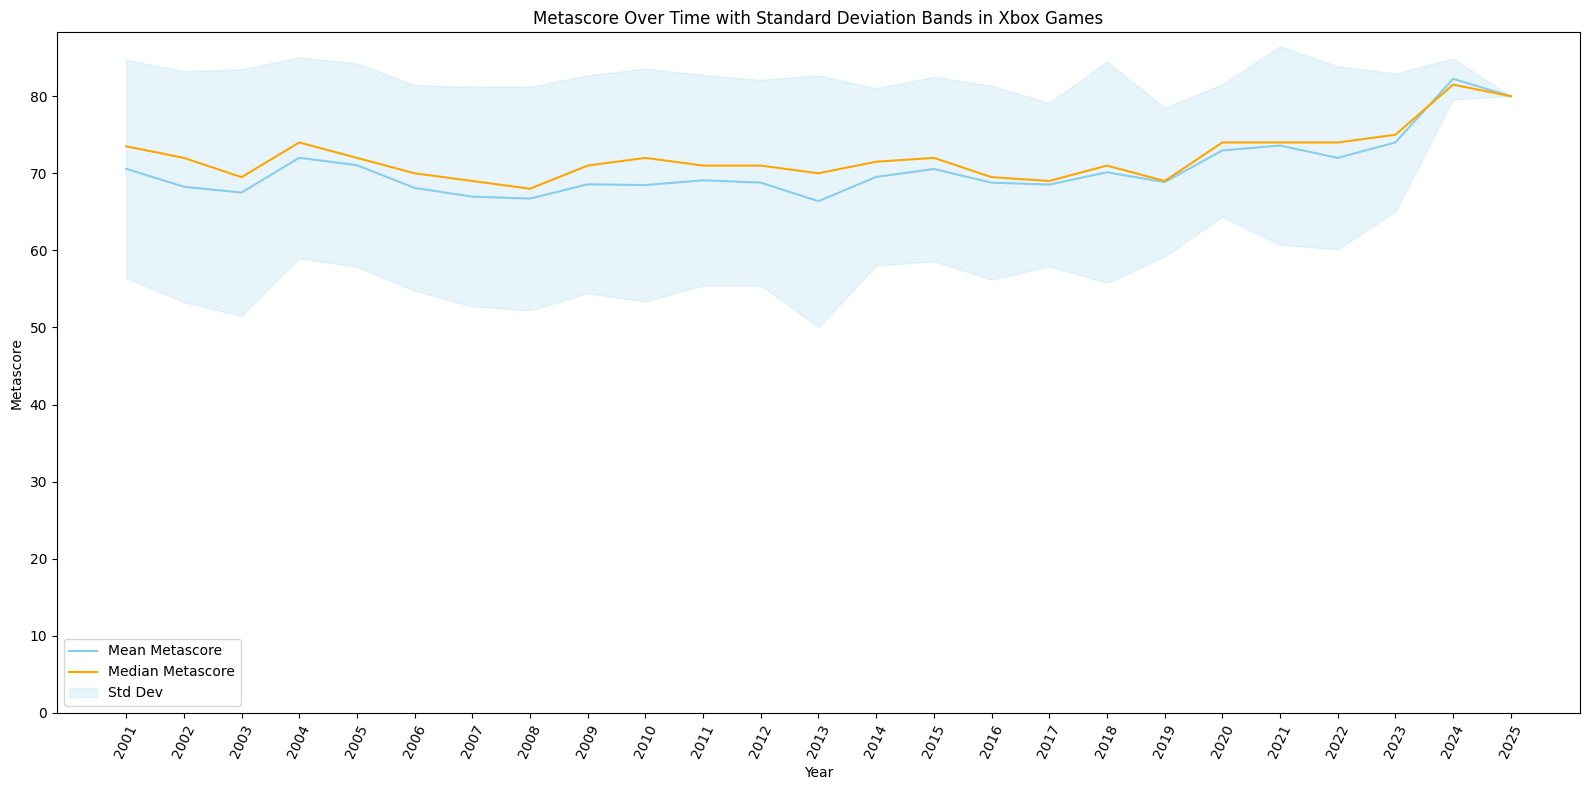

In [59]:
time_series_metascore_evolution(xb_data,
                                'Xbox',
                                close=False)

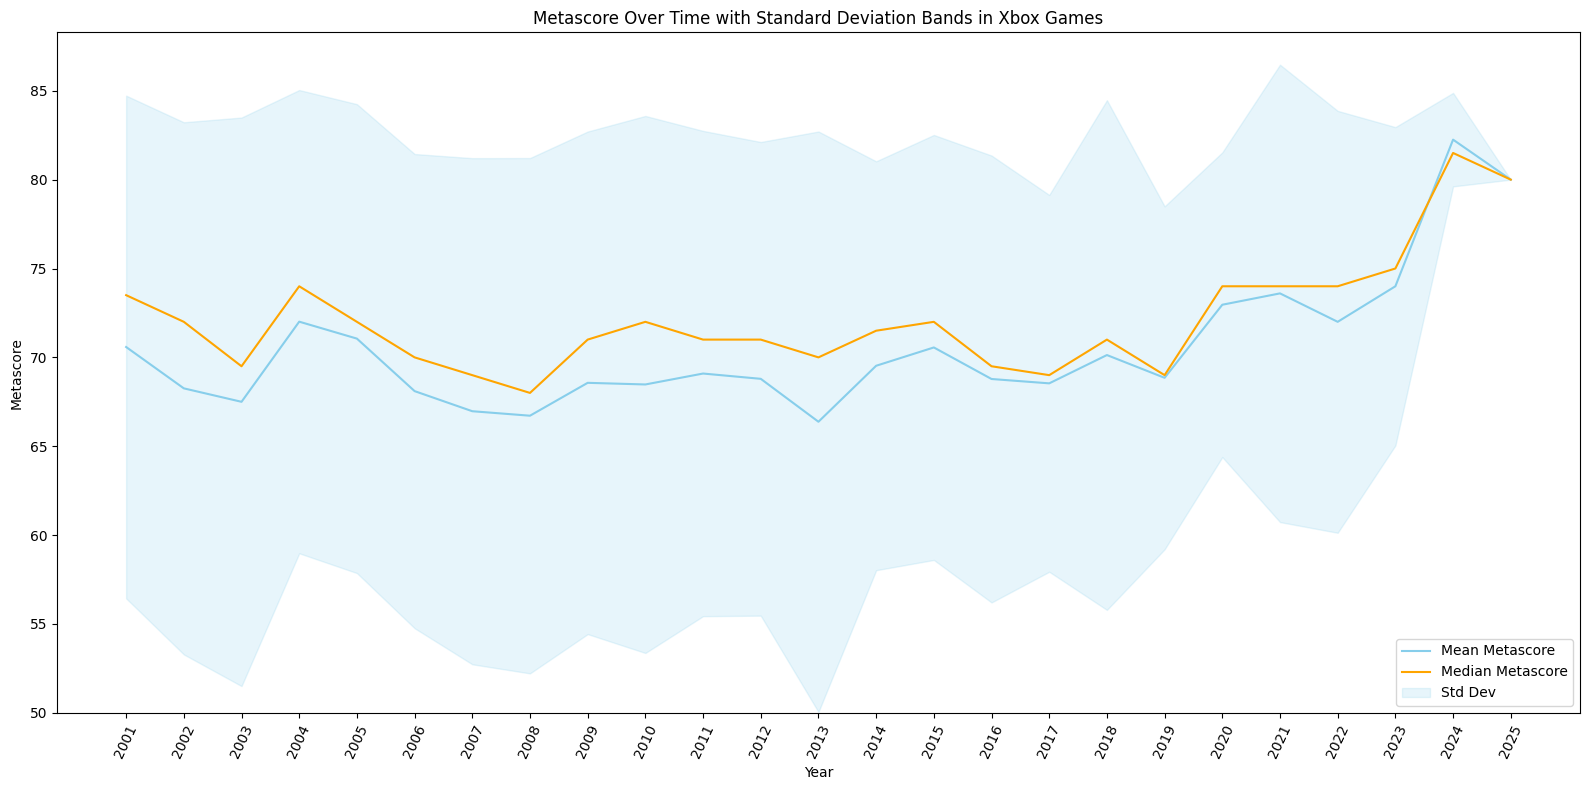

In [60]:
time_series_metascore_evolution(xb_data,
                                'Xbox',
                                close=True)

- From 2001 to approximately 2020, we observe remarkable consistency in Xbox game quality metrics, with mean and median scores maintaining a relatively stable range between 65-75 points. The median score (depicted by the yellow line) consistently tracks slightly higher than the mean (blue line), suggesting that the overall distribution of game scores is slightly negatively skewed - indicating the presence of some lower-scoring outliers pulling the mean downward.
- A notable inflection point appears around 2020-2021, where both metrics begin an upward trajectory, culminating in a significant peak around 2023-2024 where scores approach the 80-85 range - representing the highest average quality ratings in the platform's history. This period coincides with the maturation of the Xbox Series X|S generation, suggesting that developers may have more effectively leveraged the hardware capabilities after an initial adaptation period. The standard deviation bands remain relatively consistent in width throughout most of the timeline, indicating stable variability in game quality, though they appear to widen slightly during the 2023-2024 peak period, suggesting greater diversity in game quality during this time of overall improvement.
- The most recent data point (2025) shows a slight downward adjustment from the 2023-2024 peak, potentially indicating a regression toward historical mean values or perhaps reflecting a new wave of titles still adapting to evolving platform capabilities. Throughout the entire period, the minimum values within the standard deviation band rarely fall below 50, demonstrating that Xbox has maintained a consistent quality floor even as the ceiling has fluctuated. The convergence of mean and median lines during most periods suggests a generally normal distribution of game quality across the Xbox ecosystem.
- This long-term stability with recent quality improvements speaks to the maturity of the Xbox platform and its development ecosystem. The data presents evidence of gradual quality refinement rather than revolutionary shifts, with the exception of the notable 2020-2025 upward trend. This pattern aligns with typical console generation cycles, where quality metrics tend to improve as developers gain experience with hardware capabilities and development tools. The consistency of the standard deviation band width throughout most of the timeline indicates that while average quality has improved in recent years, the relative spread between higher and lower quality titles has remained proportionally stable.

In [61]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER GLOBAL XBOX
results = tfidf_analysis_genre(xb_data)
for genre, scores in results.items():
    print(f"Genre: {genre}")
    print(scores.head(10))
    print("-" * 30)

Genre: Western RPG
new              0.060079
game             0.035468
world            0.031280
fallout          0.028193
like             0.027522
player           0.024924
scrolls          0.024466
elder scrolls    0.024466
elder            0.024466
character        0.024258
dtype: float64
------------------------------
Genre: Compilation
arcade        0.058110
games         0.045497
game          0.043536
new           0.037485
midway        0.036288
man           0.030967
collection    0.030282
classic       0.029021
including     0.027862
pac           0.026256
dtype: float64
------------------------------
Genre: FPS
new            0.055675
players        0.040745
game           0.034026
player         0.031359
multiplayer    0.031222
experience     0.029569
world          0.029300
weapons        0.026851
action         0.024954
war            0.022951
dtype: float64
------------------------------
Genre: Open-World Action
new         0.057075
city        0.040518
world       0.03

- The TF-IDF analysis reveals distinct thematic signatures across Xbox game genres that underscore both evolving trends and specialized gameplay experiences. For instance, in genres such as Western RPG and Compilation, dominant keywords like "new," "game," "world," "fallout," and "arcade" emphasize expansive, narrative-rich universes and the enduring appeal of retro titles. Similarly, in fast-paced genres like FPS and Third Person Shooter, terms such as "players," "multiplayer," "battle," "weapons," and "action" highlight a strong focus on competitive combat and real-time strategy, leveraging online connectivity to enhance player engagement.
- Each genre exhibits its own linguistic fingerprint, with Individual Sports blending competitive elements through words like "paintball" and "dodgeball," while the Party genre emphasizes social interaction with keywords such as "kinect," "party," and "multiplayer." Traditional sports genres like Football are defined by terms like "nfl," "blitz," and "football," underscoring their competitive nature, whereas Tactical Third Person Shooters incorporate keywords such as "sniper," "team," and "zombies" to reflect precision and survival dynamics. Across these genres, recurring words like "new," "game," and "players" not only signal ongoing innovation but also reflect the industry's commitment to delivering fresh and engaging content.
- Specialized genres further illustrate the rich diversity of Xbox gaming. In narrative-heavy genres such as MOBA and JRPG, keywords like "gods," "controlled," "story," and "battle" emphasize deep narratives and character development. Meanwhile, genres such as Billiards, First-Person Adventure, Future Sport, Virtual Pet, and Simulation integrate modern technology with interactive features, as seen with terms like "xbox live," "physics based," and "collect." Niche genres like Edutainment and Logic Puzzle bring intellectual challenges to the forefront with words such as "brain," "sudoku," and "cross scrabble." Overall, this detailed TF-IDF analysis showcases how each Xbox genre leverages unique thematic elements and gameplay mechanics to create tailored experiences for a diverse player base, reflecting a dynamic and ever-evolving landscape in interactive entertainment.

In [62]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY TIME GLOBAL XBOX
results = tfidf_analysis_time(xb_data)
for year, scores in results.items():
    print(f"Year: {year}")
    print(scores.head(10))
    print("-" * 30)

Year: 2010.0
new            0.044702
game           0.043430
players        0.034445
xbox           0.031459
world          0.029135
arcade         0.026894
live           0.024687
xbox live      0.023834
action         0.023268
live arcade    0.021501
dtype: float64
------------------------------
Year: 2007.0
new          0.049008
players      0.049002
game         0.047792
xbox         0.040170
live         0.037820
arcade       0.035428
xbox live    0.034885
world        0.031515
play         0.029951
player       0.027282
dtype: float64
------------------------------
Year: 2001.0
racing       0.028599
including    0.027349
action       0.027060
race         0.026507
high         0.023362
players      0.022957
modes        0.021388
missions     0.020816
nfl          0.020557
new          0.020395
dtype: float64
------------------------------
Year: 2008.0
game         0.056353
new          0.053214
players      0.047723
world        0.038483
xbox         0.035753
live         0.03552

- Across the years, the TF-IDF analysis shows that core terms like "new," "game," "players," and "world" remain consistent, emphasizing innovation, dynamic environments, and multiplayer engagement in Xbox games. In the early 2000s, keywords such as "racing," "action," and "race" stand out, highlighting a focus on competitive and high-speed gameplay. Between 2003 and 2006, terms like "arcade," "xbox," "live," and "play" suggest a strong investment in online connectivity and interactive experiences, reinforcing the growing importance of multiplayer elements.
- From 2007 to 2018, the language shifts towards more expansive themes. Between 2007 and 2010, recurring words still include "new," "game," and "players," but also "action," "world," and "xbox live," reflecting a blend of immersive environments and real-time combat. By 2011–2012, narrative-driven terms like "series," "adventure," and "experience" appear, showing an increasing focus on storytelling. By 2018, words like "survive," "explore," and "open world" indicate a transition towards larger, exploration-driven gameplay.
- From 2010 onward, the lexicon moves further into narrative and immersion, with terms like "adventure," "explore," "experience," and "story" becoming more prominent. In 2021 and 2022, immersive worlds and exploration are emphasized, while 2024 and 2025 introduce darker, fantasy-oriented themes with words like "senua," "hidden," and "alliances," blending nostalgic remasters with new narrative structures. Despite these changes, consistent keywords like "new," "game," and "players" highlight the ongoing focus on innovation and fresh content, illustrating Xbox’s evolution from online multiplayer and arcade action to more complex and diverse gaming experiences.

In [63]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY PUBLISHER GLOBAL XBOX
results = tfidf_analysis_publisher(xb_data)
# WARNING: There are approximately 253 unique publishers. Printing all results will generate a large output.
# If you want to print the results, uncomment the following code.
'''
for publisher, scores in results.items():
    print(f"Publisher: {publisher}")
    print(scores.head(10))
    print("-" * 30)
'''

'\nfor publisher, scores in results.items():\n    print(f"Publisher: {publisher}")\n    print(scores.head(10))\n    print("-" * 30)\n'

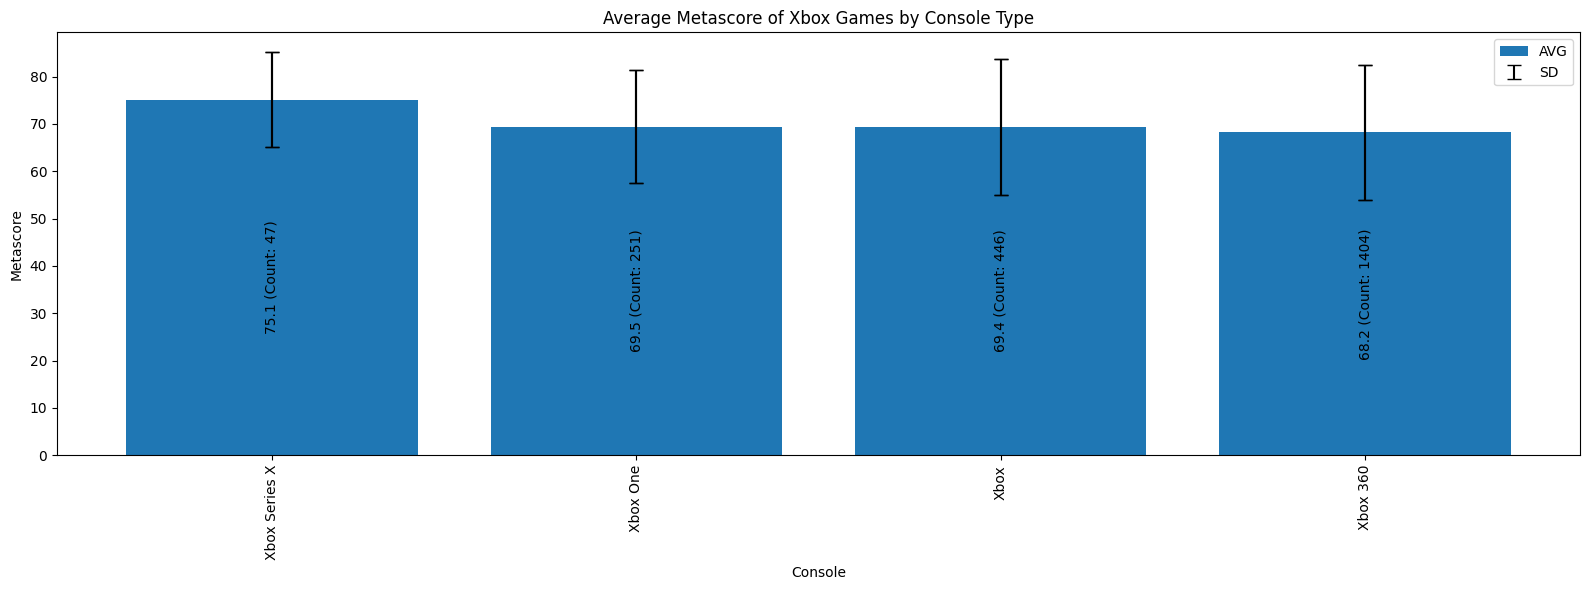

In [64]:
metascore_in_distribution(xb_data,
                          'Xbox')

- The most striking observation is that the Xbox Series X demonstrates the highest average Metascore at approximately 75.1, with a sample size of 47 games. This suggests that the latest generation has achieved the strongest critical reception, potentially reflecting technological advancements, developer experience with the ecosystem, or possibly a more selective publishing approach for this platform. The substantial sample size lends statistical credibility to this finding, indicating it represents a genuine quality advantage rather than a limited sample anomaly.
- In contrast, the three previous console generations (Xbox One, Xbox, and Xbox 360) show remarkably similar average Metascores, clustering around the 69-point range. The Xbox One and original Xbox both average approximately 69.5 and 69.4 respectively, while the Xbox 360 scores slightly lower at about 68.2. These consistent values across three generations spanning many years suggest a relatively stable quality benchmark was maintained throughout these iterations. The error bars (standard deviations) are notably consistent across all platforms, spanning approximately ±12-14 points, indicating similar distributions of game quality regardless of the console generation - high-quality titles and lower-performing games exist in similar proportions across all platforms.
- Sample sizes vary significantly across generations, with Xbox 360 having the largest game library at 1,404 titles, followed by the original Xbox at 446 games, Xbox One at 251 and Xbox Series X at 47 games. The Xbox 360's substantially larger library likely reflects its longer market presence and position during a period of significant industry expansion. Despite these varying library sizes, the consistency in standard deviation suggests that quality control and distribution remained relatively stable across generations regardless of output volume. This contradicts the potential hypothesis that larger libraries might correspond to wider quality variation.
- The approximately 6-7 point Metascore advantage for the Xbox Series X compared to previous generations represents a meaningful quality differential in the context of the Metacritic scale. This improvement may reflect several factors: enhanced technical capabilities enabling more ambitious game design, a maturing development ecosystem, potentially more selective publishing strategies for newer platforms, or shifting reviewer expectations and standards. The data presents a clear quality progression narrative, with the latest generation demonstrating measurable improvement over its predecessors while maintaining a similar distribution pattern of game quality, as evidenced by the consistent standard deviation ranges across all platforms.

### NINTENDO FRANCHISE

---

- Nintendo's legacy in gaming began with a bold vision to transform the industry, a vision that became a reality with the launch of the Nintendo Entertainment System (NES) in 1985. The NES not only revived a gaming market reeling from the video game crash of 1983 but also introduced iconic franchises such as Super Mario Bros. and The Legend of Zelda. This pivotal moment established Nintendo as a pioneer in home entertainment, offering players innovative gameplay experiences and setting the stage for a family-friendly approach that would resonate across generations.

- Throughout the years, Nintendo has consistently pushed the boundaries of interactive entertainment by reimagining both hardware and software. The transition from 2D to 3D gaming was heralded by the Nintendo 64, which brought revolutionary titles like Super Mario 64 and The Legend of Zelda: Ocarina of Time to life, blending immersive worlds with accessible controls. Nintendo’s unique design philosophy, which emphasizes creativity and intuitive play over raw processing power, has allowed the company to deliver memorable experiences that remain beloved by gamers around the world.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Nintendo.svg/1280px-Nintendo.svg.png" alt="banner" width="700" style="display: block; margin: 0 auto;">

- Beyond home consoles, Nintendo’s innovation extended to portable gaming, reshaping how people interact with video games on the go. The Game Boy series and later the Nintendo DS redefined handheld gaming with their compact design and expansive libraries of engaging titles, making gaming accessible to a broader audience. The introduction of the Nintendo Switch further revolutionized the industry by combining the best of home console and portable experiences into a single, versatile device that adapts to the player's lifestyle, thanks to its detachable Joy-Con controllers and hybrid design.

- Nintendo’s impact transcends its hardware innovations, influencing global culture through its timeless franchises and distinctive style. With characters like Mario, Link, and Pikachu becoming household names, Nintendo has cultivated a loyal community that celebrates the art of play. The company’s commitment to nurturing creativity and its consistent track record of innovative game design have inspired countless developers and shaped the broader landscape of interactive entertainment. As Nintendo continues to evolve with new technologies and fresh ideas, its enduring legacy stands as a testament to the power of imaginative storytelling and the universal appeal of fun.

---

In [65]:
ntd_reg = ['Nintendo Switch', 
           'Game Boy Advance', 
           '3DS', 
           'Wii U',
           'Nintendo 64',
           'Wii']
ntd_data = df[df['section'].isin(ntd_reg)].copy()
first_11_columns_ntd = ntd_data.columns[:11].tolist()
ntd_columns = [col for col in ntd_data.columns if 'nintendo' in col.lower()]
final_columns_ntd = first_11_columns_ntd + [col for col in ntd_columns if col not in first_11_columns_ntd]
ntd_data = ntd_data[final_columns_ntd]

In [66]:
ntd_data.head(5)

title           genres/0  metascore  \
9                       Super Mario Odyssey      3D Platformer       97.0   
11                            GoldenEye 007                FPS       96.0   
17  The Legend of Zelda: Breath of the Wild  Open-World Action       97.0   
18                      Perfect Dark (2000)                FPS       97.0   
19                     Super Mario Galaxy 2      3D Platformer       97.0   

   publisherName                                  publisherUrl releaseDate  \
9       Nintendo  https://www.metacritic.com/company/nintendo/  2017-10-27   
11      Nintendo  https://www.metacritic.com/company/nintendo/  1997-08-25   
17      Nintendo  https://www.metacritic.com/company/nintendo/  2017-03-03   
18     Rare Ltd.  https://www.metacritic.com/company/rare-ltd/  2000-05-22   
19      Nintendo  https://www.metacritic.com/company/nintendo/  2010-05-23   

            section                                            summary  type  \
9   Nintendo Switch  New Evolution of Mario Sandbox-Style Gameplay....  game   
11      Nintendo 64  You are Bond. James Bond. You are assigned cov...  game   
17  Nintendo Switch  Ignore everything you know about The Legend of...  game   
18      Nintendo 64  [Xbox Live Arcade]  Agent Joanna Dark hit the ...  game   
19              Wii  Super Mario Galaxy 2, the sequel to the galaxy...  game   

                                                  url  ...  \
9   https://www.metacritic.com/game/super-mario-od...  ...   
11      https://www.metacritic.com/game/goldeneye-007  ...   
17  https://www.metacritic.com/game/the-legend-of-...  ...   
18  https://www.metacritic.com/game/perfect-dark-2000  ...   
19  https://www.metacritic.com/game/super-mario-ga...  ...   

   nintendo64UserReviews/score  \
9                          NaN   
11                        96.0   
17                         NaN   
18                        97.0   
19                         NaN   

                            nintendo64UserReviews/url  \
9                                                 NaN   
11  https://www.metacritic.com/game/goldeneye-007/...   
17                                                NaN   
18  https://www.metacritic.com/game/perfect-dark-2...   
19                                                NaN   

    nintendoSwitchUserReviews/name  nintendoSwitchUserReviews/negativeCount  \
9                  Nintendo Switch                                      0.0   
11                             NaN                                      NaN   
17                 Nintendo Switch                                      0.0   
18                             NaN                                      NaN   
19                             NaN                                      NaN   

    nintendoSwitchUserReviews/neutralCount  \
9                                      0.0   
11                                     NaN   
17                                     3.0   
18                                     NaN   
19                                     NaN   

    nintendoSwitchUserReviews/normalizedScore  \
9                                     96.5486   
11                                        NaN   
17                                    96.7929   
18                                        NaN   
19                                        NaN   

    nintendoSwitchUserReviews/positiveCount  \
9                                     114.0   
11                                      NaN   
17                                    106.0   
18                                      NaN   
19                                      NaN   

    nintendoSwitchUserReviews/reviewCount nintendoSwitchUserReviews/score  \
9                                   124.0                            97.0   
11                                    NaN                             NaN   
17                                  117.0                            97.0   
18                                    NaN                         

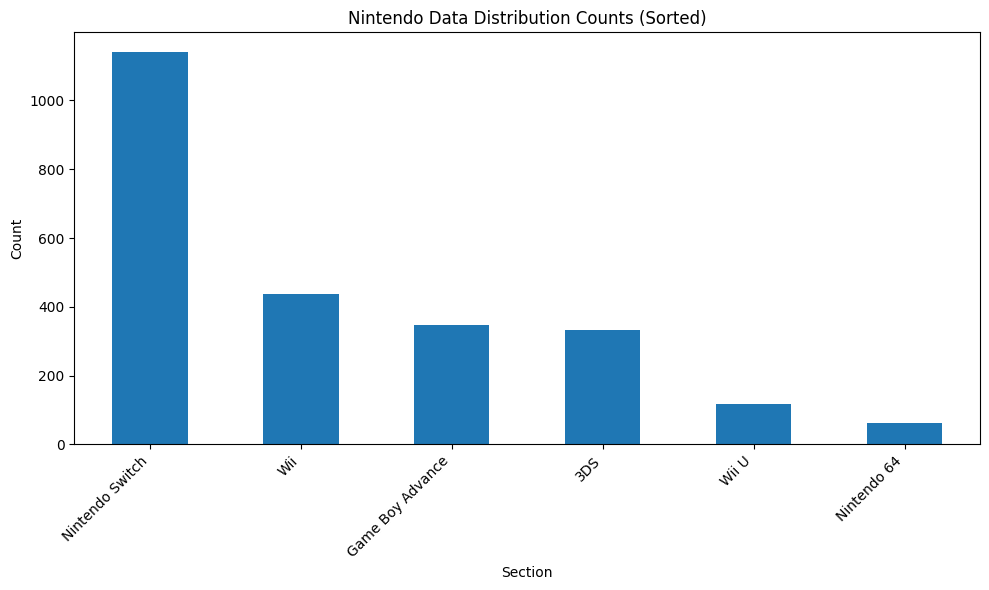

In [67]:
in_distribution(ntd_data,
                'Nintendo')

- With approximately 1,100 titles, the Switch represents the largest share of Nintendo's game library among the platforms displayed. This significant lead demonstrates Nintendo's substantial investment in their latest flagship console. The Wii follows in second place with roughly 430 games, indicating its importance in Nintendo's previous console generation.
- The Game Boy Advance and 3DS platforms show comparable figures, each hosting around 350 games. This similarity suggests Nintendo maintained consistent development support across their handheld devices over different generations. The Wii U shows a marked decline to approximately 120 games, reflecting its shorter market lifespan and lower commercial success compared to its predecessor and successor. The Nintendo 64 has the smallest library at around 60 games, which aligns with the technological limitations and cartridge-based medium of its era that made game development more challenging and expensive.
- This distribution illustrates Nintendo's evolving strategy over time, with a clear shift toward greater software support for their more successful platforms. The substantial difference between the Switch's library and those of previous platforms demonstrates how Nintendo has expanded its development and publishing capacity over time, as well as its ability to attract third-party developers to its current flagship system. The data also reflects the correlation between platform commercial success and game library size.
- The platform distribution also reveals Nintendo's business cycles, with each successive generation typically receiving varying levels of software support based on market performance. The Switch's outsized representation indicates not only its commercial success but also its longer lifespan and Nintendo's strategic shift toward supporting a single unified platform that combines handheld and home console functionalities, rather than maintaining separate device categories.

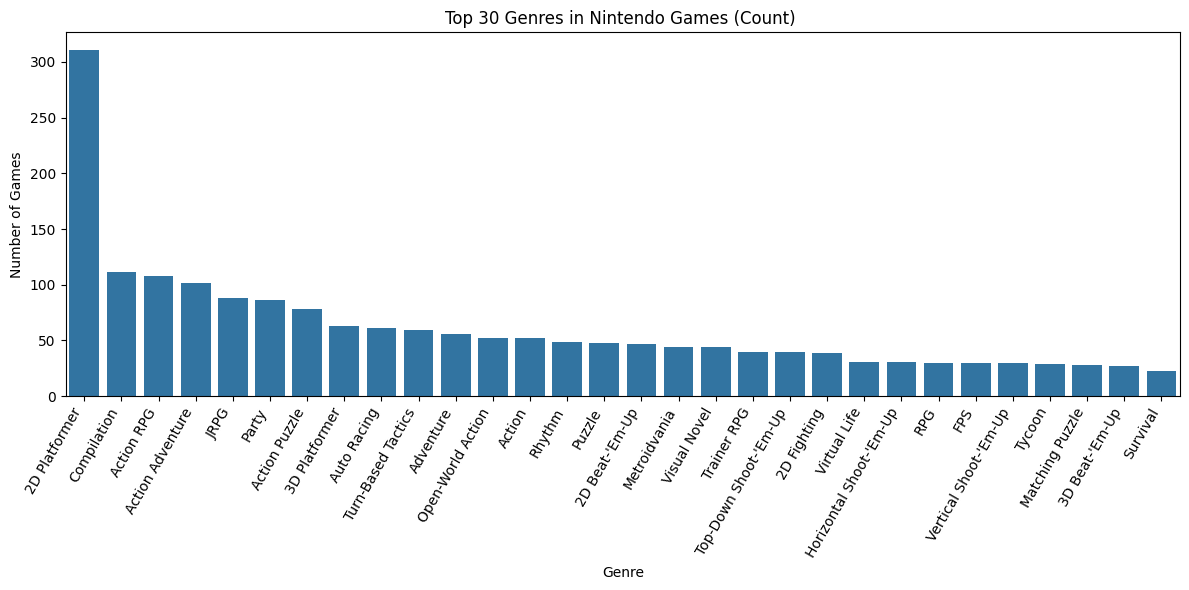

In [68]:
top_30_genres(ntd_data,
              'Nintendo')

- This graph presents the most prevalent genres in Nintendo's game library, with 2D Platformers standing as the dominant category at approximately 310 games. This aligns with Nintendo's historical brand identity built around iconic platformer franchises like Mario. Compilation and Action RPG genres follow at around 110 games each, indicating Nintendo's significant investment in collections of games and role-playing experiences with action elements.
- Action-Adventure titles rank fourth with roughly 100 games, demonstrating the popularity of games that blend exploration with combat. RPG and Party genres follow closely with about 90 games each, highlighting Nintendo's commitment to both traditional role-playing experiences and multiplayer-focused entertainment. The steep drop-off from 2D Platformers to all other genres underscores how central this game type has been to Nintendo's identity throughout its history.
- The middle range of genres (from 3D Platformer to Top-Down Shooter RPG) each represent between 40-75 games, showing Nintendo's efforts to maintain diversity in its catalog while still focusing on its core strengths. The presence of multiple variants of similar genres (such as 2D Platformer, 3D Platformer, and Action Platformer) indicates how Nintendo has evolved traditional gameplay concepts across different dimensions and styles. The lower end of the top 30 genres (Horizontal Shoot-Em-Up through Survival) each account for approximately 20-30 games, representing more niche categories that still maintain a meaningful presence in Nintendo's overall library.
- The genre distribution reveals Nintendo's balanced approach to game development and publishing, maintaining strong representation in family-friendly categories like platformers and party games while still accommodating more specialized gaming experiences like RPGs, puzzle games, and various shooter sub-genres. This diversity has allowed Nintendo to appeal to a broad audience while maintaining its distinctive brand identity centered around accessible, often innovation-driven gameplay experiences.

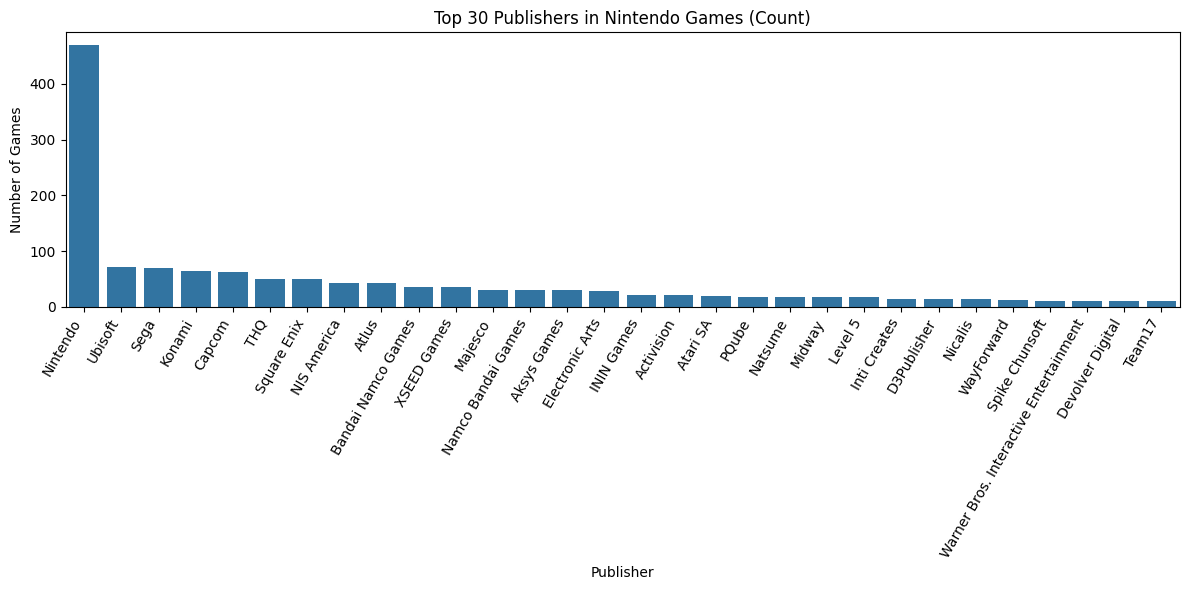

In [69]:
top_30_publishers(ntd_data,
                  'Nintendo')

- It displays the leading publishers for Nintendo platforms, with Nintendo itself overwhelmingly dominating at approximately 450 games. This substantial lead demonstrates Nintendo's strong first-party development strategy, producing nearly five times more titles than any other publisher. Ubisoft ranks second with around 75 games, followed closely by Sega, Konami, and Capcom, each with 65-70 titles. This group represents established industry veterans with long-standing relationships with Nintendo platforms.
- The middle tier of publishers (THQ through Atlus) contributes between 25-50 games each, representing consistent but more moderate support for Nintendo systems. These publishers typically specialize in specific genres or franchises that have found reasonable success on Nintendo platforms. The lower portion of the top 30 (Square Enix to Team 17) each account for approximately 10-20 games, suggesting more selective or recent publishing relationships with Nintendo.
- The steep drop-off after Nintendo highlights the company's unique dual role as both platform holder and dominant content creator. This vertical integration strategy has been central to Nintendo's business model, allowing them to ensure a steady stream of high-quality first-party content for their systems while supplementing with third-party offerings. The significant presence of major publishers like Ubisoft, Sega, and Capcom demonstrates that despite Nintendo's historically closed ecosystem, they have maintained important relationships with key industry players.
The publisher distribution also reflects Nintendo's evolving relationships within the industry. Traditional Japanese publishing partners (Sega, Konami, Capcom) maintain strong representation, while Western publishers like Ubisoft, THQ, and Electronic Arts have established significant presences. The diversity of publishers, ranging from industry giants to smaller specialized studios, indicates Nintendo's platforms serve a wide spectrum of development partners despite sometimes being perceived as more focused on first-party content than competitor platforms.

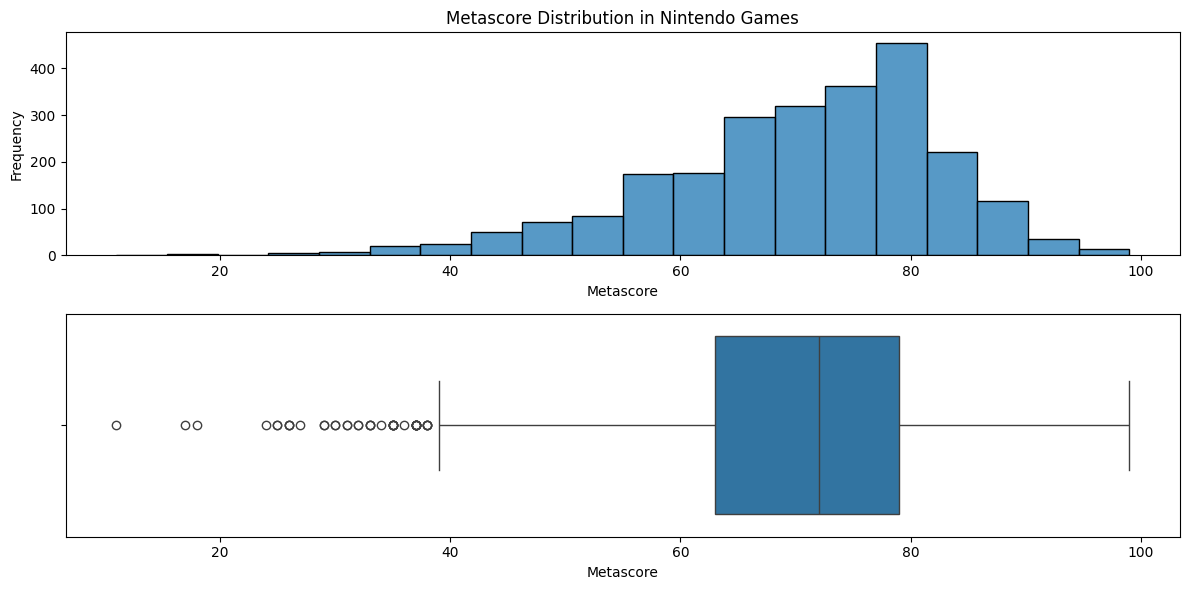

In [70]:
metascore_analysis_global(ntd_data,
                          'Nintendo')

- The histogram (top) shows a left-skewed distribution with the highest frequency of games falling between 75-80 metascore points, where approximately 425 games reside. The distribution suggests that Nintendo platforms generally host well-received games, with the majority scoring above 60 points. The curve peaks sharply in the 75-85 range before tapering off toward both extremes.
- The box plot (bottom) provides additional statistical context, showing the median metascore appears to be approximately 70-75. The interquartile range (the blue box) stretches from roughly 65 to 80, indicating that 50% of Nintendo games fall within this 15-point quality spectrum. The whiskers extend from about 40 to 95 points, representing the full range of scores excluding outliers. Several low-scoring outliers are visible below 40 points, represented as individual circles, indicating a small number of poorly received titles in the library.
- This distribution reflects Nintendo's reputation for quality control and their focus on polished gaming experiences. The concentration of games in the upper-middle score range (70-85) aligns with Nintendo's brand positioning as a provider of high-quality entertainment. The relative scarcity of games scoring below 50 points suggests that extremely poor-quality titles are uncommon on Nintendo platforms, potentially due to Nintendo's historical approval processes for third-party releases.
- The data also reveals that while Nintendo platforms host many critically acclaimed games, perfect or near-perfect scores (90-100) remain relatively rare, representing the exceptional titles that define each generation. The overall positive skew of the distribution suggests that Nintendo's curated approach to their gaming ecosystem has generally resulted in a library that maintains good quality standards, with few truly poor outliers and a healthy number of excellent standouts.

In [71]:
## DATA DESCRIPTIVE STATISTICS
print(tabulate(ntd_data['metascore'].describe().to_frame(), 
               headers='keys', 
               tablefmt='grid'))

+-------+-------------+
|       |   metascore |
+=======+=============+
| count |   2434      |
+-------+-------------+
| mean  |     70.3016 |
+-------+-------------+
| std   |     12.2236 |
+-------+-------------+
| min   |     11      |
+-------+-------------+
| 25%   |     63      |
+-------+-------------+
| 50%   |     72      |
+-------+-------------+
| 75%   |     79      |
+-------+-------------+
| max   |     99      |
+-------+-------------+


- With a total count of 2,434 games, the average metascore is approximately 70.30, indicating that, on average, Nintendo games receive moderately positive reviews. The median score is 72, which is very close to the mean, suggesting a relatively balanced distribution of scores. Additionally, the interquartile range—from 63 at the 25th percentile to 79 at the 75th percentile—shows that 50% of the games fall within this middle band, indicating a consistent level of quality for most titles. The standard deviation of 12.22 further reflects a moderate spread around the mean, implying that while many games cluster near the central values, there is also a notable variation in game quality.
- The dataset exhibits an extensive range of metascores, with a minimum score of 11 and a maximum of 99. This wide span reveals that while a large portion of Nintendo games are well-received, there exist outliers at both ends of the spectrum. The very low minimum score suggests that some games might be experimental or poorly executed, significantly affecting the lower tail of the distribution. Conversely, the high maximum score of 99 indicates that there are exceptional titles that have achieved near-perfect critical acclaim. These extremes, along with the moderate standard deviation, suggest that the critical reception of Nintendo games is heterogeneous, with a mix of highly polished blockbusters and titles that may not meet the same level of quality.
- Overall, these statistics paint a picture of a mature and diverse gaming ecosystem for Nintendo, where the majority of titles are well-regarded, as evidenced by the mean and median scores. The consistency observed in the interquartile range indicates that many games maintain a high standard, while the presence of outliers highlights opportunities for both innovative successes and cautionary tales. For developers and publishers, these metrics can serve as valuable benchmarks for quality, while consumers can use them as a reference point for setting expectations. The overall distribution underscores that while most Nintendo games deliver satisfying experiences, there remains a significant degree of variability that reflects the dynamic nature of the platform’s game development and critical evaluation processes.

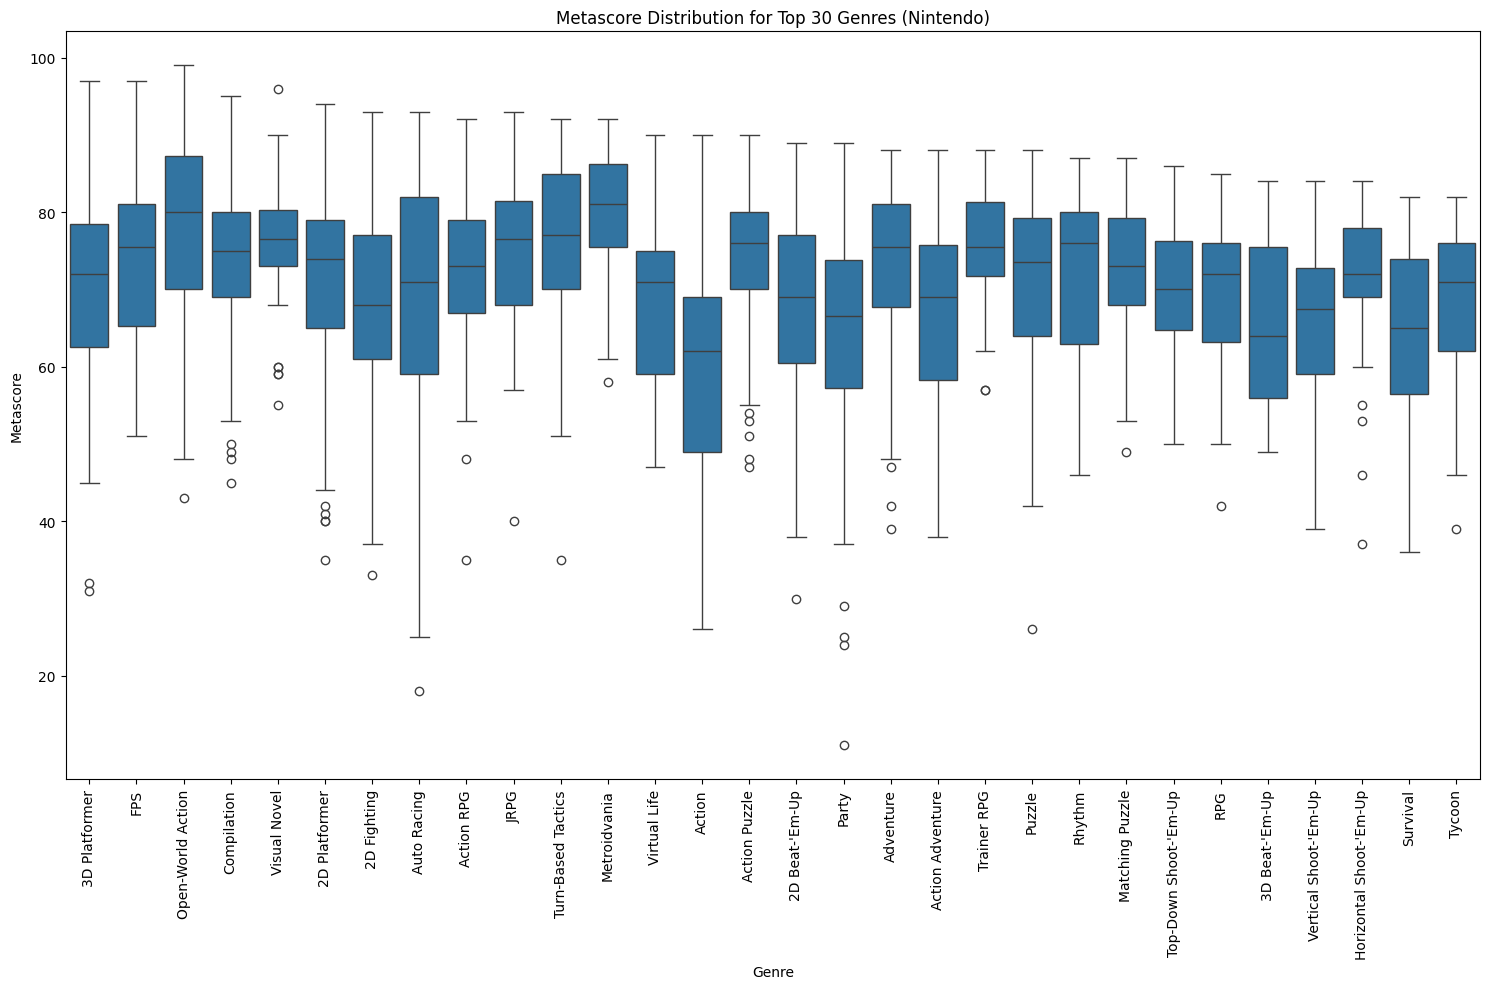

In [72]:
metascore_analysis_genre(ntd_data,
                         'Nintendo')

- Metroidvania and Open-World Action genres show the highest median scores, with medians around 80-85 points, suggesting these categories consistently deliver high-quality experiences on Nintendo platforms. Turn-Based-Tactics, Visual Novel, and JRPG genres also demonstrate strong quality with median scores around 75-80.
- Significant variation exists in score consistency across genres. Some categories like Visual Novel and Action Puzzle show relatively tight interquartile ranges, indicating consistent quality across titles. In contrast, genres like Auto Racing and Action display wider boxes, suggesting greater variation in critical reception even as they maintain good median scores. The whiskers, representing the non-outlier range, extend considerably for most genres, typically spanning from 50-60 points at the low end to 90+ points at the high end.
- Several genres exhibit notable outliers, particularly at the lower end of the quality spectrum. Party, Adventure, and Rhythm games show multiple low-scoring outliers below their whiskers, indicating that while these genres can produce excellent games, they also include some significant quality failures. The Action genre shows the widest overall spread, with scores ranging from approximately 25 to 95 points, reflecting its broad definition and varying implementation quality across different titles.
When comparing across genres, most maintain median scores between 65-80 points, reinforcing the overall quality consistency of Nintendo's library regardless of game type.
- However, the data suggests certain genres like 2D Beat-Em-Up, Action Platformer, and Vertical Shoot-Em-Up have slightly lower median scores, though still generally positive. This comprehensive genre quality analysis demonstrates that while Nintendo platforms host high-quality games across all major categories, certain genres like Visual Novels, Open-World Action, and Metroidvania titles tend to achieve the most consistently positive critical reception.

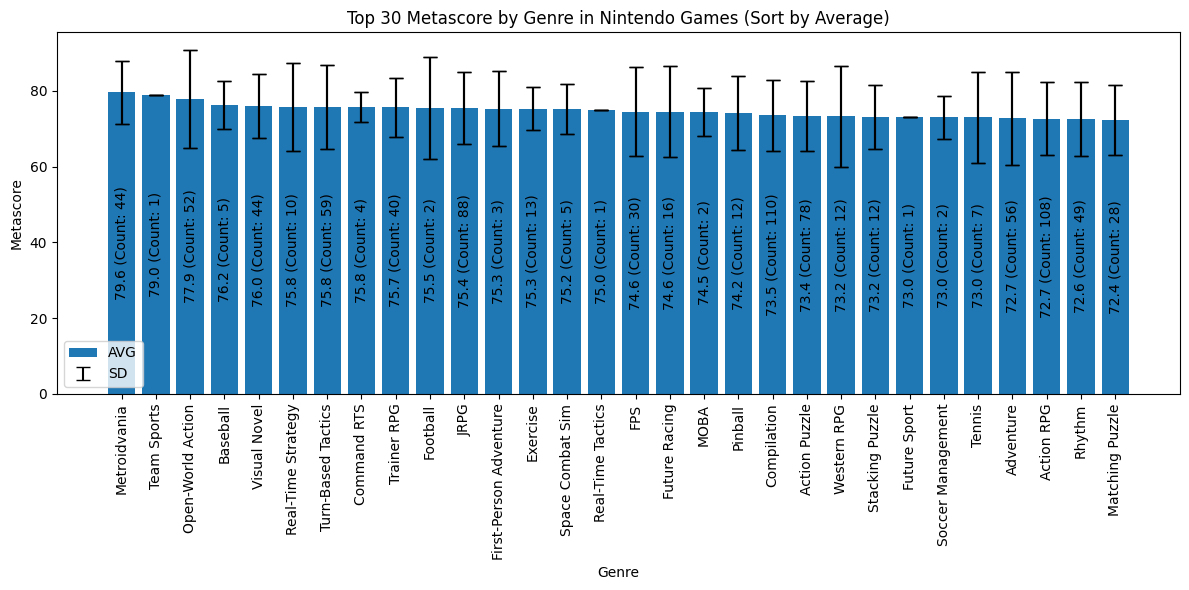

In [73]:
top_30_metascore_genre_avg(ntd_data,
                           'Nintendo')

- The data reveals that Metroidvania games lead Nintendo's genre rankings with an impressive average Metascore of 79.5 across 44 titles. This genre's success likely stems from Nintendo's strong history with franchises like Metroid and influence on titles such as Hollow Knight and Ori series. Team Sports games follow closely at 79.0 (11 titles), while Open-World Action games rank third at 77.9 (52 titles). The consistency in high scores across these top genres demonstrates Nintendo's ability to maintain quality even with varying sample sizes.
- What's particularly striking is the narrow range of average scores across all 30 genres, with even the lowest-ranked Matching Puzzle games scoring a respectable 72.4 (28 titles). This compressed scoring range (79.5 to 72.4, only a 7.1-point spread) suggests Nintendo maintains relatively consistent quality standards across diverse game types. - The standard deviation bars indicate some genres like Open-World Action have more quality variance than Team Sports, which shows more consistent critical reception.
- Traditional Nintendo strongholds perform exceptionally well, with Baseball (76.2, 5 titles) and Visual Novel (76.0, 44 titles) appearing in the top five. The strong performance of these genres reflects Nintendo's ability to excel in both Western and Japanese gaming preferences. Real-Time Strategy (75.8) and Turn-Based Tactics (75.8) scoring identically demonstrates Nintendo's balanced approach to strategy gaming formats.
- Genres with more technically demanding gameplay like FPS (74.6, 30 titles) and Racing (74.5, 16 titles) still perform well but rank slightly lower than Nintendo's strongest genres. This pattern suggests Nintendo prioritizes accessibility and gameplay innovation over pure technical prowess, aligning with their family-friendly brand identity. The data also shows that Nintendo's puzzle games (including Matching Puzzle, Western Puzzle, and Stacking Puzzle) tend to score lower on average despite being commercially successful, perhaps indicating a disconnect between critical reception and market performance for casual-oriented titles.

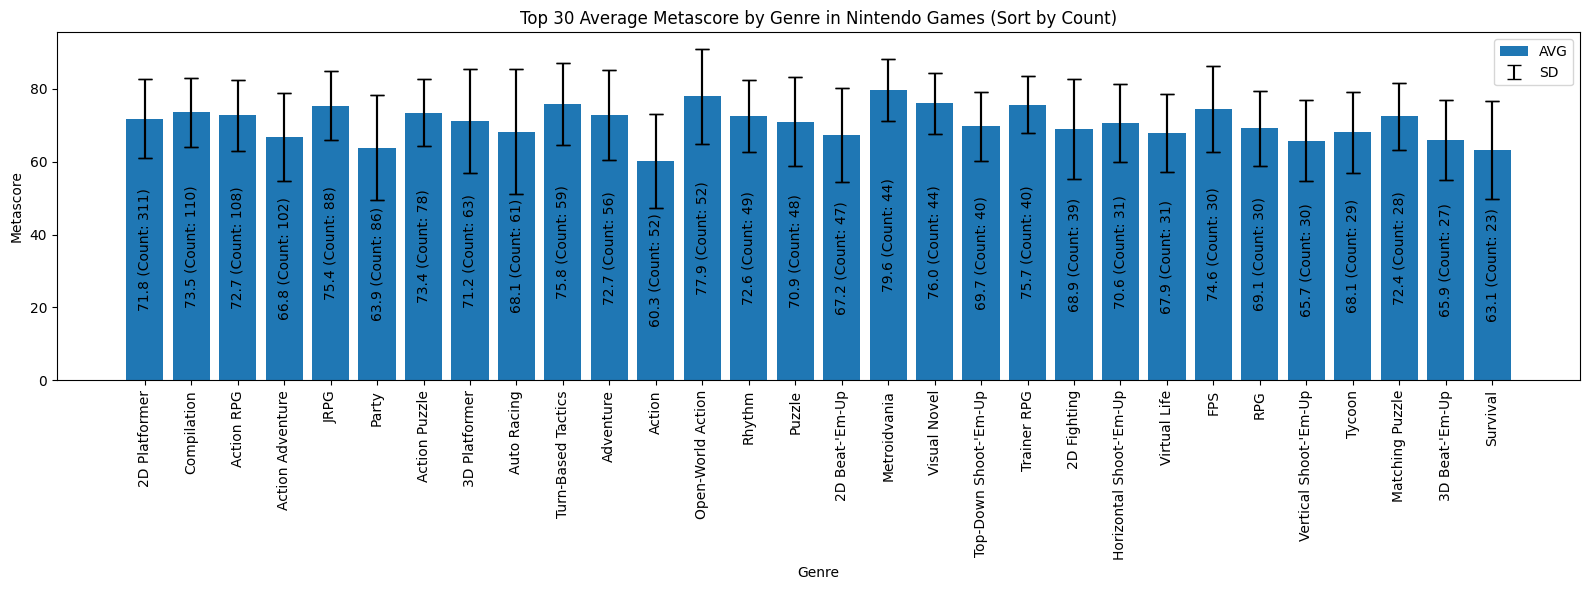

In [74]:
top_30_metascore_genre_avg_count(ntd_data,
                                 'Nintendo')

- When sorted by volume of releases, the data provides insight into Nintendo's production priorities and genre strength across their larger catalogs. 2D Platformer games represent Nintendo's most prolific genre with 311 titles achieving a strong average score of 71.8, which while respectable, ranks below several genres with fewer releases. This illustrates an interesting dynamic where Nintendo's most numerous genre doesn't necessarily represent its highest critical performers, possibly due to the sheer variety of quality within such a large sample.
- The most critically acclaimed high-volume genre appears to be Metroidvania, with 44 titles averaging 79.6, followed by Visual Novel at 76.0 with 44 titles as well. These statistics demonstrate Nintendo's ability to maintain exceptional quality even in categories with substantial catalogs. Interestingly, the 2D Metroidvania genre (79.6) outperforms 3D Platformer (71.2) by a significant margin, suggesting Nintendo games excel more in 2D design paradigms despite their innovations in 3D gaming.
- Action genres dominate Nintendo's catalog in terms of volume, with various action subcategories (Action RPG: 108 titles, Action Adventure: 102 titles, Turn-Based Tactics: 59 titles) all performing well critically. The considerable number of releases in these categories underscores Nintendo's strategic focus on action-oriented experiences. The data also reveals that Nintendo maintains relatively consistent quality across both large and niche genres, with even smaller categories like Rhythm (72.6, 49 titles) achieving impressive average scores.
- The relationship between release volume and critical reception appears complex, with no clear correlation between a genre's representation in Nintendo's catalog and its average Metascore. This suggests Nintendo approaches quality control similarly across both major and minor genre investments. Some smaller genres like Visual Novel (44 titles, 76.0) and Open-World Action (52 titles, 77.9) perform exceptionally well, indicating Nintendo's willingness to support and excel in categories that aren't necessarily their primary focus. The data demonstrates Nintendo's balanced approach to genre diversity while maintaining consistent quality thresholds.

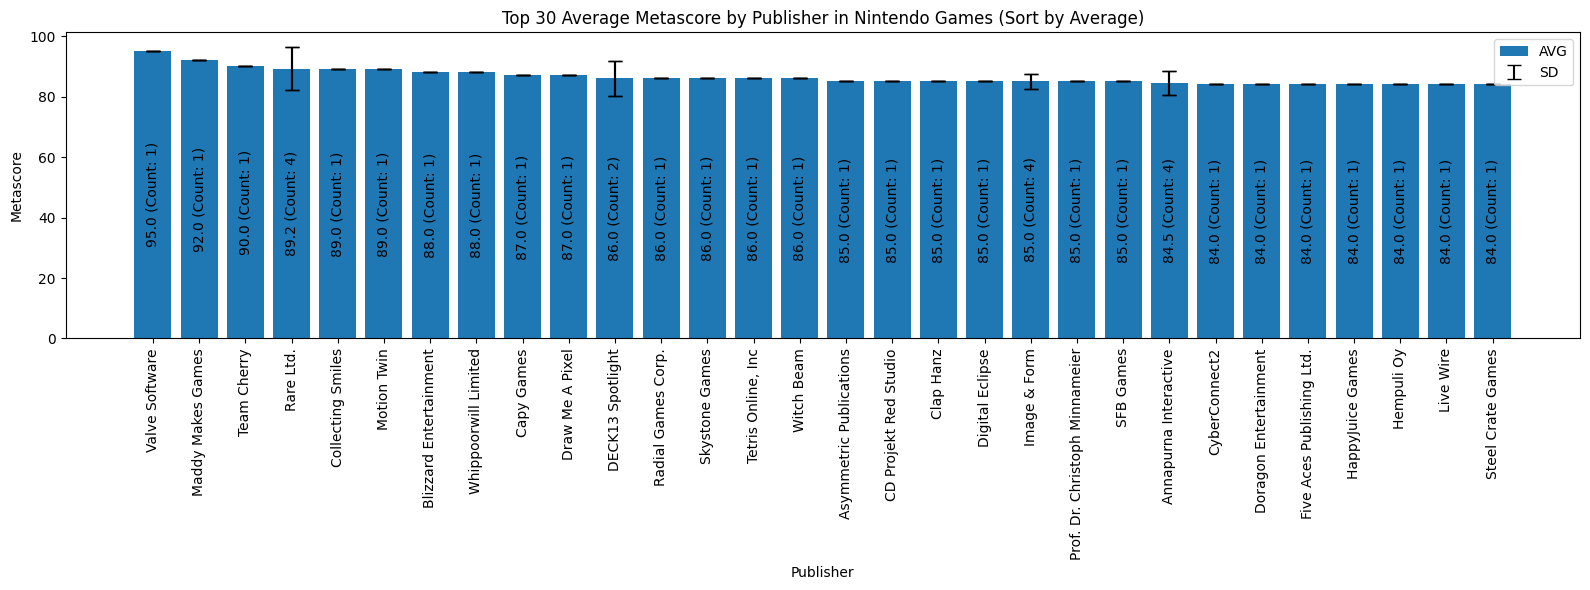

In [75]:
top_30_metascore_publiser_avg(ntd_data,
                              'Nintendo')

- The publisher performance data reveals Valve Software leading with an exceptional 95.0 average Metascore, although this represents just a single title. Maddy Makes Games follows with 92.0 (1 title), and Team Cherry with 90.0 (1 title). These results highlight the impact of select indie publishers bringing critically acclaimed titles to Nintendo platforms. The dominance of indie studios with limited catalogs at the top suggests that smaller, focused development efforts often yield the highest critical reception on Nintendo systems.
- The distribution of scores among the top 30 publishers demonstrates remarkable consistency, with scores ranging from 95.0 to 84.0, representing only an 11-point spread. This compressed range indicates that publishers who succeed on Nintendo platforms generally maintain high quality standards. Established larger publishers like Rare Ltd. (89.2 across 4 titles) and Collecting Smiles (89.0 across 1 title) demonstrate that both veteran companies and newer entrants can achieve exceptional critical reception on Nintendo systems.
- Nintendo's publisher ecosystem appears highly selective, with the majority of top publishers having very small catalogs (most with 1-4 titles) in this sorted data. This pattern suggests Nintendo platforms favor quality over quantity from their publishing partners. Even publishers with multiple releases like Rare Ltd. (4 titles) maintain remarkably high average scores, indicating consistent quality across their Nintendo releases. The standard deviation bars are generally small for most publishers, further emphasizing the consistency in quality among top Nintendo publishers.
- The presence of diverse publisher types—from major studios like Rare to indie developers like Team Cherry and specialized companies like Motion Twin—demonstrates Nintendo's platform welcomes various business models and development approaches. The relatively small number of titles per publisher in the top rankings suggests Nintendo systems may serve as a showcase for publishers' premium offerings rather than platforms for volume releases. This aligns with Nintendo's historical emphasis on curated experiences and selective partnerships over sheer content volume.

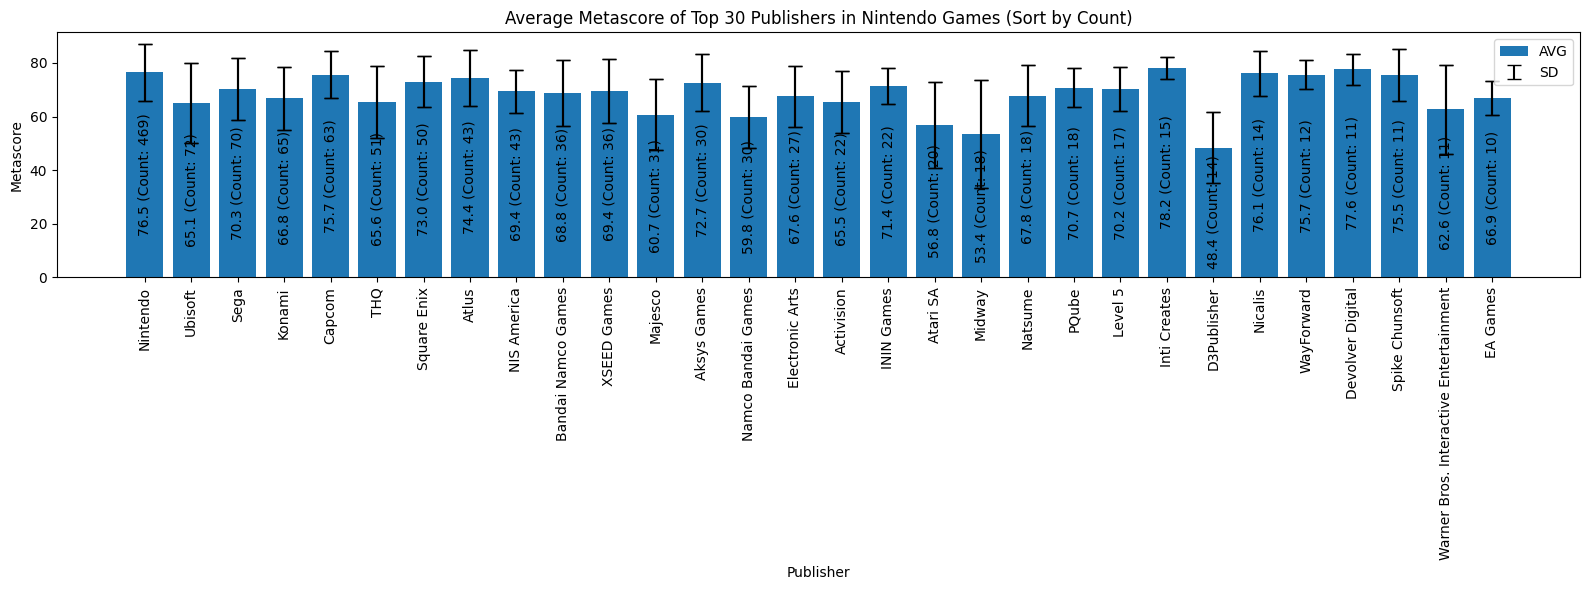

In [76]:
top_30_metascore_publiser_avg_count(ntd_data,
                                    'Nintendo')

- Sorting publishers by release volume provides a dramatically different perspective on the Nintendo ecosystem. Nintendo itself leads with the highest count (469 titles) while maintaining an excellent 76.5 average Metascore, demonstrating remarkable consistency across its extensive first-party catalog. This dual strength in both quality and quantity is exceptional in the industry and underscores Nintendo's unique position as both platform holder and premier content creator. Their ability to maintain such high quality across nearly 500 titles sets them apart from virtually all other publishers in the dataset.
- The data reveals significant disparity in output volume among major publishers. After Nintendo, Ubisoft ranks second with 72 titles but a lower 65.1 average score, followed by Sega (70.3 across 70 titles) and Capcom (75.7 across 63 titles). This 10-point difference between Nintendo and its closest volume competitors highlights the company's superior quality control despite its prolific output. The pattern suggests that while other major publishers release substantial catalogs on Nintendo platforms, they struggle to match Nintendo's consistent quality across large volumes.
- Mid-tier publishers demonstrate varying success in balancing quantity and quality. Capcom (75.7 across 63 titles) and Square Enix (73.0 across 50 titles) maintain respectable averages across substantial catalogs. However, some volume publishers like Atari SA (56.8 across 20 titles) and Midway (53.4 across 18 titles) show significantly lower average scores, suggesting their quantity-focused approach may come at a quality cost. The wide quality variation among volume publishers indicates different strategic approaches to the Nintendo ecosystem.
The presence of quality outliers among volume publishers is notable. D3Publisher appears with a low 48.4 average across 14 titles, representing the lowest average score among volume publishers. Conversely, WayForward (75.7 across 12 titles) and Nintendo's partners like Level-5 (70.2 across 17 titles) demonstrate that smaller catalogs can maintain excellent quality averages. These contrasts suggest that while the volume approach works for some publishers on Nintendo platforms, careful curation and strategic focus may yield better critical reception even with fewer releases.

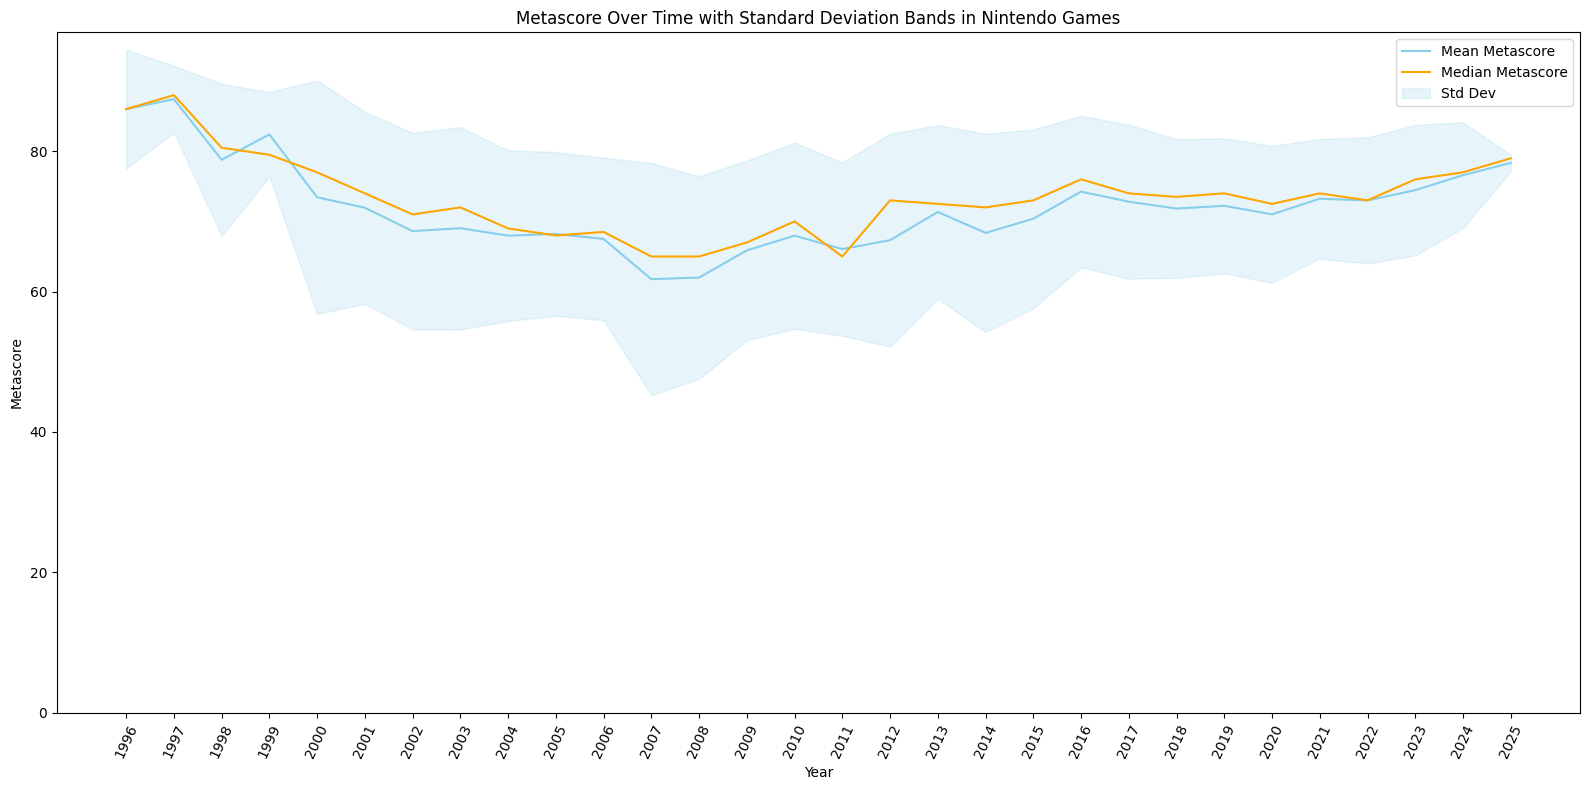

In [77]:
time_series_metascore_evolution(ntd_data,
                                'Nintendo',
                                close=False)

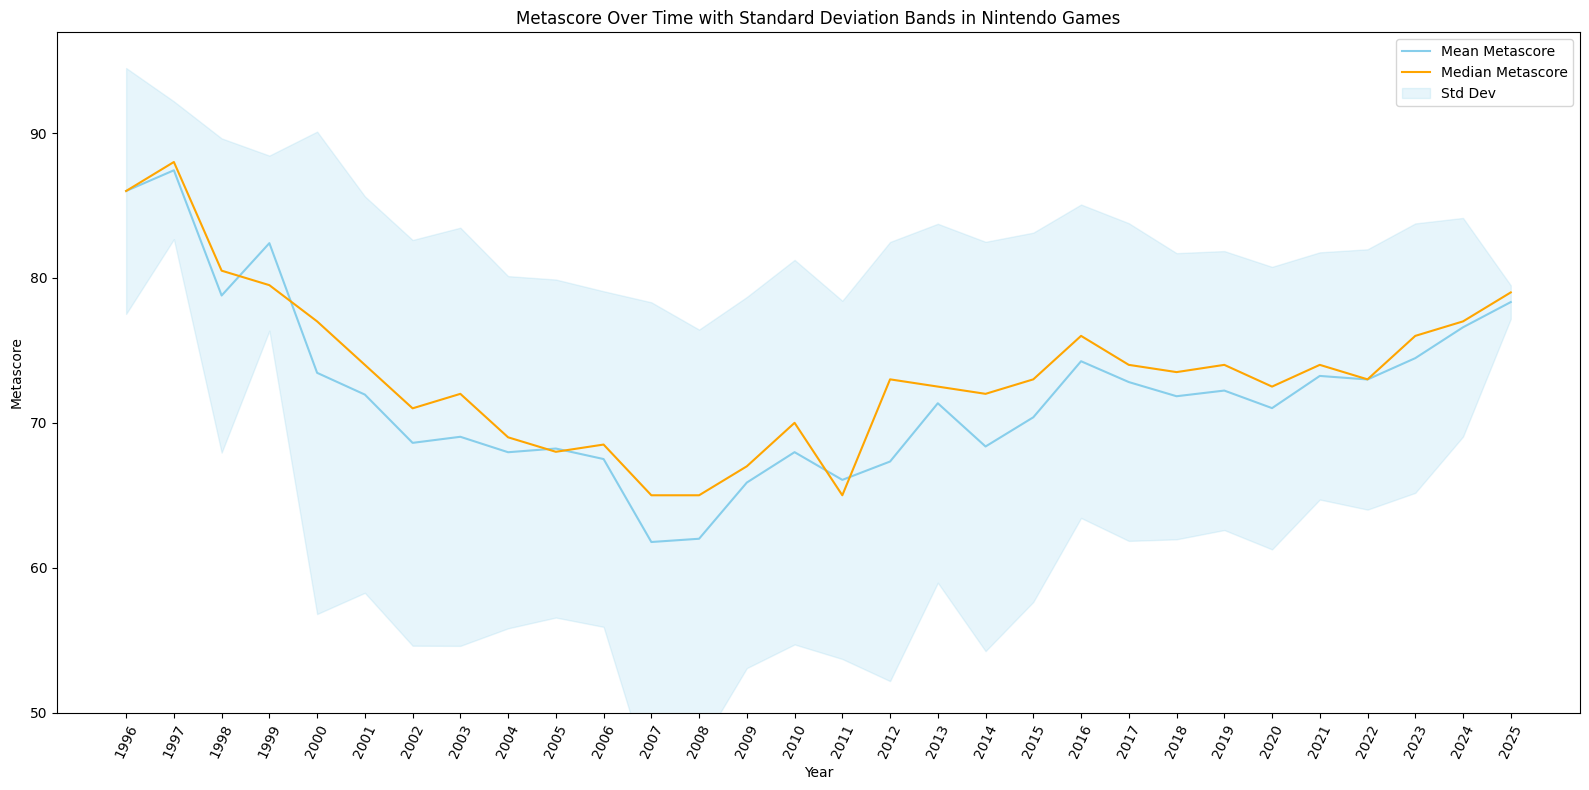

In [78]:
time_series_metascore_evolution(ntd_data,
                                'Nintendo',
                                close=True)

- From 1996 to 2000, Nintendo games enjoyed remarkably high critical reception, with mean and median Metascores consistently above 80 points. This period coincides with the Nintendo 64 era and early GameCube releases, suggesting that Nintendo's first-party offerings during this time (likely including titles like Super Mario 64, The Legend of Zelda: Ocarina of Time, and GoldenEye 007) were particularly well-received by critics. The substantial standard deviation during this period indicates considerable variation in quality across the software library, with some titles significantly outperforming or underperforming the average.
- A notable downward trend emerges from 2000 to 2007, where both mean and median Metascores gradually declined from approximately 80 to around 65 points. This period corresponds with the GameCube and early Wii eras, suggesting that critics may have been less impressed with Nintendo's software strategy during this transition. The narrowing standard deviation bands during this period indicate more consistency in game quality, albeit at a lower average level. The lowest point appears around 2006-2007, which interestingly coincides with Nintendo's shift toward broader market appeal with the Wii console.
- From 2010 onward, the data shows a gradual recovery and stabilization, with both mean and median scores climbing back to the 70-80 range. The years 2010-2015 show a significant upward trajectory, possibly reflecting the quality of late Wii, 3DS, and early Wii U titles. The most recent years (2021-2025) demonstrate Nintendo returning to historical strength with scores approaching 80, likely reflecting the critical success of Nintendo Switch software. Throughout this recovery period, the standard deviation bands remain fairly consistent, indicating that while Nintendo's average quality improved, they maintained a similar spread between their highest and lowest-rated offerings. This suggests a balanced portfolio strategy that includes both experimental titles and polished mainstream releases.

In [79]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER GLOBAL NINTENDO
results = tfidf_analysis_genre(ntd_data)
for genre, scores in results.items():
    print(f"Genre: {genre}")
    print(scores.head(10))
    print("-" * 30)

Genre: 3D Platformer
world        0.048528
new          0.039028
mario        0.037055
3d           0.031699
game         0.031219
players      0.030298
adventure    0.030235
sonic        0.028914
enemies      0.021769
levels       0.021672
dtype: float64
------------------------------
Genre: FPS
weapons    0.041240
turok      0.039593
wii        0.032219
game       0.030123
enemies    0.027860
action     0.027503
new        0.027251
world      0.026848
battle     0.026407
player     0.024932
dtype: float64
------------------------------
Genre: Open-World Action
world           0.051402
link            0.049830
game            0.041616
adventure       0.041482
new             0.041427
zelda           0.039432
action          0.033679
legend zelda    0.031090
legend          0.031090
time            0.029049
dtype: float64
------------------------------
Genre: Compilation
games         0.050151
game          0.041117
new           0.038841
arcade        0.033365
collection    0.031761
m

- The TF-IDF analysis for Nintendo game genres reveals a diverse linguistic landscape that encapsulates both nostalgic elements and modern gameplay innovations. In genres such as 3D Platformer, key terms like "world," "new," "mario," "3d," and "adventure" highlight expansive environments and iconic characters, reflecting the enduring appeal of classic franchises while embracing technological advancements. Meanwhile, in the FPS and Open-World Action genres, terms such as "weapons," "turok," "wii," "battle," and references to "zelda" and "link" underscore a focus on competitive combat and immersive, narrative-driven exploration. The Compilation and Visual Novel genres further emphasize the importance of storytelling and the celebration of retro gameplay, while 2D Platformers and 2D Fighting games draw attention to fast-paced, character-driven challenges with frequent nods to familiar names like "sonic" and "pac." These keyword patterns illustrate how each genre balances traditional elements with modern updates to create a multifaceted gaming experience.
- Further insights reveal that recurring terms like "new," "game," "world," and "players" serve as a constant reminder of Nintendo’s commitment to continuously refreshing its content and enhancing player engagement. In genres like Auto Racing, Action RPG, and JRPG, additional keywords such as "mario kart," "fable," and "monsters" deepen the narrative focus and strategic depth, while genres like Turn-Based Tactics and Arcade Racing emphasize competitive, tactical play through terms like "emblem," "battles," and "race." This continuous infusion of new content, combined with a strong foundation of iconic characters and settings, allows Nintendo to maintain a vibrant and evolving gaming ecosystem that appeals to both long-time fans and new players alike.
- Overall, the TF-IDF analysis underscores the multifaceted nature of Nintendo’s game genres, revealing a harmonious integration of legacy elements and contemporary innovations. From the nostalgic references found in retro-style platformers and compilations to the cutting-edge elements in FPS, open-world, and narrative-driven genres, Nintendo consistently leverages its storied history while adapting to modern trends. The interplay of keywords across genres not only highlights the platform's rich heritage but also its forward-thinking approach to game design—ensuring that every title, whether steeped in tradition or embracing the future, contributes to a dynamic and engaging interactive experience for a diverse audience.

In [80]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY TIME GLOBAL NINTENDO
results = tfidf_analysis_time(ntd_data)
for year, scores in results.items():
    print(f"Year: {year}")
    print(scores.head(10))
    print("-" * 30)

Year: 2017.0
new          0.049198
game         0.044852
play         0.032652
nintendo     0.032527
world        0.028953
players      0.027533
battle       0.026509
action       0.025482
adventure    0.024926
time         0.023776
dtype: float64
------------------------------
Year: 1997.0
race            0.047774
fox             0.045848
weapons         0.040057
adventure       0.037124
12              0.032219
fox mccloud     0.030565
mccloud         0.030565
tiger           0.027717
timber tiger    0.027717
timber          0.027717
dtype: float64
------------------------------
Year: 2000.0
action      0.041043
race        0.032897
new         0.025981
game        0.025731
european    0.024718
turok       0.024310
air         0.023536
pikachu     0.023483
friends     0.022739
world       0.022714
dtype: float64
------------------------------
Year: 2010.0
game         0.047285
players      0.039048
wii          0.038530
new          0.032832
world        0.031580
adventure    0.03075

- The TF-IDF analysis for Nintendo games across various years illustrates a dynamic evolution in thematic focus and gameplay elements that mirror shifts in technology and franchise priorities. In the early years, such as 1996 and 1997, the dominant keywords—like "race," "flight," "pilotwings," "fox," and "weapons"—reflect a period when racing and flight simulation were at the forefront, driven by the capabilities of early Nintendo consoles. Specific references such as "fox mccloud" and "tiger" hint at iconic characters and competitive action-adventure elements. As the timeline moves into 2000, keywords such as "action," "race," "turok," and "pikachu" emerge, suggesting a blend of fast-paced combat and playful, cross-franchise elements that began to define Nintendo’s unique approach to game design.
- From the mid-2000s onward, the focus shifts notably with the rise of platforms like the Wii and the Nintendo 3DS. Data from 2007 and 2008 show a strong emphasis on leveraging motion controls and local multiplayer features, with terms like "wii," "wiiware," "remote," and "mode" indicating the integration of innovative control schemes and social play. Meanwhile, recurring keywords such as "new," "game," "world," and "players" across 2010, 2012, and 2014 emphasize Nintendo’s ongoing commitment to refreshing its content and delivering expansive, immersive experiences. These years reveal an increasing focus on narrative depth and character-driven gameplay, as seen in the prominence of "adventure," "characters," and "story" in later datasets.
- In more recent years, particularly from 2018 to 2025, the analysis highlights a clear pivot toward richer, more immersive narratives and interactive environments. For example, 2019 and 2020 data underscore the growing importance of terms like "adventure," "explore," and "story," indicating a shift towards deeper, story-rich experiences. The introduction of playful, franchise-specific references such as "mario," "puzzles," "kong," "diddy," and "donkey" in the most current years illustrates Nintendo’s ability to blend nostalgic elements with modern innovation. Overall, the TF-IDF analysis demonstrates that while core themes like "new," "game," and "world" remain constant, Nintendo continuously adapts its game portfolio—merging classic elements with advanced narrative and technological features—to create a dynamic, engaging interactive experience for its diverse audience.

In [81]:
## TEXT ANALYSIS USING TF-IDF VECTORIZER BY PUBLISHER GLOBAL NINTENDO
results = tfidf_analysis_publisher(ntd_data)
# WARNING: There are approximately 469 unique publishers. Printing all results will generate a large output.
# If you want to print the results, uncomment the following code.
'''
for publisher, scores in results.items():
    print(f"Publisher: {publisher}")
    print(scores.head(10))
    print("-" * 30)
'''

'\nfor publisher, scores in results.items():\n    print(f"Publisher: {publisher}")\n    print(scores.head(10))\n    print("-" * 30)\n'

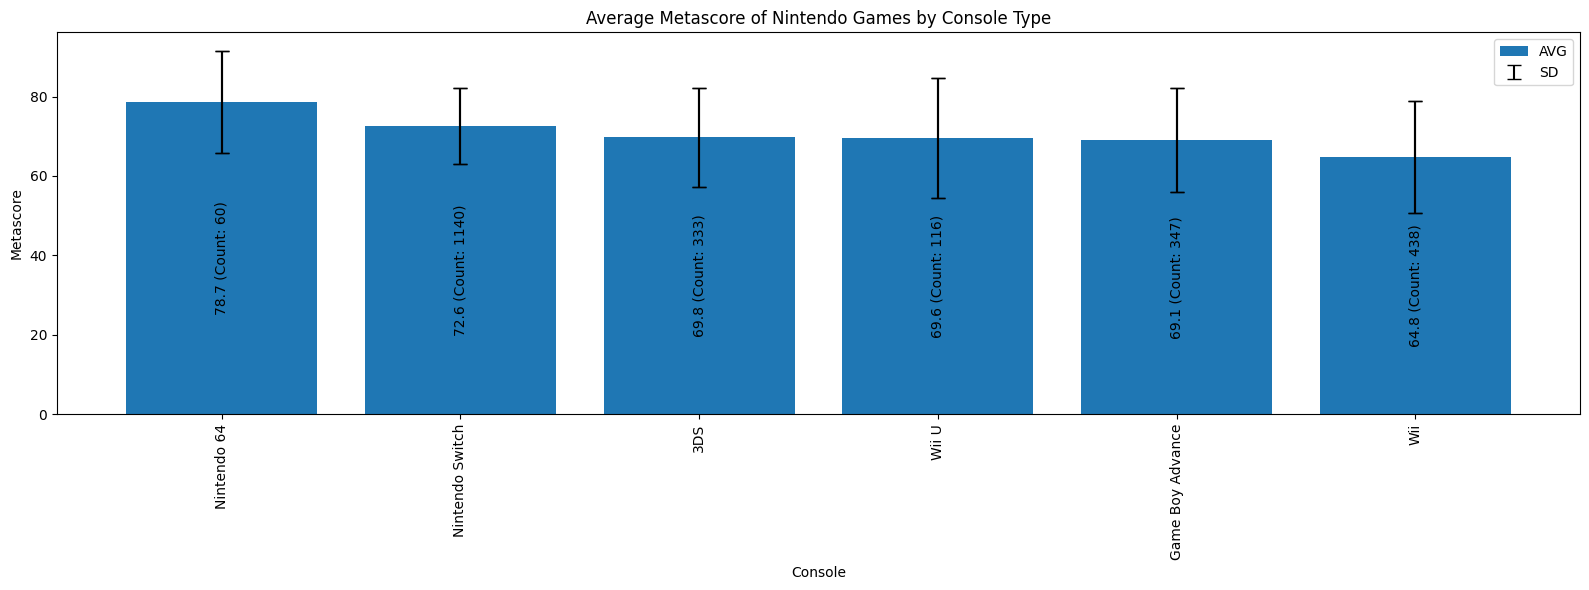

In [82]:
metascore_in_distribution(ntd_data,
                          'Nintendo')

- The console comparison data reveals a clear quality progression across Nintendo's hardware generations, with Nintendo 64 achieving the highest average Metascore of 78.7 across 60 titles. This exceptional performance likely reflects the N64's relatively limited but highly curated library featuring landmark titles like Super Mario 64, The Legend of Zelda: Ocarina of Time, and GoldenEye 007. The Nintendo Switch follows as the second-highest performer with 72.6 across 1,140 titles, an impressive achievement considering its vastly larger catalog compared to the N64.
- The data demonstrates a generally declining average Metascore trend as console libraries expand. The Nintendo 3DS (69.8, 333 titles), Wii U (69.6, 116 titles), and Game Boy Advance (69.1, 347 titles) all cluster around similar average scores despite their varying library sizes. This consistency suggests Nintendo establishes similar quality thresholds across their handheld and home console ecosystems. However, the Wii stands as an outlier with the lowest average of 64.8 across 338 titles, potentially reflecting its broader market appeal and more casual-oriented library.
- Standard deviation indicators reveal interesting quality distribution patterns across platforms. The Nintendo 64 shows the widest quality variance despite its high average, suggesting a library containing both exceptional titles and less successful experiments. Conversely, the Wii has a narrower standard deviation despite its lower average, indicating more consistent (if lower) quality across its larger library. This pattern aligns with the Wii's market position targeting a broader, less traditional gaming audience with more accessible titles.
- The relationship between library size and average quality presents compelling insights into Nintendo's platform strategies. The N64's limited but excellent library (60 titles, 78.7 average) contrasts sharply with the Switch's massive but still strong catalog (1,140 titles, 72.6 average). This suggests Nintendo has evolved from a highly curated approach with fewer releases to a more open platform while still maintaining relatively strong quality standards. The data also reveals that Nintendo's handheld consoles (3DS, GBA) maintain similar quality levels despite their different market positions and technical capabilities, demonstrating Nintendo's consistent approach to portable gaming experiences.

```
  _  __    _    ____  ____ _     _____ 
 | |/ /   / \  / ___|/ ___| |   | ____|
 | ' /   / _ \| |  _| |  _| |   |  _|  
 | . \  / ___ \ |_| | |_| | |___| |___ 
 |_|\_\/_/   \_\____|\____|_____|_____|
                                       
```